In [114]:
!pip install xgboost 

In [135]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, header=0, delimiter=';') #'winequality-red.csv')

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
RANDOM_STATE = 42
X = data.drop(columns=[data.columns[11]])
y = data[data.columns[11]]
y = y.astype('int')

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [30]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE).fit(X, y)
result = cross_val_score(dt, X, y, cv=5)
bt = BaggingClassifier(random_state=RANDOM_STATE, n_estimators = 100).fit(X, y)
result_1 = cross_val_score(bt, X, y, cv=5)
rf = RandomForestClassifier(random_state=RANDOM_STATE).fit(X, y)
result_2 = cross_val_score(rf, X, y, cv=5)

print(f' dt:{result.max()}, bt:{result_1.max()}, rf:{result_2.max()}')
print(f'{bt.get_params()["n_estimators"]}\n{bt.get_params()["n_estimators"]}\n{rf.get_params()["n_estimators"]}')

 dt:0.496875, bt:0.60625, rf:0.603125
100
100
100


2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [50]:
n_est = [10, 50, 100, 200]
results = dict()
for i in range(400, 5001, 200):
    n_est.append(i)
for n in n_est:
    #print(n)
    rf = RandomForestClassifier(n_estimators=n,random_state=RANDOM_STATE).fit(X_train, y_train)
    rf = rf.score(X_test, y_test)
    results[n] = rf

In [74]:
#df = pd.DataFrame.from_dict([results])

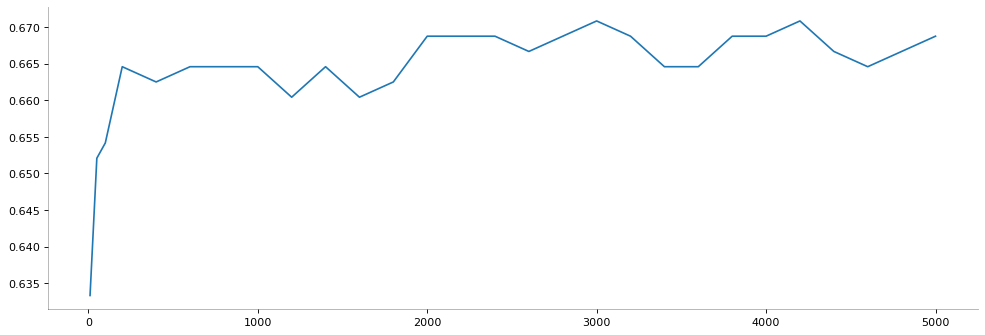

In [85]:
plt.figure(figsize=(15,5), dpi= 80)
plt.plot(results.keys(), results.values())
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)

xg = XGBClassifier()
xg_res = cross_val_score(xg, X, y_le, scoring='accuracy', cv=5).max()
print(f'xg: {xg_res.max()}')

gb = GradientBoostingClassifier()
gb_res = cross_val_score(gb, X, y_le, scoring='accuracy', cv=5).max()
print(f'gb: {gb_res.max()}')

xg: 0.5875
gb: 0.58125


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

params = {'n_estimators' : [50, 100, 200, 500],'learning_rate' : [0.0001, 0.001, 0.01], 'max_depth' : [3,5,7,9]}
xg = GridSearchCV(XGBClassifier(), param_grid=params, cv=3).fit(X_train, y_train_le)

In [151]:
print(xg.best_params_)
y_pred = xg.best_estimator_.predict(X_test)
acc = accuracy_score(y_test_le, y_pred)
print(acc)

{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}
0.6479166666666667


In [152]:
params = {'n_estimators' : [50, 100, 200, 500],'learning_rate' : [0.0001, 0.001, 0.01], 'max_depth' : [3,5,7,9]}
gb = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=3).fit(X_train, y_train)

In [153]:
print(gb.best_params_)
y_pred = gb.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.64375


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [156]:
!pip install lightgbm catboost

In [159]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

lg = LGBMClassifier()
lg_res = cross_val_score(lg, X, y, scoring='accuracy', cv=5).max()
print(f'xg: {lg_res.max()}')

cb = CatBoostClassifier()
cb_res = cross_val_score(cb, X, y, scoring='accuracy', cv=5).max()
print(f'gb: {cb_res.max()}')

xg: 0.5956112852664577
Learning rate set to 0.080126
0:	learn: 1.6829142	total: 174ms	remaining: 2m 54s
1:	learn: 1.5940547	total: 198ms	remaining: 1m 38s
2:	learn: 1.5175367	total: 216ms	remaining: 1m 11s
3:	learn: 1.4573818	total: 228ms	remaining: 56.8s
4:	learn: 1.3986323	total: 237ms	remaining: 47.2s
5:	learn: 1.3493535	total: 245ms	remaining: 40.6s
6:	learn: 1.3018142	total: 252ms	remaining: 35.7s
7:	learn: 1.2635278	total: 257ms	remaining: 31.9s
8:	learn: 1.2288350	total: 264ms	remaining: 29s
9:	learn: 1.1965165	total: 270ms	remaining: 26.7s
10:	learn: 1.1667856	total: 277ms	remaining: 24.9s
11:	learn: 1.1415420	total: 283ms	remaining: 23.3s
12:	learn: 1.1189592	total: 289ms	remaining: 22s
13:	learn: 1.0971406	total: 296ms	remaining: 20.8s
14:	learn: 1.0774057	total: 302ms	remaining: 19.8s
15:	learn: 1.0589907	total: 308ms	remaining: 19s
16:	learn: 1.0444871	total: 315ms	remaining: 18.2s
17:	learn: 1.0287948	total: 321ms	remaining: 17.5s
18:	learn: 1.0152259	total: 327ms	remainin

166:	learn: 0.5315283	total: 1.33s	remaining: 6.63s
167:	learn: 0.5309038	total: 1.34s	remaining: 6.62s
168:	learn: 0.5284460	total: 1.34s	remaining: 6.61s
169:	learn: 0.5270007	total: 1.35s	remaining: 6.6s
170:	learn: 0.5250455	total: 1.36s	remaining: 6.59s
171:	learn: 0.5231372	total: 1.36s	remaining: 6.57s
172:	learn: 0.5219469	total: 1.37s	remaining: 6.56s
173:	learn: 0.5204266	total: 1.38s	remaining: 6.55s
174:	learn: 0.5189848	total: 1.39s	remaining: 6.53s
175:	learn: 0.5173362	total: 1.39s	remaining: 6.52s
176:	learn: 0.5163165	total: 1.4s	remaining: 6.5s
177:	learn: 0.5144963	total: 1.41s	remaining: 6.49s
178:	learn: 0.5131795	total: 1.41s	remaining: 6.47s
179:	learn: 0.5115063	total: 1.42s	remaining: 6.46s
180:	learn: 0.5097465	total: 1.42s	remaining: 6.45s
181:	learn: 0.5074270	total: 1.43s	remaining: 6.43s
182:	learn: 0.5056929	total: 1.44s	remaining: 6.42s
183:	learn: 0.5045378	total: 1.44s	remaining: 6.41s
184:	learn: 0.5029112	total: 1.45s	remaining: 6.39s
185:	learn: 0.5

339:	learn: 0.3323842	total: 2.47s	remaining: 4.8s
340:	learn: 0.3314884	total: 2.48s	remaining: 4.79s
341:	learn: 0.3306859	total: 2.49s	remaining: 4.79s
342:	learn: 0.3302645	total: 2.5s	remaining: 4.78s
343:	learn: 0.3297095	total: 2.5s	remaining: 4.77s
344:	learn: 0.3291937	total: 2.51s	remaining: 4.76s
345:	learn: 0.3280922	total: 2.52s	remaining: 4.75s
346:	learn: 0.3276670	total: 2.52s	remaining: 4.75s
347:	learn: 0.3272057	total: 2.53s	remaining: 4.74s
348:	learn: 0.3264645	total: 2.54s	remaining: 4.73s
349:	learn: 0.3256591	total: 2.54s	remaining: 4.72s
350:	learn: 0.3248951	total: 2.55s	remaining: 4.71s
351:	learn: 0.3242439	total: 2.55s	remaining: 4.7s
352:	learn: 0.3238282	total: 2.56s	remaining: 4.69s
353:	learn: 0.3226601	total: 2.57s	remaining: 4.68s
354:	learn: 0.3221505	total: 2.57s	remaining: 4.67s
355:	learn: 0.3216054	total: 2.58s	remaining: 4.67s
356:	learn: 0.3210868	total: 2.59s	remaining: 4.66s
357:	learn: 0.3200036	total: 2.59s	remaining: 4.65s
358:	learn: 0.31

511:	learn: 0.2293318	total: 3.6s	remaining: 3.44s
512:	learn: 0.2288845	total: 3.61s	remaining: 3.43s
513:	learn: 0.2283263	total: 3.62s	remaining: 3.42s
514:	learn: 0.2279643	total: 3.63s	remaining: 3.42s
515:	learn: 0.2272005	total: 3.63s	remaining: 3.41s
516:	learn: 0.2268566	total: 3.64s	remaining: 3.4s
517:	learn: 0.2265057	total: 3.65s	remaining: 3.4s
518:	learn: 0.2260005	total: 3.65s	remaining: 3.39s
519:	learn: 0.2254782	total: 3.66s	remaining: 3.38s
520:	learn: 0.2248631	total: 3.67s	remaining: 3.37s
521:	learn: 0.2243349	total: 3.67s	remaining: 3.37s
522:	learn: 0.2236116	total: 3.68s	remaining: 3.36s
523:	learn: 0.2233167	total: 3.69s	remaining: 3.35s
524:	learn: 0.2227254	total: 3.69s	remaining: 3.34s
525:	learn: 0.2221492	total: 3.7s	remaining: 3.33s
526:	learn: 0.2217103	total: 3.71s	remaining: 3.33s
527:	learn: 0.2212635	total: 3.71s	remaining: 3.32s
528:	learn: 0.2210729	total: 3.72s	remaining: 3.31s
529:	learn: 0.2207763	total: 3.73s	remaining: 3.3s
530:	learn: 0.220

681:	learn: 0.1638337	total: 4.74s	remaining: 2.21s
682:	learn: 0.1635742	total: 4.75s	remaining: 2.2s
683:	learn: 0.1631675	total: 4.75s	remaining: 2.2s
684:	learn: 0.1627173	total: 4.76s	remaining: 2.19s
685:	learn: 0.1623836	total: 4.77s	remaining: 2.18s
686:	learn: 0.1621042	total: 4.77s	remaining: 2.17s
687:	learn: 0.1618856	total: 4.78s	remaining: 2.17s
688:	learn: 0.1616498	total: 4.79s	remaining: 2.16s
689:	learn: 0.1613022	total: 4.79s	remaining: 2.15s
690:	learn: 0.1611822	total: 4.8s	remaining: 2.15s
691:	learn: 0.1608399	total: 4.8s	remaining: 2.14s
692:	learn: 0.1605741	total: 4.81s	remaining: 2.13s
693:	learn: 0.1603546	total: 4.82s	remaining: 2.12s
694:	learn: 0.1600637	total: 4.82s	remaining: 2.12s
695:	learn: 0.1598550	total: 4.83s	remaining: 2.11s
696:	learn: 0.1596532	total: 4.84s	remaining: 2.1s
697:	learn: 0.1595295	total: 4.84s	remaining: 2.1s
698:	learn: 0.1593516	total: 4.85s	remaining: 2.09s
699:	learn: 0.1589414	total: 4.85s	remaining: 2.08s
700:	learn: 0.1586

848:	learn: 0.1252372	total: 5.85s	remaining: 1.04s
849:	learn: 0.1249651	total: 5.86s	remaining: 1.03s
850:	learn: 0.1247999	total: 5.87s	remaining: 1.03s
851:	learn: 0.1245327	total: 5.88s	remaining: 1.02s
852:	learn: 0.1244360	total: 5.88s	remaining: 1.01s
853:	learn: 0.1242543	total: 5.89s	remaining: 1.01s
854:	learn: 0.1241408	total: 5.9s	remaining: 1000ms
855:	learn: 0.1239785	total: 5.9s	remaining: 993ms
856:	learn: 0.1236832	total: 5.91s	remaining: 986ms
857:	learn: 0.1234699	total: 5.92s	remaining: 979ms
858:	learn: 0.1232551	total: 5.92s	remaining: 972ms
859:	learn: 0.1229762	total: 5.93s	remaining: 965ms
860:	learn: 0.1227109	total: 5.93s	remaining: 958ms
861:	learn: 0.1226465	total: 5.94s	remaining: 951ms
862:	learn: 0.1226006	total: 5.95s	remaining: 944ms
863:	learn: 0.1223791	total: 5.95s	remaining: 937ms
864:	learn: 0.1222921	total: 5.96s	remaining: 930ms
865:	learn: 0.1220869	total: 5.97s	remaining: 924ms
866:	learn: 0.1219173	total: 5.97s	remaining: 917ms
867:	learn: 0

11:	learn: 1.1519585	total: 83.6ms	remaining: 6.88s
12:	learn: 1.1294027	total: 91.6ms	remaining: 6.95s
13:	learn: 1.1075097	total: 101ms	remaining: 7.08s
14:	learn: 1.0858891	total: 107ms	remaining: 7.05s
15:	learn: 1.0700503	total: 114ms	remaining: 7s
16:	learn: 1.0544703	total: 120ms	remaining: 6.96s
17:	learn: 1.0377472	total: 128ms	remaining: 6.96s
18:	learn: 1.0225451	total: 134ms	remaining: 6.91s
19:	learn: 1.0078182	total: 141ms	remaining: 6.9s
20:	learn: 0.9965059	total: 147ms	remaining: 6.87s
21:	learn: 0.9843890	total: 154ms	remaining: 6.85s
22:	learn: 0.9743925	total: 161ms	remaining: 6.84s
23:	learn: 0.9647185	total: 168ms	remaining: 6.81s
24:	learn: 0.9548957	total: 174ms	remaining: 6.77s
25:	learn: 0.9462032	total: 181ms	remaining: 6.76s
26:	learn: 0.9376687	total: 187ms	remaining: 6.75s
27:	learn: 0.9296853	total: 194ms	remaining: 6.74s
28:	learn: 0.9209638	total: 201ms	remaining: 6.73s
29:	learn: 0.9129251	total: 208ms	remaining: 6.72s
30:	learn: 0.9056664	total: 214ms

195:	learn: 0.5103172	total: 1.58s	remaining: 6.48s
196:	learn: 0.5092092	total: 1.59s	remaining: 6.47s
197:	learn: 0.5070948	total: 1.59s	remaining: 6.45s
198:	learn: 0.5054807	total: 1.6s	remaining: 6.45s
199:	learn: 0.5040213	total: 1.61s	remaining: 6.43s
200:	learn: 0.5027983	total: 1.61s	remaining: 6.41s
201:	learn: 0.5013220	total: 1.62s	remaining: 6.4s
202:	learn: 0.5001252	total: 1.63s	remaining: 6.39s
203:	learn: 0.4986913	total: 1.63s	remaining: 6.38s
204:	learn: 0.4970131	total: 1.64s	remaining: 6.37s
205:	learn: 0.4952727	total: 1.65s	remaining: 6.36s
206:	learn: 0.4938355	total: 1.66s	remaining: 6.34s
207:	learn: 0.4921756	total: 1.66s	remaining: 6.33s
208:	learn: 0.4907046	total: 1.67s	remaining: 6.32s
209:	learn: 0.4896275	total: 1.68s	remaining: 6.3s
210:	learn: 0.4886053	total: 1.68s	remaining: 6.29s
211:	learn: 0.4880005	total: 1.69s	remaining: 6.27s
212:	learn: 0.4869219	total: 1.69s	remaining: 6.26s
213:	learn: 0.4862498	total: 1.7s	remaining: 6.25s
214:	learn: 0.48

358:	learn: 0.3286336	total: 2.69s	remaining: 4.81s
359:	learn: 0.3277383	total: 2.7s	remaining: 4.8s
360:	learn: 0.3270869	total: 2.71s	remaining: 4.8s
361:	learn: 0.3265736	total: 2.72s	remaining: 4.79s
362:	learn: 0.3261228	total: 2.73s	remaining: 4.78s
363:	learn: 0.3255540	total: 2.73s	remaining: 4.77s
364:	learn: 0.3249971	total: 2.74s	remaining: 4.76s
365:	learn: 0.3243581	total: 2.75s	remaining: 4.76s
366:	learn: 0.3238362	total: 2.75s	remaining: 4.75s
367:	learn: 0.3229424	total: 2.76s	remaining: 4.74s
368:	learn: 0.3224831	total: 2.77s	remaining: 4.73s
369:	learn: 0.3220838	total: 2.77s	remaining: 4.72s
370:	learn: 0.3214172	total: 2.78s	remaining: 4.71s
371:	learn: 0.3208930	total: 2.79s	remaining: 4.71s
372:	learn: 0.3198594	total: 2.79s	remaining: 4.7s
373:	learn: 0.3194176	total: 2.8s	remaining: 4.69s
374:	learn: 0.3178892	total: 2.81s	remaining: 4.68s
375:	learn: 0.3172718	total: 2.81s	remaining: 4.67s
376:	learn: 0.3167470	total: 2.82s	remaining: 4.66s
377:	learn: 0.315

530:	learn: 0.2237248	total: 3.99s	remaining: 3.52s
531:	learn: 0.2233128	total: 4s	remaining: 3.52s
532:	learn: 0.2228956	total: 4s	remaining: 3.51s
533:	learn: 0.2223221	total: 4.01s	remaining: 3.5s
534:	learn: 0.2218276	total: 4.02s	remaining: 3.49s
535:	learn: 0.2213394	total: 4.03s	remaining: 3.48s
536:	learn: 0.2208503	total: 4.03s	remaining: 3.48s
537:	learn: 0.2205819	total: 4.04s	remaining: 3.47s
538:	learn: 0.2201948	total: 4.05s	remaining: 3.46s
539:	learn: 0.2196190	total: 4.05s	remaining: 3.45s
540:	learn: 0.2194058	total: 4.06s	remaining: 3.44s
541:	learn: 0.2188541	total: 4.07s	remaining: 3.44s
542:	learn: 0.2183868	total: 4.08s	remaining: 3.43s
543:	learn: 0.2177752	total: 4.08s	remaining: 3.42s
544:	learn: 0.2173769	total: 4.09s	remaining: 3.41s
545:	learn: 0.2168261	total: 4.1s	remaining: 3.41s
546:	learn: 0.2163279	total: 4.1s	remaining: 3.4s
547:	learn: 0.2159570	total: 4.11s	remaining: 3.39s
548:	learn: 0.2156806	total: 4.12s	remaining: 3.38s
549:	learn: 0.2153724	

691:	learn: 0.1670397	total: 5.1s	remaining: 2.27s
692:	learn: 0.1667899	total: 5.1s	remaining: 2.26s
693:	learn: 0.1666048	total: 5.11s	remaining: 2.25s
694:	learn: 0.1663255	total: 5.12s	remaining: 2.25s
695:	learn: 0.1661594	total: 5.12s	remaining: 2.24s
696:	learn: 0.1657807	total: 5.13s	remaining: 2.23s
697:	learn: 0.1653123	total: 5.14s	remaining: 2.22s
698:	learn: 0.1650936	total: 5.14s	remaining: 2.21s
699:	learn: 0.1649033	total: 5.15s	remaining: 2.21s
700:	learn: 0.1646162	total: 5.16s	remaining: 2.2s
701:	learn: 0.1644578	total: 5.17s	remaining: 2.19s
702:	learn: 0.1642065	total: 5.17s	remaining: 2.18s
703:	learn: 0.1639282	total: 5.18s	remaining: 2.18s
704:	learn: 0.1636198	total: 5.19s	remaining: 2.17s
705:	learn: 0.1633852	total: 5.19s	remaining: 2.16s
706:	learn: 0.1629611	total: 5.2s	remaining: 2.15s
707:	learn: 0.1628098	total: 5.21s	remaining: 2.15s
708:	learn: 0.1626598	total: 5.21s	remaining: 2.14s
709:	learn: 0.1623938	total: 5.22s	remaining: 2.13s
710:	learn: 0.16

864:	learn: 0.1258912	total: 6.37s	remaining: 995ms
865:	learn: 0.1257261	total: 6.38s	remaining: 987ms
866:	learn: 0.1254739	total: 6.39s	remaining: 980ms
867:	learn: 0.1252815	total: 6.4s	remaining: 973ms
868:	learn: 0.1250005	total: 6.41s	remaining: 966ms
869:	learn: 0.1248487	total: 6.42s	remaining: 959ms
870:	learn: 0.1247146	total: 6.42s	remaining: 951ms
871:	learn: 0.1246235	total: 6.43s	remaining: 944ms
872:	learn: 0.1244535	total: 6.44s	remaining: 937ms
873:	learn: 0.1241815	total: 6.45s	remaining: 929ms
874:	learn: 0.1240661	total: 6.45s	remaining: 922ms
875:	learn: 0.1239151	total: 6.46s	remaining: 915ms
876:	learn: 0.1237052	total: 6.47s	remaining: 907ms
877:	learn: 0.1236060	total: 6.48s	remaining: 900ms
878:	learn: 0.1233486	total: 6.48s	remaining: 892ms
879:	learn: 0.1230123	total: 6.49s	remaining: 885ms
880:	learn: 0.1228617	total: 6.5s	remaining: 878ms
881:	learn: 0.1225303	total: 6.51s	remaining: 871ms
882:	learn: 0.1223037	total: 6.51s	remaining: 863ms
883:	learn: 0.

23:	learn: 0.9773164	total: 185ms	remaining: 7.52s
24:	learn: 0.9681532	total: 192ms	remaining: 7.5s
25:	learn: 0.9581810	total: 201ms	remaining: 7.52s
26:	learn: 0.9486378	total: 208ms	remaining: 7.49s
27:	learn: 0.9392594	total: 217ms	remaining: 7.52s
28:	learn: 0.9320832	total: 223ms	remaining: 7.46s
29:	learn: 0.9253473	total: 232ms	remaining: 7.5s
30:	learn: 0.9189705	total: 238ms	remaining: 7.45s
31:	learn: 0.9112920	total: 247ms	remaining: 7.46s
32:	learn: 0.9045347	total: 253ms	remaining: 7.4s
33:	learn: 0.8971980	total: 262ms	remaining: 7.43s
34:	learn: 0.8907502	total: 268ms	remaining: 7.38s
35:	learn: 0.8861688	total: 275ms	remaining: 7.36s
36:	learn: 0.8799876	total: 282ms	remaining: 7.34s
37:	learn: 0.8753575	total: 289ms	remaining: 7.32s
38:	learn: 0.8716160	total: 297ms	remaining: 7.31s
39:	learn: 0.8669613	total: 303ms	remaining: 7.28s
40:	learn: 0.8626042	total: 311ms	remaining: 7.29s
41:	learn: 0.8578934	total: 318ms	remaining: 7.24s
42:	learn: 0.8539124	total: 326ms	

190:	learn: 0.5272674	total: 1.49s	remaining: 6.33s
191:	learn: 0.5252965	total: 1.5s	remaining: 6.33s
192:	learn: 0.5241122	total: 1.51s	remaining: 6.32s
193:	learn: 0.5225003	total: 1.52s	remaining: 6.32s
194:	learn: 0.5203216	total: 1.53s	remaining: 6.31s
195:	learn: 0.5185018	total: 1.54s	remaining: 6.31s
196:	learn: 0.5181601	total: 1.54s	remaining: 6.29s
197:	learn: 0.5172341	total: 1.55s	remaining: 6.29s
198:	learn: 0.5151797	total: 1.56s	remaining: 6.28s
199:	learn: 0.5130580	total: 1.57s	remaining: 6.28s
200:	learn: 0.5124734	total: 1.57s	remaining: 6.26s
201:	learn: 0.5103534	total: 1.58s	remaining: 6.26s
202:	learn: 0.5093462	total: 1.59s	remaining: 6.25s
203:	learn: 0.5076391	total: 1.6s	remaining: 6.24s
204:	learn: 0.5070853	total: 1.61s	remaining: 6.23s
205:	learn: 0.5059308	total: 1.61s	remaining: 6.22s
206:	learn: 0.5041469	total: 1.62s	remaining: 6.21s
207:	learn: 0.5030379	total: 1.63s	remaining: 6.2s
208:	learn: 0.5012975	total: 1.64s	remaining: 6.19s
209:	learn: 0.5

356:	learn: 0.3450580	total: 2.78s	remaining: 5.01s
357:	learn: 0.3440247	total: 2.79s	remaining: 5s
358:	learn: 0.3433066	total: 2.8s	remaining: 5s
359:	learn: 0.3426193	total: 2.81s	remaining: 4.99s
360:	learn: 0.3420286	total: 2.82s	remaining: 4.99s
361:	learn: 0.3417445	total: 2.82s	remaining: 4.98s
362:	learn: 0.3411256	total: 2.83s	remaining: 4.97s
363:	learn: 0.3403779	total: 2.84s	remaining: 4.96s
364:	learn: 0.3393192	total: 2.85s	remaining: 4.96s
365:	learn: 0.3388845	total: 2.85s	remaining: 4.95s
366:	learn: 0.3383643	total: 2.86s	remaining: 4.94s
367:	learn: 0.3374657	total: 2.87s	remaining: 4.93s
368:	learn: 0.3361077	total: 2.88s	remaining: 4.92s
369:	learn: 0.3352809	total: 2.89s	remaining: 4.92s
370:	learn: 0.3344412	total: 2.9s	remaining: 4.91s
371:	learn: 0.3334419	total: 2.9s	remaining: 4.9s
372:	learn: 0.3325876	total: 2.91s	remaining: 4.89s
373:	learn: 0.3318717	total: 2.92s	remaining: 4.88s
374:	learn: 0.3307286	total: 2.93s	remaining: 4.88s
375:	learn: 0.3299494	

521:	learn: 0.2388244	total: 4.05s	remaining: 3.71s
522:	learn: 0.2383741	total: 4.06s	remaining: 3.7s
523:	learn: 0.2380288	total: 4.07s	remaining: 3.7s
524:	learn: 0.2375878	total: 4.08s	remaining: 3.69s
525:	learn: 0.2369332	total: 4.08s	remaining: 3.68s
526:	learn: 0.2364359	total: 4.09s	remaining: 3.67s
527:	learn: 0.2361520	total: 4.1s	remaining: 3.66s
528:	learn: 0.2356340	total: 4.11s	remaining: 3.66s
529:	learn: 0.2351506	total: 4.11s	remaining: 3.65s
530:	learn: 0.2346550	total: 4.12s	remaining: 3.64s
531:	learn: 0.2341771	total: 4.13s	remaining: 3.63s
532:	learn: 0.2337543	total: 4.14s	remaining: 3.63s
533:	learn: 0.2333112	total: 4.15s	remaining: 3.62s
534:	learn: 0.2330745	total: 4.15s	remaining: 3.61s
535:	learn: 0.2323915	total: 4.16s	remaining: 3.6s
536:	learn: 0.2318431	total: 4.17s	remaining: 3.6s
537:	learn: 0.2311364	total: 4.18s	remaining: 3.59s
538:	learn: 0.2309154	total: 4.18s	remaining: 3.58s
539:	learn: 0.2302602	total: 4.19s	remaining: 3.57s
540:	learn: 0.229

688:	learn: 0.1735287	total: 5.34s	remaining: 2.41s
689:	learn: 0.1731643	total: 5.35s	remaining: 2.4s
690:	learn: 0.1729648	total: 5.36s	remaining: 2.4s
691:	learn: 0.1729346	total: 5.36s	remaining: 2.38s
692:	learn: 0.1723829	total: 5.37s	remaining: 2.38s
693:	learn: 0.1720841	total: 5.37s	remaining: 2.37s
694:	learn: 0.1718325	total: 5.38s	remaining: 2.36s
695:	learn: 0.1717052	total: 5.39s	remaining: 2.35s
696:	learn: 0.1714790	total: 5.39s	remaining: 2.35s
697:	learn: 0.1712306	total: 5.4s	remaining: 2.34s
698:	learn: 0.1709322	total: 5.41s	remaining: 2.33s
699:	learn: 0.1705416	total: 5.41s	remaining: 2.32s
700:	learn: 0.1703158	total: 5.42s	remaining: 2.31s
701:	learn: 0.1698897	total: 5.43s	remaining: 2.3s
702:	learn: 0.1697112	total: 5.43s	remaining: 2.3s
703:	learn: 0.1694267	total: 5.44s	remaining: 2.29s
704:	learn: 0.1689780	total: 5.45s	remaining: 2.28s
705:	learn: 0.1685598	total: 5.45s	remaining: 2.27s
706:	learn: 0.1681804	total: 5.46s	remaining: 2.26s
707:	learn: 0.168

869:	learn: 0.1319159	total: 6.66s	remaining: 996ms
870:	learn: 0.1316820	total: 6.67s	remaining: 988ms
871:	learn: 0.1315227	total: 6.68s	remaining: 981ms
872:	learn: 0.1313519	total: 6.69s	remaining: 973ms
873:	learn: 0.1310737	total: 6.7s	remaining: 966ms
874:	learn: 0.1309759	total: 6.71s	remaining: 958ms
875:	learn: 0.1307956	total: 6.72s	remaining: 951ms
876:	learn: 0.1306509	total: 6.73s	remaining: 943ms
877:	learn: 0.1305489	total: 6.73s	remaining: 936ms
878:	learn: 0.1304649	total: 6.74s	remaining: 928ms
879:	learn: 0.1303623	total: 6.75s	remaining: 920ms
880:	learn: 0.1302206	total: 6.76s	remaining: 913ms
881:	learn: 0.1299746	total: 6.76s	remaining: 905ms
882:	learn: 0.1298022	total: 6.78s	remaining: 898ms
883:	learn: 0.1296813	total: 6.78s	remaining: 890ms
884:	learn: 0.1293446	total: 6.79s	remaining: 882ms
885:	learn: 0.1292115	total: 6.8s	remaining: 875ms
886:	learn: 0.1288977	total: 6.81s	remaining: 867ms
887:	learn: 0.1287449	total: 6.81s	remaining: 859ms
888:	learn: 0.

48:	learn: 0.8157215	total: 396ms	remaining: 7.68s
49:	learn: 0.8115480	total: 405ms	remaining: 7.69s
50:	learn: 0.8076197	total: 413ms	remaining: 7.68s
51:	learn: 0.8045528	total: 422ms	remaining: 7.7s
52:	learn: 0.8015036	total: 429ms	remaining: 7.66s
53:	learn: 0.7980462	total: 438ms	remaining: 7.67s
54:	learn: 0.7957184	total: 445ms	remaining: 7.65s
55:	learn: 0.7924623	total: 454ms	remaining: 7.65s
56:	learn: 0.7907529	total: 460ms	remaining: 7.61s
57:	learn: 0.7872230	total: 468ms	remaining: 7.6s
58:	learn: 0.7851181	total: 475ms	remaining: 7.57s
59:	learn: 0.7829963	total: 482ms	remaining: 7.55s
60:	learn: 0.7804299	total: 489ms	remaining: 7.53s
61:	learn: 0.7783304	total: 496ms	remaining: 7.5s
62:	learn: 0.7761375	total: 502ms	remaining: 7.47s
63:	learn: 0.7738841	total: 509ms	remaining: 7.44s
64:	learn: 0.7714152	total: 516ms	remaining: 7.43s
65:	learn: 0.7686517	total: 524ms	remaining: 7.41s
66:	learn: 0.7663672	total: 531ms	remaining: 7.39s
67:	learn: 0.7648803	total: 537ms	

211:	learn: 0.5037243	total: 1.7s	remaining: 6.33s
212:	learn: 0.5027484	total: 1.71s	remaining: 6.32s
213:	learn: 0.5013280	total: 1.72s	remaining: 6.3s
214:	learn: 0.5004925	total: 1.72s	remaining: 6.3s
215:	learn: 0.4988056	total: 1.73s	remaining: 6.28s
216:	learn: 0.4969703	total: 1.74s	remaining: 6.27s
217:	learn: 0.4958941	total: 1.74s	remaining: 6.26s
218:	learn: 0.4952405	total: 1.75s	remaining: 6.24s
219:	learn: 0.4936575	total: 1.76s	remaining: 6.23s
220:	learn: 0.4929492	total: 1.76s	remaining: 6.22s
221:	learn: 0.4921596	total: 1.77s	remaining: 6.21s
222:	learn: 0.4899654	total: 1.78s	remaining: 6.19s
223:	learn: 0.4882957	total: 1.78s	remaining: 6.18s
224:	learn: 0.4880077	total: 1.79s	remaining: 6.17s
225:	learn: 0.4872584	total: 1.8s	remaining: 6.16s
226:	learn: 0.4859936	total: 1.8s	remaining: 6.14s
227:	learn: 0.4846672	total: 1.81s	remaining: 6.13s
228:	learn: 0.4836038	total: 1.82s	remaining: 6.12s
229:	learn: 0.4817152	total: 1.82s	remaining: 6.11s
230:	learn: 0.480

370:	learn: 0.3434785	total: 2.81s	remaining: 4.76s
371:	learn: 0.3419798	total: 2.81s	remaining: 4.75s
372:	learn: 0.3414747	total: 2.82s	remaining: 4.74s
373:	learn: 0.3410107	total: 2.83s	remaining: 4.74s
374:	learn: 0.3403813	total: 2.84s	remaining: 4.73s
375:	learn: 0.3397477	total: 2.84s	remaining: 4.72s
376:	learn: 0.3391482	total: 2.85s	remaining: 4.71s
377:	learn: 0.3384128	total: 2.86s	remaining: 4.71s
378:	learn: 0.3379937	total: 2.87s	remaining: 4.7s
379:	learn: 0.3371655	total: 2.87s	remaining: 4.69s
380:	learn: 0.3362487	total: 2.88s	remaining: 4.68s
381:	learn: 0.3352770	total: 2.89s	remaining: 4.67s
382:	learn: 0.3344230	total: 2.89s	remaining: 4.66s
383:	learn: 0.3333989	total: 2.9s	remaining: 4.65s
384:	learn: 0.3322101	total: 2.91s	remaining: 4.64s
385:	learn: 0.3321049	total: 2.91s	remaining: 4.63s
386:	learn: 0.3319546	total: 2.92s	remaining: 4.63s
387:	learn: 0.3316495	total: 2.93s	remaining: 4.62s
388:	learn: 0.3311535	total: 2.93s	remaining: 4.61s
389:	learn: 0.

556:	learn: 0.2335716	total: 4.09s	remaining: 3.25s
557:	learn: 0.2328701	total: 4.1s	remaining: 3.25s
558:	learn: 0.2322596	total: 4.11s	remaining: 3.24s
559:	learn: 0.2320159	total: 4.12s	remaining: 3.23s
560:	learn: 0.2315687	total: 4.12s	remaining: 3.23s
561:	learn: 0.2311754	total: 4.13s	remaining: 3.22s
562:	learn: 0.2307749	total: 4.14s	remaining: 3.21s
563:	learn: 0.2304971	total: 4.14s	remaining: 3.2s
564:	learn: 0.2302472	total: 4.15s	remaining: 3.19s
565:	learn: 0.2295218	total: 4.16s	remaining: 3.19s
566:	learn: 0.2291022	total: 4.16s	remaining: 3.18s
567:	learn: 0.2288797	total: 4.17s	remaining: 3.17s
568:	learn: 0.2280575	total: 4.18s	remaining: 3.16s
569:	learn: 0.2275833	total: 4.18s	remaining: 3.16s
570:	learn: 0.2271104	total: 4.19s	remaining: 3.15s
571:	learn: 0.2266741	total: 4.2s	remaining: 3.14s
572:	learn: 0.2259115	total: 4.21s	remaining: 3.13s
573:	learn: 0.2256112	total: 4.21s	remaining: 3.13s
574:	learn: 0.2250507	total: 4.22s	remaining: 3.12s
575:	learn: 0.2

717:	learn: 0.1759966	total: 5.22s	remaining: 2.05s
718:	learn: 0.1755691	total: 5.23s	remaining: 2.04s
719:	learn: 0.1753032	total: 5.24s	remaining: 2.04s
720:	learn: 0.1750524	total: 5.25s	remaining: 2.03s
721:	learn: 0.1747502	total: 5.25s	remaining: 2.02s
722:	learn: 0.1743188	total: 5.26s	remaining: 2.02s
723:	learn: 0.1740617	total: 5.27s	remaining: 2.01s
724:	learn: 0.1738654	total: 5.28s	remaining: 2s
725:	learn: 0.1736081	total: 5.28s	remaining: 1.99s
726:	learn: 0.1733382	total: 5.29s	remaining: 1.99s
727:	learn: 0.1729396	total: 5.29s	remaining: 1.98s
728:	learn: 0.1726958	total: 5.3s	remaining: 1.97s
729:	learn: 0.1725340	total: 5.31s	remaining: 1.96s
730:	learn: 0.1722221	total: 5.32s	remaining: 1.96s
731:	learn: 0.1719560	total: 5.32s	remaining: 1.95s
732:	learn: 0.1716116	total: 5.33s	remaining: 1.94s
733:	learn: 0.1712960	total: 5.33s	remaining: 1.93s
734:	learn: 0.1709083	total: 5.34s	remaining: 1.93s
735:	learn: 0.1706479	total: 5.35s	remaining: 1.92s
736:	learn: 0.17

886:	learn: 0.1358100	total: 6.51s	remaining: 829ms
887:	learn: 0.1355302	total: 6.52s	remaining: 822ms
888:	learn: 0.1351971	total: 6.52s	remaining: 815ms
889:	learn: 0.1350882	total: 6.53s	remaining: 807ms
890:	learn: 0.1347795	total: 6.54s	remaining: 800ms
891:	learn: 0.1346066	total: 6.55s	remaining: 793ms
892:	learn: 0.1343648	total: 6.56s	remaining: 786ms
893:	learn: 0.1341469	total: 6.57s	remaining: 779ms
894:	learn: 0.1338056	total: 6.57s	remaining: 771ms
895:	learn: 0.1334722	total: 6.58s	remaining: 764ms
896:	learn: 0.1331183	total: 6.59s	remaining: 756ms
897:	learn: 0.1330358	total: 6.59s	remaining: 749ms
898:	learn: 0.1327982	total: 6.6s	remaining: 742ms
899:	learn: 0.1326742	total: 6.61s	remaining: 734ms
900:	learn: 0.1324709	total: 6.62s	remaining: 727ms
901:	learn: 0.1323632	total: 6.62s	remaining: 719ms
902:	learn: 0.1321881	total: 6.63s	remaining: 712ms
903:	learn: 0.1320266	total: 6.63s	remaining: 705ms
904:	learn: 0.1317781	total: 6.64s	remaining: 697ms
905:	learn: 0

69:	learn: 0.7628087	total: 462ms	remaining: 6.13s
70:	learn: 0.7609360	total: 469ms	remaining: 6.14s
71:	learn: 0.7588778	total: 476ms	remaining: 6.14s
72:	learn: 0.7555879	total: 484ms	remaining: 6.14s
73:	learn: 0.7529876	total: 490ms	remaining: 6.14s
74:	learn: 0.7496469	total: 497ms	remaining: 6.13s
75:	learn: 0.7477003	total: 503ms	remaining: 6.12s
76:	learn: 0.7455917	total: 510ms	remaining: 6.11s
77:	learn: 0.7426493	total: 516ms	remaining: 6.1s
78:	learn: 0.7393812	total: 523ms	remaining: 6.1s
79:	learn: 0.7361627	total: 530ms	remaining: 6.1s
80:	learn: 0.7337672	total: 537ms	remaining: 6.09s
81:	learn: 0.7319494	total: 544ms	remaining: 6.09s
82:	learn: 0.7304350	total: 550ms	remaining: 6.08s
83:	learn: 0.7280324	total: 556ms	remaining: 6.07s
84:	learn: 0.7257670	total: 563ms	remaining: 6.06s
85:	learn: 0.7243861	total: 569ms	remaining: 6.05s
86:	learn: 0.7219783	total: 575ms	remaining: 6.04s
87:	learn: 0.7192768	total: 582ms	remaining: 6.03s
88:	learn: 0.7179549	total: 589ms	

237:	learn: 0.4681602	total: 1.63s	remaining: 5.21s
238:	learn: 0.4664770	total: 1.64s	remaining: 5.21s
239:	learn: 0.4657819	total: 1.64s	remaining: 5.21s
240:	learn: 0.4641736	total: 1.65s	remaining: 5.2s
241:	learn: 0.4627165	total: 1.66s	remaining: 5.2s
242:	learn: 0.4615508	total: 1.67s	remaining: 5.19s
243:	learn: 0.4601687	total: 1.67s	remaining: 5.18s
244:	learn: 0.4591570	total: 1.68s	remaining: 5.18s
245:	learn: 0.4581322	total: 1.69s	remaining: 5.17s
246:	learn: 0.4570258	total: 1.69s	remaining: 5.16s
247:	learn: 0.4555084	total: 1.7s	remaining: 5.15s
248:	learn: 0.4550171	total: 1.71s	remaining: 5.14s
249:	learn: 0.4536454	total: 1.71s	remaining: 5.14s
250:	learn: 0.4523768	total: 1.72s	remaining: 5.13s
251:	learn: 0.4511703	total: 1.73s	remaining: 5.12s
252:	learn: 0.4502269	total: 1.73s	remaining: 5.12s
253:	learn: 0.4482545	total: 1.74s	remaining: 5.11s
254:	learn: 0.4473866	total: 1.75s	remaining: 5.1s
255:	learn: 0.4469499	total: 1.75s	remaining: 5.09s
256:	learn: 0.44

411:	learn: 0.3085578	total: 2.92s	remaining: 4.17s
412:	learn: 0.3080559	total: 2.93s	remaining: 4.17s
413:	learn: 0.3072881	total: 2.94s	remaining: 4.16s
414:	learn: 0.3067951	total: 2.94s	remaining: 4.15s
415:	learn: 0.3060150	total: 2.95s	remaining: 4.15s
416:	learn: 0.3052397	total: 2.96s	remaining: 4.14s
417:	learn: 0.3046236	total: 2.97s	remaining: 4.13s
418:	learn: 0.3037984	total: 2.98s	remaining: 4.13s
419:	learn: 0.3032573	total: 2.98s	remaining: 4.12s
420:	learn: 0.3026244	total: 2.99s	remaining: 4.12s
421:	learn: 0.3020596	total: 3s	remaining: 4.11s
422:	learn: 0.3014305	total: 3.01s	remaining: 4.1s
423:	learn: 0.3008339	total: 3.02s	remaining: 4.1s
424:	learn: 0.3000327	total: 3.02s	remaining: 4.09s
425:	learn: 0.2991658	total: 3.03s	remaining: 4.08s
426:	learn: 0.2984890	total: 3.04s	remaining: 4.08s
427:	learn: 0.2978250	total: 3.05s	remaining: 4.07s
428:	learn: 0.2976641	total: 3.05s	remaining: 4.07s
429:	learn: 0.2967906	total: 3.06s	remaining: 4.06s
430:	learn: 0.296

594:	learn: 0.2127497	total: 4.24s	remaining: 2.89s
595:	learn: 0.2121864	total: 4.25s	remaining: 2.88s
596:	learn: 0.2117767	total: 4.26s	remaining: 2.87s
597:	learn: 0.2111506	total: 4.27s	remaining: 2.87s
598:	learn: 0.2110563	total: 4.27s	remaining: 2.86s
599:	learn: 0.2106214	total: 4.28s	remaining: 2.85s
600:	learn: 0.2102035	total: 4.29s	remaining: 2.85s
601:	learn: 0.2098655	total: 4.29s	remaining: 2.84s
602:	learn: 0.2093223	total: 4.3s	remaining: 2.83s
603:	learn: 0.2089654	total: 4.31s	remaining: 2.82s
604:	learn: 0.2086323	total: 4.31s	remaining: 2.82s
605:	learn: 0.2085032	total: 4.32s	remaining: 2.81s
606:	learn: 0.2079983	total: 4.33s	remaining: 2.8s
607:	learn: 0.2074083	total: 4.33s	remaining: 2.79s
608:	learn: 0.2072366	total: 4.34s	remaining: 2.79s
609:	learn: 0.2070309	total: 4.35s	remaining: 2.78s
610:	learn: 0.2067881	total: 4.35s	remaining: 2.77s
611:	learn: 0.2065597	total: 4.36s	remaining: 2.76s
612:	learn: 0.2063639	total: 4.37s	remaining: 2.76s
613:	learn: 0.

762:	learn: 0.1582211	total: 5.78s	remaining: 1.79s
763:	learn: 0.1579936	total: 5.79s	remaining: 1.79s
764:	learn: 0.1577096	total: 5.8s	remaining: 1.78s
765:	learn: 0.1574339	total: 5.81s	remaining: 1.77s
766:	learn: 0.1571234	total: 5.82s	remaining: 1.77s
767:	learn: 0.1567901	total: 5.83s	remaining: 1.76s
768:	learn: 0.1565764	total: 5.84s	remaining: 1.75s
769:	learn: 0.1562312	total: 5.84s	remaining: 1.75s
770:	learn: 0.1557931	total: 5.85s	remaining: 1.74s
771:	learn: 0.1556944	total: 5.87s	remaining: 1.73s
772:	learn: 0.1554710	total: 5.87s	remaining: 1.72s
773:	learn: 0.1552321	total: 5.88s	remaining: 1.72s
774:	learn: 0.1550470	total: 5.89s	remaining: 1.71s
775:	learn: 0.1549223	total: 5.9s	remaining: 1.7s
776:	learn: 0.1547247	total: 5.91s	remaining: 1.7s
777:	learn: 0.1545372	total: 5.92s	remaining: 1.69s
778:	learn: 0.1542437	total: 5.93s	remaining: 1.68s
779:	learn: 0.1539810	total: 5.94s	remaining: 1.67s
780:	learn: 0.1538940	total: 5.95s	remaining: 1.67s
781:	learn: 0.15

936:	learn: 0.1234292	total: 7.1s	remaining: 477ms
937:	learn: 0.1233042	total: 7.1s	remaining: 470ms
938:	learn: 0.1232090	total: 7.11s	remaining: 462ms
939:	learn: 0.1230061	total: 7.12s	remaining: 454ms
940:	learn: 0.1228806	total: 7.13s	remaining: 447ms
941:	learn: 0.1227087	total: 7.13s	remaining: 439ms
942:	learn: 0.1225703	total: 7.14s	remaining: 432ms
943:	learn: 0.1223448	total: 7.15s	remaining: 424ms
944:	learn: 0.1221988	total: 7.16s	remaining: 416ms
945:	learn: 0.1220370	total: 7.16s	remaining: 409ms
946:	learn: 0.1218665	total: 7.17s	remaining: 401ms
947:	learn: 0.1218025	total: 7.18s	remaining: 394ms
948:	learn: 0.1215417	total: 7.18s	remaining: 386ms
949:	learn: 0.1214436	total: 7.19s	remaining: 378ms
950:	learn: 0.1212499	total: 7.2s	remaining: 371ms
951:	learn: 0.1210648	total: 7.2s	remaining: 363ms
952:	learn: 0.1209409	total: 7.21s	remaining: 356ms
953:	learn: 0.1207855	total: 7.21s	remaining: 348ms
954:	learn: 0.1206867	total: 7.22s	remaining: 340ms
955:	learn: 0.12

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [160]:
params = {'n_estimators' : [50, 100, 200, 500],'learning_rate' : [0.0001, 0.001, 0.01], 'max_depth' : [3,5,7,9]}
lg = GridSearchCV(LGBMClassifier(), param_grid=params, cv=3).fit(X_train, y_train)
print(lg.best_params_)
y_pred = lg.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}
0.6729166666666667


In [161]:
params = {'n_estimators' : [50, 100, 200, 500],'learning_rate' : [0.0001, 0.001, 0.01], 'max_depth' : [3,5,7,9]}
cb = GridSearchCV(CatBoostClassifier(), param_grid=params, cv=3).fit(X_train, y_train)
print(cb.best_params_)
y_pred = cb.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0:	learn: 1.7916383	total: 2.58ms	remaining: 127ms
1:	learn: 1.7914784	total: 5.26ms	remaining: 126ms
2:	learn: 1.7913406	total: 7.89ms	remaining: 124ms
3:	learn: 1.7911892	total: 10.6ms	remaining: 121ms
4:	learn: 1.7910443	total: 13.2ms	remaining: 119ms
5:	learn: 1.7909012	total: 16.2ms	remaining: 119ms
6:	learn: 1.7907545	total: 18.7ms	remaining: 115ms
7:	learn: 1.7906158	total: 20.9ms	remaining: 110ms
8:	learn: 1.7904704	total: 23.4ms	remaining: 107ms
9:	learn: 1.7903259	total: 25.8ms	remaining: 103ms
10:	learn: 1.7901787	total: 27.9ms	remaining: 98.8ms
11:	learn: 1.7900217	total: 30.4ms	remaining: 96.3ms
12:	learn: 1.7898965	total: 32.6ms	remaining: 92.9ms
13:	learn: 1.7897482	total: 34.8ms	remaining: 89.4ms
14:	learn: 1.7896324	total: 36.8ms	remaining: 85.8ms
15:	learn: 1.7894858	total: 38.7ms	remaining: 82.2ms
16:	learn: 1.7893475	total: 40.8ms	remaining: 79.1ms
17:	learn: 1.7892087	total: 42.8ms	remaining: 76.1ms
18:	learn: 1.7890585	total: 44.8ms	remaining: 73.2ms
19:	learn: 1.

28:	learn: 1.7876072	total: 56.7ms	remaining: 139ms
29:	learn: 1.7874577	total: 59ms	remaining: 138ms
30:	learn: 1.7873001	total: 60.8ms	remaining: 135ms
31:	learn: 1.7871516	total: 62.6ms	remaining: 133ms
32:	learn: 1.7869951	total: 64.3ms	remaining: 131ms
33:	learn: 1.7868438	total: 66.1ms	remaining: 128ms
34:	learn: 1.7866849	total: 67.9ms	remaining: 126ms
35:	learn: 1.7865501	total: 69.8ms	remaining: 124ms
36:	learn: 1.7864077	total: 71.8ms	remaining: 122ms
37:	learn: 1.7862684	total: 73.6ms	remaining: 120ms
38:	learn: 1.7861137	total: 75.4ms	remaining: 118ms
39:	learn: 1.7859621	total: 77.2ms	remaining: 116ms
40:	learn: 1.7858184	total: 79.1ms	remaining: 114ms
41:	learn: 1.7856671	total: 81.2ms	remaining: 112ms
42:	learn: 1.7855394	total: 83.4ms	remaining: 111ms
43:	learn: 1.7853886	total: 85.5ms	remaining: 109ms
44:	learn: 1.7852542	total: 88.2ms	remaining: 108ms
45:	learn: 1.7851058	total: 90ms	remaining: 106ms
46:	learn: 1.7849805	total: 91.7ms	remaining: 103ms
47:	learn: 1.784

0:	learn: 1.7916313	total: 2.03ms	remaining: 201ms
1:	learn: 1.7914956	total: 4.1ms	remaining: 201ms
2:	learn: 1.7913641	total: 5.89ms	remaining: 191ms
3:	learn: 1.7912261	total: 7.88ms	remaining: 189ms
4:	learn: 1.7910946	total: 10.1ms	remaining: 192ms
5:	learn: 1.7909593	total: 12.3ms	remaining: 192ms
6:	learn: 1.7908218	total: 14.2ms	remaining: 189ms
7:	learn: 1.7907105	total: 16.1ms	remaining: 185ms
8:	learn: 1.7905853	total: 17.8ms	remaining: 180ms
9:	learn: 1.7904484	total: 19.5ms	remaining: 176ms
10:	learn: 1.7903264	total: 21.2ms	remaining: 172ms
11:	learn: 1.7901805	total: 23.1ms	remaining: 169ms
12:	learn: 1.7900601	total: 24.9ms	remaining: 167ms
13:	learn: 1.7899238	total: 26.8ms	remaining: 164ms
14:	learn: 1.7897824	total: 28.5ms	remaining: 162ms
15:	learn: 1.7896627	total: 30.3ms	remaining: 159ms
16:	learn: 1.7895204	total: 32ms	remaining: 156ms
17:	learn: 1.7893898	total: 33.9ms	remaining: 154ms
18:	learn: 1.7892523	total: 35.7ms	remaining: 152ms
19:	learn: 1.7891204	tota

63:	learn: 1.7826100	total: 127ms	remaining: 269ms
64:	learn: 1.7824621	total: 129ms	remaining: 269ms
65:	learn: 1.7823207	total: 132ms	remaining: 267ms
66:	learn: 1.7821752	total: 134ms	remaining: 265ms
67:	learn: 1.7820262	total: 136ms	remaining: 263ms
68:	learn: 1.7818998	total: 138ms	remaining: 261ms
69:	learn: 1.7817484	total: 140ms	remaining: 260ms
70:	learn: 1.7816004	total: 142ms	remaining: 257ms
71:	learn: 1.7814582	total: 144ms	remaining: 256ms
72:	learn: 1.7813090	total: 146ms	remaining: 254ms
73:	learn: 1.7811585	total: 148ms	remaining: 253ms
74:	learn: 1.7810234	total: 151ms	remaining: 251ms
75:	learn: 1.7809032	total: 153ms	remaining: 249ms
76:	learn: 1.7807491	total: 156ms	remaining: 249ms
77:	learn: 1.7805962	total: 158ms	remaining: 247ms
78:	learn: 1.7804495	total: 160ms	remaining: 245ms
79:	learn: 1.7803023	total: 162ms	remaining: 243ms
80:	learn: 1.7801658	total: 165ms	remaining: 242ms
81:	learn: 1.7800216	total: 167ms	remaining: 240ms
82:	learn: 1.7798679	total: 169

22:	learn: 1.7887467	total: 50.3ms	remaining: 387ms
23:	learn: 1.7886194	total: 52.8ms	remaining: 387ms
24:	learn: 1.7884837	total: 54.8ms	remaining: 384ms
25:	learn: 1.7883595	total: 56.8ms	remaining: 380ms
26:	learn: 1.7882175	total: 58.7ms	remaining: 376ms
27:	learn: 1.7880653	total: 60.5ms	remaining: 372ms
28:	learn: 1.7879280	total: 62.6ms	remaining: 369ms
29:	learn: 1.7877858	total: 64.6ms	remaining: 366ms
30:	learn: 1.7876366	total: 66.8ms	remaining: 364ms
31:	learn: 1.7875131	total: 68.9ms	remaining: 362ms
32:	learn: 1.7873655	total: 71ms	remaining: 360ms
33:	learn: 1.7872264	total: 73.2ms	remaining: 357ms
34:	learn: 1.7870892	total: 75.3ms	remaining: 355ms
35:	learn: 1.7869573	total: 77.5ms	remaining: 353ms
36:	learn: 1.7868072	total: 80ms	remaining: 353ms
37:	learn: 1.7866702	total: 82.2ms	remaining: 351ms
38:	learn: 1.7865274	total: 84.8ms	remaining: 350ms
39:	learn: 1.7863833	total: 86.9ms	remaining: 348ms
40:	learn: 1.7862493	total: 88.9ms	remaining: 345ms
41:	learn: 1.786

194:	learn: 1.7656268	total: 393ms	remaining: 10.1ms
195:	learn: 1.7654999	total: 395ms	remaining: 8.06ms
196:	learn: 1.7653620	total: 397ms	remaining: 6.05ms
197:	learn: 1.7652171	total: 399ms	remaining: 4.03ms
198:	learn: 1.7650809	total: 401ms	remaining: 2.02ms
199:	learn: 1.7649345	total: 403ms	remaining: 0us
0:	learn: 1.7916313	total: 2.22ms	remaining: 442ms
1:	learn: 1.7914956	total: 4.2ms	remaining: 416ms
2:	learn: 1.7913641	total: 6.45ms	remaining: 423ms
3:	learn: 1.7912261	total: 8.33ms	remaining: 408ms
4:	learn: 1.7910946	total: 10.2ms	remaining: 397ms
5:	learn: 1.7909593	total: 12ms	remaining: 389ms
6:	learn: 1.7908218	total: 14.1ms	remaining: 388ms
7:	learn: 1.7907105	total: 16.2ms	remaining: 389ms
8:	learn: 1.7905853	total: 18.1ms	remaining: 384ms
9:	learn: 1.7904484	total: 20ms	remaining: 380ms
10:	learn: 1.7903264	total: 22ms	remaining: 377ms
11:	learn: 1.7901805	total: 24ms	remaining: 376ms
12:	learn: 1.7900601	total: 25.9ms	remaining: 373ms
13:	learn: 1.7899238	total: 

157:	learn: 1.7711626	total: 306ms	remaining: 81.4ms
158:	learn: 1.7710274	total: 308ms	remaining: 79.5ms
159:	learn: 1.7708997	total: 311ms	remaining: 77.6ms
160:	learn: 1.7707662	total: 312ms	remaining: 75.7ms
161:	learn: 1.7706394	total: 314ms	remaining: 73.7ms
162:	learn: 1.7705058	total: 316ms	remaining: 71.8ms
163:	learn: 1.7703713	total: 318ms	remaining: 69.9ms
164:	learn: 1.7702587	total: 320ms	remaining: 68ms
165:	learn: 1.7701315	total: 322ms	remaining: 66.1ms
166:	learn: 1.7700034	total: 325ms	remaining: 64.1ms
167:	learn: 1.7698716	total: 327ms	remaining: 62.3ms
168:	learn: 1.7697373	total: 329ms	remaining: 60.4ms
169:	learn: 1.7696159	total: 332ms	remaining: 58.6ms
170:	learn: 1.7694996	total: 334ms	remaining: 56.6ms
171:	learn: 1.7693754	total: 336ms	remaining: 54.7ms
172:	learn: 1.7692664	total: 338ms	remaining: 52.7ms
173:	learn: 1.7691380	total: 340ms	remaining: 50.7ms
174:	learn: 1.7690178	total: 342ms	remaining: 48.8ms
175:	learn: 1.7688954	total: 343ms	remaining: 46

119:	learn: 1.7747633	total: 221ms	remaining: 700ms
120:	learn: 1.7746185	total: 223ms	remaining: 699ms
121:	learn: 1.7744822	total: 225ms	remaining: 698ms
122:	learn: 1.7743361	total: 227ms	remaining: 696ms
123:	learn: 1.7742312	total: 229ms	remaining: 694ms
124:	learn: 1.7740827	total: 231ms	remaining: 692ms
125:	learn: 1.7739309	total: 232ms	remaining: 690ms
126:	learn: 1.7737788	total: 234ms	remaining: 688ms
127:	learn: 1.7736280	total: 236ms	remaining: 687ms
128:	learn: 1.7734810	total: 238ms	remaining: 685ms
129:	learn: 1.7733400	total: 240ms	remaining: 684ms
130:	learn: 1.7731954	total: 242ms	remaining: 683ms
131:	learn: 1.7730508	total: 245ms	remaining: 682ms
132:	learn: 1.7729143	total: 247ms	remaining: 681ms
133:	learn: 1.7727738	total: 249ms	remaining: 679ms
134:	learn: 1.7726426	total: 250ms	remaining: 677ms
135:	learn: 1.7724884	total: 252ms	remaining: 675ms
136:	learn: 1.7723468	total: 254ms	remaining: 673ms
137:	learn: 1.7721996	total: 256ms	remaining: 673ms
138:	learn: 

299:	learn: 1.7499613	total: 558ms	remaining: 372ms
300:	learn: 1.7498250	total: 560ms	remaining: 370ms
301:	learn: 1.7496976	total: 562ms	remaining: 369ms
302:	learn: 1.7495513	total: 564ms	remaining: 367ms
303:	learn: 1.7494305	total: 566ms	remaining: 365ms
304:	learn: 1.7492918	total: 568ms	remaining: 363ms
305:	learn: 1.7491582	total: 570ms	remaining: 361ms
306:	learn: 1.7490266	total: 571ms	remaining: 359ms
307:	learn: 1.7488917	total: 573ms	remaining: 357ms
308:	learn: 1.7487507	total: 575ms	remaining: 356ms
309:	learn: 1.7486172	total: 577ms	remaining: 354ms
310:	learn: 1.7484883	total: 580ms	remaining: 352ms
311:	learn: 1.7483414	total: 582ms	remaining: 351ms
312:	learn: 1.7482144	total: 584ms	remaining: 349ms
313:	learn: 1.7480759	total: 586ms	remaining: 347ms
314:	learn: 1.7479410	total: 588ms	remaining: 345ms
315:	learn: 1.7478037	total: 590ms	remaining: 343ms
316:	learn: 1.7476684	total: 592ms	remaining: 342ms
317:	learn: 1.7475381	total: 593ms	remaining: 340ms
318:	learn: 

481:	learn: 1.7259144	total: 897ms	remaining: 33.5ms
482:	learn: 1.7257833	total: 899ms	remaining: 31.7ms
483:	learn: 1.7256502	total: 902ms	remaining: 29.8ms
484:	learn: 1.7255179	total: 903ms	remaining: 27.9ms
485:	learn: 1.7253884	total: 905ms	remaining: 26.1ms
486:	learn: 1.7252549	total: 907ms	remaining: 24.2ms
487:	learn: 1.7251222	total: 909ms	remaining: 22.4ms
488:	learn: 1.7250147	total: 911ms	remaining: 20.5ms
489:	learn: 1.7248996	total: 913ms	remaining: 18.6ms
490:	learn: 1.7247659	total: 915ms	remaining: 16.8ms
491:	learn: 1.7246308	total: 917ms	remaining: 14.9ms
492:	learn: 1.7244979	total: 919ms	remaining: 13ms
493:	learn: 1.7243667	total: 921ms	remaining: 11.2ms
494:	learn: 1.7242533	total: 923ms	remaining: 9.33ms
495:	learn: 1.7241262	total: 926ms	remaining: 7.46ms
496:	learn: 1.7239943	total: 928ms	remaining: 5.6ms
497:	learn: 1.7238685	total: 930ms	remaining: 3.73ms
498:	learn: 1.7237491	total: 931ms	remaining: 1.87ms
499:	learn: 1.7236230	total: 933ms	remaining: 0us

144:	learn: 1.7722721	total: 270ms	remaining: 661ms
145:	learn: 1.7721548	total: 272ms	remaining: 660ms
146:	learn: 1.7720214	total: 274ms	remaining: 659ms
147:	learn: 1.7718979	total: 276ms	remaining: 657ms
148:	learn: 1.7717610	total: 278ms	remaining: 656ms
149:	learn: 1.7716245	total: 280ms	remaining: 654ms
150:	learn: 1.7714849	total: 282ms	remaining: 652ms
151:	learn: 1.7713486	total: 284ms	remaining: 650ms
152:	learn: 1.7712197	total: 286ms	remaining: 649ms
153:	learn: 1.7710796	total: 288ms	remaining: 647ms
154:	learn: 1.7709436	total: 290ms	remaining: 646ms
155:	learn: 1.7708020	total: 293ms	remaining: 645ms
156:	learn: 1.7706610	total: 296ms	remaining: 646ms
157:	learn: 1.7705349	total: 298ms	remaining: 644ms
158:	learn: 1.7704016	total: 299ms	remaining: 642ms
159:	learn: 1.7702701	total: 301ms	remaining: 640ms
160:	learn: 1.7701319	total: 303ms	remaining: 638ms
161:	learn: 1.7700122	total: 305ms	remaining: 636ms
162:	learn: 1.7698736	total: 307ms	remaining: 634ms
163:	learn: 

308:	learn: 1.7508640	total: 617ms	remaining: 382ms
309:	learn: 1.7507362	total: 620ms	remaining: 380ms
310:	learn: 1.7506106	total: 622ms	remaining: 378ms
311:	learn: 1.7504714	total: 623ms	remaining: 376ms
312:	learn: 1.7503565	total: 625ms	remaining: 374ms
313:	learn: 1.7502377	total: 627ms	remaining: 372ms
314:	learn: 1.7501048	total: 629ms	remaining: 370ms
315:	learn: 1.7499789	total: 631ms	remaining: 367ms
316:	learn: 1.7498496	total: 633ms	remaining: 365ms
317:	learn: 1.7497229	total: 635ms	remaining: 363ms
318:	learn: 1.7495993	total: 638ms	remaining: 362ms
319:	learn: 1.7494660	total: 640ms	remaining: 360ms
320:	learn: 1.7493338	total: 642ms	remaining: 358ms
321:	learn: 1.7492027	total: 644ms	remaining: 356ms
322:	learn: 1.7490764	total: 646ms	remaining: 354ms
323:	learn: 1.7489497	total: 648ms	remaining: 352ms
324:	learn: 1.7488186	total: 650ms	remaining: 350ms
325:	learn: 1.7487140	total: 652ms	remaining: 348ms
326:	learn: 1.7485836	total: 660ms	remaining: 349ms
327:	learn: 

477:	learn: 1.7298328	total: 953ms	remaining: 43.9ms
478:	learn: 1.7297071	total: 955ms	remaining: 41.9ms
479:	learn: 1.7295779	total: 957ms	remaining: 39.9ms
480:	learn: 1.7294626	total: 959ms	remaining: 37.9ms
481:	learn: 1.7293475	total: 961ms	remaining: 35.9ms
482:	learn: 1.7292398	total: 962ms	remaining: 33.9ms
483:	learn: 1.7291108	total: 964ms	remaining: 31.9ms
484:	learn: 1.7289907	total: 966ms	remaining: 29.9ms
485:	learn: 1.7288735	total: 968ms	remaining: 27.9ms
486:	learn: 1.7287517	total: 970ms	remaining: 25.9ms
487:	learn: 1.7286263	total: 972ms	remaining: 23.9ms
488:	learn: 1.7285030	total: 974ms	remaining: 21.9ms
489:	learn: 1.7283915	total: 976ms	remaining: 19.9ms
490:	learn: 1.7282606	total: 979ms	remaining: 17.9ms
491:	learn: 1.7281380	total: 981ms	remaining: 16ms
492:	learn: 1.7280131	total: 983ms	remaining: 14ms
493:	learn: 1.7278861	total: 985ms	remaining: 12ms
494:	learn: 1.7277719	total: 987ms	remaining: 9.96ms
495:	learn: 1.7276431	total: 989ms	remaining: 7.97ms

142:	learn: 1.7731036	total: 262ms	remaining: 654ms
143:	learn: 1.7729715	total: 264ms	remaining: 653ms
144:	learn: 1.7728467	total: 266ms	remaining: 652ms
145:	learn: 1.7727370	total: 268ms	remaining: 650ms
146:	learn: 1.7726050	total: 270ms	remaining: 649ms
147:	learn: 1.7724700	total: 272ms	remaining: 648ms
148:	learn: 1.7723341	total: 274ms	remaining: 646ms
149:	learn: 1.7722022	total: 276ms	remaining: 644ms
150:	learn: 1.7720760	total: 278ms	remaining: 642ms
151:	learn: 1.7719548	total: 280ms	remaining: 641ms
152:	learn: 1.7718168	total: 282ms	remaining: 639ms
153:	learn: 1.7716786	total: 284ms	remaining: 638ms
154:	learn: 1.7715536	total: 286ms	remaining: 636ms
155:	learn: 1.7714158	total: 288ms	remaining: 636ms
156:	learn: 1.7712876	total: 290ms	remaining: 634ms
157:	learn: 1.7711626	total: 292ms	remaining: 633ms
158:	learn: 1.7710274	total: 294ms	remaining: 631ms
159:	learn: 1.7708997	total: 296ms	remaining: 630ms
160:	learn: 1.7707662	total: 299ms	remaining: 630ms
161:	learn: 

324:	learn: 1.7502987	total: 604ms	remaining: 325ms
325:	learn: 1.7501714	total: 606ms	remaining: 324ms
326:	learn: 1.7500459	total: 608ms	remaining: 322ms
327:	learn: 1.7499422	total: 610ms	remaining: 320ms
328:	learn: 1.7498231	total: 612ms	remaining: 318ms
329:	learn: 1.7496949	total: 614ms	remaining: 316ms
330:	learn: 1.7495719	total: 616ms	remaining: 314ms
331:	learn: 1.7494449	total: 618ms	remaining: 313ms
332:	learn: 1.7493227	total: 620ms	remaining: 311ms
333:	learn: 1.7491915	total: 622ms	remaining: 309ms
334:	learn: 1.7490705	total: 624ms	remaining: 307ms
335:	learn: 1.7489527	total: 626ms	remaining: 305ms
336:	learn: 1.7488320	total: 628ms	remaining: 304ms
337:	learn: 1.7487276	total: 631ms	remaining: 302ms
338:	learn: 1.7486008	total: 633ms	remaining: 301ms
339:	learn: 1.7484713	total: 635ms	remaining: 299ms
340:	learn: 1.7483586	total: 637ms	remaining: 297ms
341:	learn: 1.7482318	total: 638ms	remaining: 295ms
342:	learn: 1.7481087	total: 640ms	remaining: 293ms
343:	learn: 

0:	learn: 1.7916237	total: 5.84ms	remaining: 286ms
1:	learn: 1.7914813	total: 10.9ms	remaining: 262ms
2:	learn: 1.7913375	total: 15.3ms	remaining: 239ms
3:	learn: 1.7911966	total: 19.8ms	remaining: 227ms
4:	learn: 1.7910557	total: 25.6ms	remaining: 230ms
5:	learn: 1.7909078	total: 31ms	remaining: 227ms
6:	learn: 1.7907752	total: 35.5ms	remaining: 218ms
7:	learn: 1.7906507	total: 40.8ms	remaining: 214ms
8:	learn: 1.7905026	total: 46.1ms	remaining: 210ms
9:	learn: 1.7903602	total: 50.4ms	remaining: 202ms
10:	learn: 1.7902076	total: 54.8ms	remaining: 194ms
11:	learn: 1.7900766	total: 59.4ms	remaining: 188ms
12:	learn: 1.7899295	total: 63.9ms	remaining: 182ms
13:	learn: 1.7897934	total: 68.5ms	remaining: 176ms
14:	learn: 1.7896437	total: 73ms	remaining: 170ms
15:	learn: 1.7895096	total: 77.6ms	remaining: 165ms
16:	learn: 1.7893676	total: 81.8ms	remaining: 159ms
17:	learn: 1.7892506	total: 86.3ms	remaining: 153ms
18:	learn: 1.7891169	total: 90.9ms	remaining: 148ms
19:	learn: 1.7889712	total

43:	learn: 1.7856656	total: 206ms	remaining: 263ms
44:	learn: 1.7855217	total: 211ms	remaining: 258ms
45:	learn: 1.7853855	total: 216ms	remaining: 253ms
46:	learn: 1.7852526	total: 220ms	remaining: 248ms
47:	learn: 1.7851020	total: 224ms	remaining: 243ms
48:	learn: 1.7849593	total: 229ms	remaining: 238ms
49:	learn: 1.7848368	total: 234ms	remaining: 234ms
50:	learn: 1.7846900	total: 238ms	remaining: 229ms
51:	learn: 1.7845706	total: 242ms	remaining: 224ms
52:	learn: 1.7844329	total: 247ms	remaining: 219ms
53:	learn: 1.7842809	total: 251ms	remaining: 214ms
54:	learn: 1.7841432	total: 255ms	remaining: 209ms
55:	learn: 1.7840019	total: 260ms	remaining: 204ms
56:	learn: 1.7838711	total: 263ms	remaining: 199ms
57:	learn: 1.7837347	total: 268ms	remaining: 194ms
58:	learn: 1.7835849	total: 272ms	remaining: 189ms
59:	learn: 1.7834662	total: 276ms	remaining: 184ms
60:	learn: 1.7833116	total: 280ms	remaining: 179ms
61:	learn: 1.7831817	total: 284ms	remaining: 174ms
62:	learn: 1.7830423	total: 288

7:	learn: 1.7907410	total: 38.8ms	remaining: 446ms
8:	learn: 1.7906122	total: 42.8ms	remaining: 433ms
9:	learn: 1.7904905	total: 46.7ms	remaining: 421ms
10:	learn: 1.7903617	total: 50.6ms	remaining: 410ms
11:	learn: 1.7902361	total: 55.3ms	remaining: 406ms
12:	learn: 1.7901030	total: 60ms	remaining: 401ms
13:	learn: 1.7899703	total: 63.8ms	remaining: 392ms
14:	learn: 1.7898242	total: 67.5ms	remaining: 382ms
15:	learn: 1.7896985	total: 71.5ms	remaining: 375ms
16:	learn: 1.7895637	total: 75.4ms	remaining: 368ms
17:	learn: 1.7894386	total: 79.2ms	remaining: 361ms
18:	learn: 1.7893200	total: 83ms	remaining: 354ms
19:	learn: 1.7891985	total: 87.1ms	remaining: 348ms
20:	learn: 1.7890663	total: 91ms	remaining: 342ms
21:	learn: 1.7889437	total: 94.9ms	remaining: 337ms
22:	learn: 1.7888188	total: 98.8ms	remaining: 331ms
23:	learn: 1.7887016	total: 103ms	remaining: 326ms
24:	learn: 1.7885643	total: 107ms	remaining: 320ms
25:	learn: 1.7884469	total: 111ms	remaining: 315ms
26:	learn: 1.7883199	tot

85:	learn: 1.7798700	total: 348ms	remaining: 461ms
86:	learn: 1.7797562	total: 352ms	remaining: 457ms
87:	learn: 1.7796426	total: 356ms	remaining: 454ms
88:	learn: 1.7794994	total: 361ms	remaining: 450ms
89:	learn: 1.7793571	total: 365ms	remaining: 446ms
90:	learn: 1.7792369	total: 370ms	remaining: 443ms
91:	learn: 1.7791175	total: 374ms	remaining: 439ms
92:	learn: 1.7789853	total: 378ms	remaining: 435ms
93:	learn: 1.7788538	total: 382ms	remaining: 431ms
94:	learn: 1.7787142	total: 386ms	remaining: 426ms
95:	learn: 1.7785764	total: 390ms	remaining: 423ms
96:	learn: 1.7784382	total: 394ms	remaining: 418ms
97:	learn: 1.7783131	total: 398ms	remaining: 414ms
98:	learn: 1.7781619	total: 402ms	remaining: 410ms
99:	learn: 1.7780202	total: 406ms	remaining: 406ms
100:	learn: 1.7778909	total: 410ms	remaining: 402ms
101:	learn: 1.7777441	total: 414ms	remaining: 398ms
102:	learn: 1.7776188	total: 418ms	remaining: 394ms
103:	learn: 1.7774946	total: 422ms	remaining: 390ms
104:	learn: 1.7773597	total

61:	learn: 1.7837286	total: 248ms	remaining: 551ms
62:	learn: 1.7835944	total: 254ms	remaining: 553ms
63:	learn: 1.7834779	total: 260ms	remaining: 551ms
64:	learn: 1.7833521	total: 264ms	remaining: 549ms
65:	learn: 1.7832185	total: 268ms	remaining: 545ms
66:	learn: 1.7830856	total: 273ms	remaining: 542ms
67:	learn: 1.7829543	total: 277ms	remaining: 538ms
68:	learn: 1.7828234	total: 281ms	remaining: 533ms
69:	learn: 1.7827027	total: 285ms	remaining: 529ms
70:	learn: 1.7825660	total: 288ms	remaining: 524ms
71:	learn: 1.7824289	total: 292ms	remaining: 519ms
72:	learn: 1.7822919	total: 295ms	remaining: 514ms
73:	learn: 1.7821727	total: 299ms	remaining: 509ms
74:	learn: 1.7820560	total: 303ms	remaining: 505ms
75:	learn: 1.7819273	total: 306ms	remaining: 500ms
76:	learn: 1.7817942	total: 310ms	remaining: 495ms
77:	learn: 1.7816596	total: 314ms	remaining: 491ms
78:	learn: 1.7815241	total: 318ms	remaining: 487ms
79:	learn: 1.7814042	total: 322ms	remaining: 482ms
80:	learn: 1.7812779	total: 326

30:	learn: 1.7878311	total: 131ms	remaining: 715ms
31:	learn: 1.7877117	total: 135ms	remaining: 710ms
32:	learn: 1.7875843	total: 139ms	remaining: 703ms
33:	learn: 1.7874625	total: 143ms	remaining: 698ms
34:	learn: 1.7873352	total: 148ms	remaining: 695ms
35:	learn: 1.7872031	total: 152ms	remaining: 692ms
36:	learn: 1.7871009	total: 156ms	remaining: 689ms
37:	learn: 1.7869902	total: 160ms	remaining: 684ms
38:	learn: 1.7868666	total: 165ms	remaining: 680ms
39:	learn: 1.7867299	total: 169ms	remaining: 675ms
40:	learn: 1.7865943	total: 173ms	remaining: 670ms
41:	learn: 1.7864686	total: 177ms	remaining: 667ms
42:	learn: 1.7863331	total: 181ms	remaining: 662ms
43:	learn: 1.7862053	total: 186ms	remaining: 658ms
44:	learn: 1.7860677	total: 190ms	remaining: 653ms
45:	learn: 1.7859449	total: 194ms	remaining: 649ms
46:	learn: 1.7858279	total: 198ms	remaining: 646ms
47:	learn: 1.7856918	total: 202ms	remaining: 641ms
48:	learn: 1.7855702	total: 207ms	remaining: 637ms
49:	learn: 1.7854564	total: 211

1:	learn: 1.7914813	total: 8.69ms	remaining: 2.16s
2:	learn: 1.7913375	total: 12.8ms	remaining: 2.11s
3:	learn: 1.7911966	total: 16.7ms	remaining: 2.06s
4:	learn: 1.7910557	total: 21ms	remaining: 2.08s
5:	learn: 1.7909078	total: 25.1ms	remaining: 2.07s
6:	learn: 1.7907752	total: 29.6ms	remaining: 2.09s
7:	learn: 1.7906507	total: 33.5ms	remaining: 2.06s
8:	learn: 1.7905026	total: 37.6ms	remaining: 2.05s
9:	learn: 1.7903602	total: 41.7ms	remaining: 2.04s
10:	learn: 1.7902076	total: 45.6ms	remaining: 2.03s
11:	learn: 1.7900766	total: 49.4ms	remaining: 2.01s
12:	learn: 1.7899295	total: 53.5ms	remaining: 2s
13:	learn: 1.7897934	total: 57.3ms	remaining: 1.99s
14:	learn: 1.7896437	total: 61.1ms	remaining: 1.98s
15:	learn: 1.7895096	total: 64.9ms	remaining: 1.96s
16:	learn: 1.7893676	total: 69ms	remaining: 1.96s
17:	learn: 1.7892506	total: 72.6ms	remaining: 1.94s
18:	learn: 1.7891169	total: 76.6ms	remaining: 1.94s
19:	learn: 1.7889712	total: 80.3ms	remaining: 1.93s
20:	learn: 1.7888288	total: 

187:	learn: 1.7662056	total: 747ms	remaining: 1.24s
188:	learn: 1.7660619	total: 751ms	remaining: 1.23s
189:	learn: 1.7659162	total: 754ms	remaining: 1.23s
190:	learn: 1.7657956	total: 759ms	remaining: 1.23s
191:	learn: 1.7656605	total: 763ms	remaining: 1.22s
192:	learn: 1.7655132	total: 768ms	remaining: 1.22s
193:	learn: 1.7653721	total: 773ms	remaining: 1.22s
194:	learn: 1.7652496	total: 777ms	remaining: 1.22s
195:	learn: 1.7651083	total: 781ms	remaining: 1.21s
196:	learn: 1.7649869	total: 785ms	remaining: 1.21s
197:	learn: 1.7648452	total: 789ms	remaining: 1.2s
198:	learn: 1.7647164	total: 794ms	remaining: 1.2s
199:	learn: 1.7645802	total: 798ms	remaining: 1.2s
200:	learn: 1.7644453	total: 802ms	remaining: 1.19s
201:	learn: 1.7643041	total: 806ms	remaining: 1.19s
202:	learn: 1.7641838	total: 810ms	remaining: 1.18s
203:	learn: 1.7640469	total: 814ms	remaining: 1.18s
204:	learn: 1.7639285	total: 818ms	remaining: 1.18s
205:	learn: 1.7638028	total: 822ms	remaining: 1.17s
206:	learn: 1.7

364:	learn: 1.7431449	total: 1.48s	remaining: 548ms
365:	learn: 1.7430123	total: 1.49s	remaining: 544ms
366:	learn: 1.7428776	total: 1.49s	remaining: 540ms
367:	learn: 1.7427565	total: 1.49s	remaining: 536ms
368:	learn: 1.7426322	total: 1.5s	remaining: 532ms
369:	learn: 1.7424978	total: 1.5s	remaining: 528ms
370:	learn: 1.7423703	total: 1.51s	remaining: 524ms
371:	learn: 1.7422546	total: 1.51s	remaining: 520ms
372:	learn: 1.7421179	total: 1.52s	remaining: 516ms
373:	learn: 1.7419805	total: 1.52s	remaining: 512ms
374:	learn: 1.7418559	total: 1.52s	remaining: 508ms
375:	learn: 1.7417299	total: 1.53s	remaining: 504ms
376:	learn: 1.7416132	total: 1.53s	remaining: 500ms
377:	learn: 1.7414901	total: 1.54s	remaining: 496ms
378:	learn: 1.7413574	total: 1.54s	remaining: 492ms
379:	learn: 1.7412369	total: 1.54s	remaining: 488ms
380:	learn: 1.7411096	total: 1.55s	remaining: 484ms
381:	learn: 1.7409946	total: 1.55s	remaining: 479ms
382:	learn: 1.7408715	total: 1.55s	remaining: 475ms
383:	learn: 1.

29:	learn: 1.7878745	total: 117ms	remaining: 1.83s
30:	learn: 1.7877410	total: 121ms	remaining: 1.83s
31:	learn: 1.7876189	total: 125ms	remaining: 1.83s
32:	learn: 1.7874931	total: 129ms	remaining: 1.83s
33:	learn: 1.7873584	total: 133ms	remaining: 1.83s
34:	learn: 1.7872237	total: 138ms	remaining: 1.83s
35:	learn: 1.7870873	total: 142ms	remaining: 1.83s
36:	learn: 1.7869684	total: 146ms	remaining: 1.83s
37:	learn: 1.7868425	total: 150ms	remaining: 1.83s
38:	learn: 1.7867072	total: 154ms	remaining: 1.82s
39:	learn: 1.7865626	total: 157ms	remaining: 1.81s
40:	learn: 1.7864363	total: 161ms	remaining: 1.81s
41:	learn: 1.7863100	total: 166ms	remaining: 1.8s
42:	learn: 1.7861759	total: 170ms	remaining: 1.8s
43:	learn: 1.7860455	total: 174ms	remaining: 1.8s
44:	learn: 1.7859129	total: 178ms	remaining: 1.79s
45:	learn: 1.7857842	total: 181ms	remaining: 1.79s
46:	learn: 1.7856582	total: 185ms	remaining: 1.78s
47:	learn: 1.7855110	total: 189ms	remaining: 1.78s
48:	learn: 1.7853929	total: 193ms	

211:	learn: 1.7645950	total: 840ms	remaining: 1.14s
212:	learn: 1.7644671	total: 845ms	remaining: 1.14s
213:	learn: 1.7643329	total: 849ms	remaining: 1.13s
214:	learn: 1.7642178	total: 853ms	remaining: 1.13s
215:	learn: 1.7641000	total: 857ms	remaining: 1.13s
216:	learn: 1.7639736	total: 862ms	remaining: 1.12s
217:	learn: 1.7638473	total: 867ms	remaining: 1.12s
218:	learn: 1.7637163	total: 871ms	remaining: 1.12s
219:	learn: 1.7635884	total: 875ms	remaining: 1.11s
220:	learn: 1.7634662	total: 879ms	remaining: 1.11s
221:	learn: 1.7633378	total: 883ms	remaining: 1.1s
222:	learn: 1.7632189	total: 887ms	remaining: 1.1s
223:	learn: 1.7630882	total: 891ms	remaining: 1.1s
224:	learn: 1.7629771	total: 896ms	remaining: 1.09s
225:	learn: 1.7628549	total: 900ms	remaining: 1.09s
226:	learn: 1.7627411	total: 905ms	remaining: 1.09s
227:	learn: 1.7626194	total: 909ms	remaining: 1.08s
228:	learn: 1.7624973	total: 913ms	remaining: 1.08s
229:	learn: 1.7623820	total: 917ms	remaining: 1.08s
230:	learn: 1.7

383:	learn: 1.7435789	total: 1.56s	remaining: 471ms
384:	learn: 1.7434695	total: 1.56s	remaining: 467ms
385:	learn: 1.7433633	total: 1.56s	remaining: 462ms
386:	learn: 1.7432423	total: 1.57s	remaining: 458ms
387:	learn: 1.7431282	total: 1.57s	remaining: 454ms
388:	learn: 1.7430070	total: 1.58s	remaining: 450ms
389:	learn: 1.7428798	total: 1.58s	remaining: 447ms
390:	learn: 1.7427635	total: 1.59s	remaining: 442ms
391:	learn: 1.7426516	total: 1.59s	remaining: 438ms
392:	learn: 1.7425111	total: 1.59s	remaining: 434ms
393:	learn: 1.7423865	total: 1.6s	remaining: 430ms
394:	learn: 1.7422601	total: 1.6s	remaining: 426ms
395:	learn: 1.7421323	total: 1.61s	remaining: 422ms
396:	learn: 1.7420125	total: 1.61s	remaining: 418ms
397:	learn: 1.7418873	total: 1.61s	remaining: 414ms
398:	learn: 1.7417765	total: 1.62s	remaining: 410ms
399:	learn: 1.7416448	total: 1.62s	remaining: 406ms
400:	learn: 1.7415184	total: 1.63s	remaining: 402ms
401:	learn: 1.7414008	total: 1.63s	remaining: 398ms
402:	learn: 1.

64:	learn: 1.7835486	total: 253ms	remaining: 1.69s
65:	learn: 1.7834231	total: 258ms	remaining: 1.69s
66:	learn: 1.7833015	total: 262ms	remaining: 1.69s
67:	learn: 1.7831744	total: 266ms	remaining: 1.69s
68:	learn: 1.7830525	total: 270ms	remaining: 1.69s
69:	learn: 1.7829265	total: 275ms	remaining: 1.69s
70:	learn: 1.7827962	total: 279ms	remaining: 1.69s
71:	learn: 1.7826645	total: 284ms	remaining: 1.69s
72:	learn: 1.7825410	total: 288ms	remaining: 1.68s
73:	learn: 1.7824161	total: 292ms	remaining: 1.68s
74:	learn: 1.7822894	total: 296ms	remaining: 1.67s
75:	learn: 1.7821645	total: 300ms	remaining: 1.67s
76:	learn: 1.7820266	total: 304ms	remaining: 1.67s
77:	learn: 1.7818871	total: 308ms	remaining: 1.67s
78:	learn: 1.7817457	total: 312ms	remaining: 1.66s
79:	learn: 1.7816359	total: 316ms	remaining: 1.66s
80:	learn: 1.7815138	total: 320ms	remaining: 1.66s
81:	learn: 1.7813846	total: 324ms	remaining: 1.65s
82:	learn: 1.7812558	total: 328ms	remaining: 1.65s
83:	learn: 1.7811314	total: 333

240:	learn: 1.7620572	total: 993ms	remaining: 1.07s
241:	learn: 1.7619332	total: 998ms	remaining: 1.06s
242:	learn: 1.7618067	total: 1s	remaining: 1.06s
243:	learn: 1.7616974	total: 1.01s	remaining: 1.06s
244:	learn: 1.7615762	total: 1.01s	remaining: 1.05s
245:	learn: 1.7614582	total: 1.02s	remaining: 1.05s
246:	learn: 1.7613408	total: 1.02s	remaining: 1.05s
247:	learn: 1.7612144	total: 1.03s	remaining: 1.04s
248:	learn: 1.7610905	total: 1.03s	remaining: 1.04s
249:	learn: 1.7609626	total: 1.03s	remaining: 1.03s
250:	learn: 1.7608378	total: 1.04s	remaining: 1.03s
251:	learn: 1.7607102	total: 1.04s	remaining: 1.03s
252:	learn: 1.7605807	total: 1.05s	remaining: 1.02s
253:	learn: 1.7604669	total: 1.05s	remaining: 1.02s
254:	learn: 1.7603439	total: 1.06s	remaining: 1.01s
255:	learn: 1.7602248	total: 1.06s	remaining: 1.01s
256:	learn: 1.7601287	total: 1.07s	remaining: 1.01s
257:	learn: 1.7600169	total: 1.07s	remaining: 1s
258:	learn: 1.7599065	total: 1.07s	remaining: 1s
259:	learn: 1.7597789

413:	learn: 1.7416430	total: 1.71s	remaining: 356ms
414:	learn: 1.7415252	total: 1.72s	remaining: 352ms
415:	learn: 1.7414051	total: 1.72s	remaining: 348ms
416:	learn: 1.7412878	total: 1.73s	remaining: 344ms
417:	learn: 1.7411695	total: 1.73s	remaining: 340ms
418:	learn: 1.7410633	total: 1.74s	remaining: 336ms
419:	learn: 1.7409388	total: 1.74s	remaining: 332ms
420:	learn: 1.7408396	total: 1.75s	remaining: 327ms
421:	learn: 1.7407302	total: 1.75s	remaining: 323ms
422:	learn: 1.7406154	total: 1.75s	remaining: 319ms
423:	learn: 1.7404785	total: 1.76s	remaining: 315ms
424:	learn: 1.7403523	total: 1.76s	remaining: 311ms
425:	learn: 1.7402354	total: 1.76s	remaining: 307ms
426:	learn: 1.7401104	total: 1.77s	remaining: 303ms
427:	learn: 1.7399844	total: 1.77s	remaining: 298ms
428:	learn: 1.7398635	total: 1.78s	remaining: 294ms
429:	learn: 1.7397427	total: 1.78s	remaining: 290ms
430:	learn: 1.7396378	total: 1.78s	remaining: 286ms
431:	learn: 1.7395078	total: 1.79s	remaining: 282ms
432:	learn: 

25:	learn: 1.7886980	total: 339ms	remaining: 313ms
26:	learn: 1.7885880	total: 354ms	remaining: 301ms
27:	learn: 1.7884838	total: 367ms	remaining: 289ms
28:	learn: 1.7883637	total: 381ms	remaining: 276ms
29:	learn: 1.7882374	total: 395ms	remaining: 263ms
30:	learn: 1.7881289	total: 409ms	remaining: 250ms
31:	learn: 1.7880069	total: 421ms	remaining: 237ms
32:	learn: 1.7879031	total: 436ms	remaining: 225ms
33:	learn: 1.7877904	total: 449ms	remaining: 211ms
34:	learn: 1.7876646	total: 462ms	remaining: 198ms
35:	learn: 1.7875388	total: 475ms	remaining: 185ms
36:	learn: 1.7874146	total: 489ms	remaining: 172ms
37:	learn: 1.7872836	total: 505ms	remaining: 160ms
38:	learn: 1.7871696	total: 525ms	remaining: 148ms
39:	learn: 1.7870749	total: 543ms	remaining: 136ms
40:	learn: 1.7869381	total: 551ms	remaining: 121ms
41:	learn: 1.7868089	total: 569ms	remaining: 108ms
42:	learn: 1.7866929	total: 587ms	remaining: 95.6ms
43:	learn: 1.7865802	total: 602ms	remaining: 82.1ms
44:	learn: 1.7864678	total: 6

95:	learn: 1.7799937	total: 1.22s	remaining: 50.9ms
96:	learn: 1.7798643	total: 1.23s	remaining: 38.2ms
97:	learn: 1.7797539	total: 1.25s	remaining: 25.5ms
98:	learn: 1.7796416	total: 1.26s	remaining: 12.7ms
99:	learn: 1.7795079	total: 1.27s	remaining: 0us
0:	learn: 1.7916299	total: 11.5ms	remaining: 1.13s
1:	learn: 1.7915139	total: 24.4ms	remaining: 1.19s
2:	learn: 1.7913770	total: 36.3ms	remaining: 1.17s
3:	learn: 1.7912947	total: 47.9ms	remaining: 1.15s
4:	learn: 1.7911491	total: 59ms	remaining: 1.12s
5:	learn: 1.7910266	total: 71.5ms	remaining: 1.12s
6:	learn: 1.7908966	total: 84.1ms	remaining: 1.12s
7:	learn: 1.7907777	total: 95.2ms	remaining: 1.09s
8:	learn: 1.7906616	total: 107ms	remaining: 1.08s
9:	learn: 1.7905578	total: 119ms	remaining: 1.07s
10:	learn: 1.7904442	total: 133ms	remaining: 1.08s
11:	learn: 1.7903094	total: 146ms	remaining: 1.07s
12:	learn: 1.7901872	total: 158ms	remaining: 1.05s
13:	learn: 1.7900535	total: 170ms	remaining: 1.04s
14:	learn: 1.7899350	total: 183ms

67:	learn: 1.7840697	total: 860ms	remaining: 405ms
68:	learn: 1.7839617	total: 875ms	remaining: 393ms
69:	learn: 1.7838447	total: 887ms	remaining: 380ms
70:	learn: 1.7837400	total: 900ms	remaining: 367ms
71:	learn: 1.7836203	total: 913ms	remaining: 355ms
72:	learn: 1.7835070	total: 925ms	remaining: 342ms
73:	learn: 1.7834049	total: 937ms	remaining: 329ms
74:	learn: 1.7832912	total: 951ms	remaining: 317ms
75:	learn: 1.7831759	total: 964ms	remaining: 304ms
76:	learn: 1.7830828	total: 977ms	remaining: 292ms
77:	learn: 1.7829547	total: 990ms	remaining: 279ms
78:	learn: 1.7828337	total: 1s	remaining: 267ms
79:	learn: 1.7827386	total: 1.02s	remaining: 254ms
80:	learn: 1.7826328	total: 1.03s	remaining: 241ms
81:	learn: 1.7825140	total: 1.04s	remaining: 229ms
82:	learn: 1.7823884	total: 1.05s	remaining: 216ms
83:	learn: 1.7822758	total: 1.07s	remaining: 204ms
84:	learn: 1.7821504	total: 1.08s	remaining: 191ms
85:	learn: 1.7820225	total: 1.1s	remaining: 178ms
86:	learn: 1.7818950	total: 1.11s	r

137:	learn: 1.7748131	total: 1.79s	remaining: 805ms
138:	learn: 1.7746804	total: 1.81s	remaining: 793ms
139:	learn: 1.7745662	total: 1.82s	remaining: 780ms
140:	learn: 1.7744544	total: 1.83s	remaining: 767ms
141:	learn: 1.7743457	total: 1.85s	remaining: 754ms
142:	learn: 1.7742331	total: 1.86s	remaining: 741ms
143:	learn: 1.7740962	total: 1.87s	remaining: 728ms
144:	learn: 1.7739664	total: 1.89s	remaining: 715ms
145:	learn: 1.7738372	total: 1.9s	remaining: 702ms
146:	learn: 1.7737107	total: 1.91s	remaining: 688ms
147:	learn: 1.7735915	total: 1.92s	remaining: 675ms
148:	learn: 1.7734594	total: 1.93s	remaining: 662ms
149:	learn: 1.7733320	total: 1.95s	remaining: 649ms
150:	learn: 1.7732197	total: 1.96s	remaining: 636ms
151:	learn: 1.7730957	total: 1.97s	remaining: 623ms
152:	learn: 1.7729756	total: 1.99s	remaining: 610ms
153:	learn: 1.7728563	total: 2s	remaining: 597ms
154:	learn: 1.7727474	total: 2.01s	remaining: 584ms
155:	learn: 1.7726193	total: 2.02s	remaining: 571ms
156:	learn: 1.77

110:	learn: 1.7788219	total: 1.44s	remaining: 1.16s
111:	learn: 1.7787323	total: 1.46s	remaining: 1.15s
112:	learn: 1.7786239	total: 1.47s	remaining: 1.13s
113:	learn: 1.7785081	total: 1.49s	remaining: 1.12s
114:	learn: 1.7783920	total: 1.5s	remaining: 1.11s
115:	learn: 1.7782768	total: 1.51s	remaining: 1.1s
116:	learn: 1.7781628	total: 1.53s	remaining: 1.08s
117:	learn: 1.7780487	total: 1.54s	remaining: 1.07s
118:	learn: 1.7779311	total: 1.55s	remaining: 1.06s
119:	learn: 1.7778029	total: 1.57s	remaining: 1.04s
120:	learn: 1.7776915	total: 1.58s	remaining: 1.03s
121:	learn: 1.7775626	total: 1.59s	remaining: 1.02s
122:	learn: 1.7774425	total: 1.61s	remaining: 1.01s
123:	learn: 1.7773432	total: 1.62s	remaining: 994ms
124:	learn: 1.7772437	total: 1.63s	remaining: 980ms
125:	learn: 1.7771203	total: 1.65s	remaining: 968ms
126:	learn: 1.7770142	total: 1.66s	remaining: 955ms
127:	learn: 1.7769261	total: 1.67s	remaining: 942ms
128:	learn: 1.7768236	total: 1.69s	remaining: 929ms
129:	learn: 1.

81:	learn: 1.7825140	total: 1.06s	remaining: 1.53s
82:	learn: 1.7823884	total: 1.08s	remaining: 1.52s
83:	learn: 1.7822758	total: 1.09s	remaining: 1.51s
84:	learn: 1.7821504	total: 1.1s	remaining: 1.49s
85:	learn: 1.7820225	total: 1.12s	remaining: 1.48s
86:	learn: 1.7818950	total: 1.13s	remaining: 1.47s
87:	learn: 1.7817829	total: 1.14s	remaining: 1.46s
88:	learn: 1.7816663	total: 1.16s	remaining: 1.44s
89:	learn: 1.7815613	total: 1.17s	remaining: 1.43s
90:	learn: 1.7814671	total: 1.18s	remaining: 1.42s
91:	learn: 1.7813497	total: 1.2s	remaining: 1.4s
92:	learn: 1.7812501	total: 1.21s	remaining: 1.39s
93:	learn: 1.7811402	total: 1.22s	remaining: 1.38s
94:	learn: 1.7810242	total: 1.24s	remaining: 1.37s
95:	learn: 1.7809069	total: 1.25s	remaining: 1.35s
96:	learn: 1.7807787	total: 1.26s	remaining: 1.34s
97:	learn: 1.7806778	total: 1.28s	remaining: 1.33s
98:	learn: 1.7805698	total: 1.29s	remaining: 1.32s
99:	learn: 1.7804528	total: 1.3s	remaining: 1.3s
100:	learn: 1.7803632	total: 1.32s	r

48:	learn: 1.7856974	total: 639ms	remaining: 5.88s
49:	learn: 1.7855879	total: 652ms	remaining: 5.87s
50:	learn: 1.7854833	total: 666ms	remaining: 5.86s
51:	learn: 1.7853533	total: 679ms	remaining: 5.85s
52:	learn: 1.7852497	total: 692ms	remaining: 5.84s
53:	learn: 1.7851410	total: 706ms	remaining: 5.83s
54:	learn: 1.7850315	total: 720ms	remaining: 5.83s
55:	learn: 1.7849327	total: 733ms	remaining: 5.82s
56:	learn: 1.7848278	total: 748ms	remaining: 5.81s
57:	learn: 1.7846945	total: 761ms	remaining: 5.8s
58:	learn: 1.7845833	total: 775ms	remaining: 5.79s
59:	learn: 1.7844690	total: 788ms	remaining: 5.78s
60:	learn: 1.7843343	total: 802ms	remaining: 5.77s
61:	learn: 1.7841998	total: 815ms	remaining: 5.76s
62:	learn: 1.7840690	total: 829ms	remaining: 5.75s
63:	learn: 1.7839571	total: 844ms	remaining: 5.75s
64:	learn: 1.7838210	total: 858ms	remaining: 5.74s
65:	learn: 1.7837149	total: 872ms	remaining: 5.74s
66:	learn: 1.7835796	total: 884ms	remaining: 5.71s
67:	learn: 1.7834714	total: 898m

220:	learn: 1.7648297	total: 2.88s	remaining: 3.64s
221:	learn: 1.7646966	total: 2.9s	remaining: 3.63s
222:	learn: 1.7645574	total: 2.91s	remaining: 3.62s
223:	learn: 1.7644511	total: 2.92s	remaining: 3.6s
224:	learn: 1.7643352	total: 2.94s	remaining: 3.59s
225:	learn: 1.7642032	total: 2.95s	remaining: 3.58s
226:	learn: 1.7640838	total: 2.96s	remaining: 3.56s
227:	learn: 1.7639641	total: 2.98s	remaining: 3.55s
228:	learn: 1.7638345	total: 2.99s	remaining: 3.54s
229:	learn: 1.7637087	total: 3s	remaining: 3.52s
230:	learn: 1.7635958	total: 3.02s	remaining: 3.51s
231:	learn: 1.7634879	total: 3.03s	remaining: 3.5s
232:	learn: 1.7633621	total: 3.04s	remaining: 3.48s
233:	learn: 1.7632323	total: 3.05s	remaining: 3.47s
234:	learn: 1.7631096	total: 3.06s	remaining: 3.46s
235:	learn: 1.7630187	total: 3.08s	remaining: 3.44s
236:	learn: 1.7629012	total: 3.09s	remaining: 3.43s
237:	learn: 1.7627868	total: 3.1s	remaining: 3.42s
238:	learn: 1.7626696	total: 3.12s	remaining: 3.4s
239:	learn: 1.762558

386:	learn: 1.7453137	total: 5.05s	remaining: 1.47s
387:	learn: 1.7451865	total: 5.06s	remaining: 1.46s
388:	learn: 1.7450989	total: 5.07s	remaining: 1.45s
389:	learn: 1.7449700	total: 5.09s	remaining: 1.43s
390:	learn: 1.7448865	total: 5.1s	remaining: 1.42s
391:	learn: 1.7447847	total: 5.11s	remaining: 1.41s
392:	learn: 1.7446811	total: 5.12s	remaining: 1.4s
393:	learn: 1.7445717	total: 5.14s	remaining: 1.38s
394:	learn: 1.7444491	total: 5.15s	remaining: 1.37s
395:	learn: 1.7443396	total: 5.16s	remaining: 1.35s
396:	learn: 1.7442197	total: 5.17s	remaining: 1.34s
397:	learn: 1.7440890	total: 5.19s	remaining: 1.33s
398:	learn: 1.7439799	total: 5.2s	remaining: 1.32s
399:	learn: 1.7438784	total: 5.21s	remaining: 1.3s
400:	learn: 1.7437639	total: 5.22s	remaining: 1.29s
401:	learn: 1.7436567	total: 5.24s	remaining: 1.28s
402:	learn: 1.7435275	total: 5.25s	remaining: 1.26s
403:	learn: 1.7434066	total: 5.26s	remaining: 1.25s
404:	learn: 1.7432870	total: 5.28s	remaining: 1.24s
405:	learn: 1.74

54:	learn: 1.7853468	total: 702ms	remaining: 5.68s
55:	learn: 1.7852145	total: 715ms	remaining: 5.67s
56:	learn: 1.7851145	total: 729ms	remaining: 5.67s
57:	learn: 1.7849802	total: 742ms	remaining: 5.65s
58:	learn: 1.7848623	total: 755ms	remaining: 5.64s
59:	learn: 1.7847426	total: 768ms	remaining: 5.63s
60:	learn: 1.7846299	total: 780ms	remaining: 5.61s
61:	learn: 1.7845289	total: 793ms	remaining: 5.6s
62:	learn: 1.7844105	total: 805ms	remaining: 5.58s
63:	learn: 1.7843119	total: 818ms	remaining: 5.57s
64:	learn: 1.7841883	total: 830ms	remaining: 5.55s
65:	learn: 1.7840855	total: 842ms	remaining: 5.54s
66:	learn: 1.7839771	total: 855ms	remaining: 5.52s
67:	learn: 1.7838527	total: 867ms	remaining: 5.51s
68:	learn: 1.7837414	total: 880ms	remaining: 5.5s
69:	learn: 1.7836283	total: 892ms	remaining: 5.48s
70:	learn: 1.7835060	total: 906ms	remaining: 5.47s
71:	learn: 1.7834220	total: 921ms	remaining: 5.47s
72:	learn: 1.7833014	total: 933ms	remaining: 5.46s
73:	learn: 1.7831909	total: 946ms

221:	learn: 1.7662871	total: 2.91s	remaining: 3.64s
222:	learn: 1.7661804	total: 2.92s	remaining: 3.63s
223:	learn: 1.7660725	total: 2.93s	remaining: 3.62s
224:	learn: 1.7659565	total: 2.95s	remaining: 3.6s
225:	learn: 1.7658411	total: 2.96s	remaining: 3.59s
226:	learn: 1.7657357	total: 2.97s	remaining: 3.58s
227:	learn: 1.7656190	total: 2.99s	remaining: 3.56s
228:	learn: 1.7655042	total: 3s	remaining: 3.55s
229:	learn: 1.7653938	total: 3.01s	remaining: 3.54s
230:	learn: 1.7652694	total: 3.02s	remaining: 3.52s
231:	learn: 1.7651611	total: 3.04s	remaining: 3.51s
232:	learn: 1.7650640	total: 3.05s	remaining: 3.5s
233:	learn: 1.7649582	total: 3.06s	remaining: 3.48s
234:	learn: 1.7648364	total: 3.08s	remaining: 3.47s
235:	learn: 1.7647082	total: 3.09s	remaining: 3.46s
236:	learn: 1.7646003	total: 3.1s	remaining: 3.44s
237:	learn: 1.7644972	total: 3.12s	remaining: 3.43s
238:	learn: 1.7643842	total: 3.13s	remaining: 3.42s
239:	learn: 1.7642724	total: 3.14s	remaining: 3.41s
240:	learn: 1.7641

390:	learn: 1.7474000	total: 5.36s	remaining: 1.49s
391:	learn: 1.7472904	total: 5.38s	remaining: 1.48s
392:	learn: 1.7471772	total: 5.4s	remaining: 1.47s
393:	learn: 1.7470510	total: 5.42s	remaining: 1.46s
394:	learn: 1.7469503	total: 5.43s	remaining: 1.44s
395:	learn: 1.7468520	total: 5.44s	remaining: 1.43s
396:	learn: 1.7467435	total: 5.46s	remaining: 1.42s
397:	learn: 1.7466118	total: 5.48s	remaining: 1.4s
398:	learn: 1.7464969	total: 5.5s	remaining: 1.39s
399:	learn: 1.7463741	total: 5.51s	remaining: 1.38s
400:	learn: 1.7462567	total: 5.53s	remaining: 1.36s
401:	learn: 1.7461551	total: 5.55s	remaining: 1.35s
402:	learn: 1.7460496	total: 5.56s	remaining: 1.34s
403:	learn: 1.7459404	total: 5.58s	remaining: 1.32s
404:	learn: 1.7458348	total: 5.59s	remaining: 1.31s
405:	learn: 1.7457254	total: 5.61s	remaining: 1.3s
406:	learn: 1.7456383	total: 5.62s	remaining: 1.28s
407:	learn: 1.7455053	total: 5.63s	remaining: 1.27s
408:	learn: 1.7453958	total: 5.65s	remaining: 1.26s
409:	learn: 1.74

56:	learn: 1.7853678	total: 720ms	remaining: 5.59s
57:	learn: 1.7852501	total: 734ms	remaining: 5.59s
58:	learn: 1.7851377	total: 748ms	remaining: 5.59s
59:	learn: 1.7850159	total: 762ms	remaining: 5.59s
60:	learn: 1.7848926	total: 775ms	remaining: 5.58s
61:	learn: 1.7847759	total: 788ms	remaining: 5.57s
62:	learn: 1.7846518	total: 801ms	remaining: 5.56s
63:	learn: 1.7845494	total: 815ms	remaining: 5.55s
64:	learn: 1.7844141	total: 828ms	remaining: 5.54s
65:	learn: 1.7842985	total: 841ms	remaining: 5.53s
66:	learn: 1.7841756	total: 855ms	remaining: 5.52s
67:	learn: 1.7840697	total: 869ms	remaining: 5.52s
68:	learn: 1.7839617	total: 882ms	remaining: 5.51s
69:	learn: 1.7838447	total: 894ms	remaining: 5.49s
70:	learn: 1.7837400	total: 908ms	remaining: 5.49s
71:	learn: 1.7836203	total: 922ms	remaining: 5.48s
72:	learn: 1.7835070	total: 936ms	remaining: 5.47s
73:	learn: 1.7834049	total: 948ms	remaining: 5.46s
74:	learn: 1.7832912	total: 961ms	remaining: 5.44s
75:	learn: 1.7831759	total: 975

227:	learn: 1.7661421	total: 2.96s	remaining: 3.53s
228:	learn: 1.7660215	total: 2.98s	remaining: 3.52s
229:	learn: 1.7659058	total: 2.99s	remaining: 3.51s
230:	learn: 1.7657995	total: 3s	remaining: 3.5s
231:	learn: 1.7656818	total: 3.02s	remaining: 3.48s
232:	learn: 1.7655635	total: 3.03s	remaining: 3.47s
233:	learn: 1.7654564	total: 3.04s	remaining: 3.46s
234:	learn: 1.7653392	total: 3.06s	remaining: 3.45s
235:	learn: 1.7652424	total: 3.07s	remaining: 3.43s
236:	learn: 1.7651316	total: 3.08s	remaining: 3.42s
237:	learn: 1.7650338	total: 3.1s	remaining: 3.41s
238:	learn: 1.7649262	total: 3.11s	remaining: 3.4s
239:	learn: 1.7648061	total: 3.12s	remaining: 3.38s
240:	learn: 1.7646896	total: 3.13s	remaining: 3.37s
241:	learn: 1.7645929	total: 3.15s	remaining: 3.35s
242:	learn: 1.7644732	total: 3.16s	remaining: 3.34s
243:	learn: 1.7643695	total: 3.17s	remaining: 3.33s
244:	learn: 1.7642606	total: 3.19s	remaining: 3.32s
245:	learn: 1.7641605	total: 3.2s	remaining: 3.3s
246:	learn: 1.764049

387:	learn: 1.7487471	total: 5.01s	remaining: 1.45s
388:	learn: 1.7486330	total: 5.02s	remaining: 1.43s
389:	learn: 1.7485360	total: 5.04s	remaining: 1.42s
390:	learn: 1.7484254	total: 5.05s	remaining: 1.41s
391:	learn: 1.7483356	total: 5.06s	remaining: 1.39s
392:	learn: 1.7482334	total: 5.08s	remaining: 1.38s
393:	learn: 1.7481237	total: 5.09s	remaining: 1.37s
394:	learn: 1.7480189	total: 5.1s	remaining: 1.35s
395:	learn: 1.7479070	total: 5.11s	remaining: 1.34s
396:	learn: 1.7477956	total: 5.13s	remaining: 1.33s
397:	learn: 1.7476761	total: 5.14s	remaining: 1.32s
398:	learn: 1.7475403	total: 5.15s	remaining: 1.3s
399:	learn: 1.7474454	total: 5.17s	remaining: 1.29s
400:	learn: 1.7473412	total: 5.18s	remaining: 1.28s
401:	learn: 1.7472420	total: 5.19s	remaining: 1.26s
402:	learn: 1.7471419	total: 5.2s	remaining: 1.25s
403:	learn: 1.7470206	total: 5.22s	remaining: 1.24s
404:	learn: 1.7469169	total: 5.23s	remaining: 1.23s
405:	learn: 1.7467979	total: 5.24s	remaining: 1.21s
406:	learn: 1.7

49:	learn: 1.7865865	total: 2.48s	remaining: 0us
0:	learn: 1.7916579	total: 59.6ms	remaining: 2.92s
1:	learn: 1.7915681	total: 108ms	remaining: 2.59s
2:	learn: 1.7914812	total: 154ms	remaining: 2.41s
3:	learn: 1.7913753	total: 205ms	remaining: 2.36s
4:	learn: 1.7912693	total: 253ms	remaining: 2.28s
5:	learn: 1.7912001	total: 304ms	remaining: 2.23s
6:	learn: 1.7910927	total: 352ms	remaining: 2.16s
7:	learn: 1.7909592	total: 402ms	remaining: 2.11s
8:	learn: 1.7908524	total: 451ms	remaining: 2.05s
9:	learn: 1.7907706	total: 495ms	remaining: 1.98s
10:	learn: 1.7906784	total: 541ms	remaining: 1.92s
11:	learn: 1.7905735	total: 590ms	remaining: 1.87s
12:	learn: 1.7904539	total: 639ms	remaining: 1.82s
13:	learn: 1.7903422	total: 691ms	remaining: 1.78s
14:	learn: 1.7902408	total: 735ms	remaining: 1.71s
15:	learn: 1.7901456	total: 784ms	remaining: 1.67s
16:	learn: 1.7900399	total: 834ms	remaining: 1.62s
17:	learn: 1.7899407	total: 884ms	remaining: 1.57s
18:	learn: 1.7898500	total: 933ms	remainin

63:	learn: 1.7851570	total: 3.14s	remaining: 1.77s
64:	learn: 1.7850222	total: 3.19s	remaining: 1.72s
65:	learn: 1.7849002	total: 3.24s	remaining: 1.67s
66:	learn: 1.7847911	total: 3.29s	remaining: 1.62s
67:	learn: 1.7846857	total: 3.34s	remaining: 1.57s
68:	learn: 1.7845558	total: 3.39s	remaining: 1.52s
69:	learn: 1.7844319	total: 3.4s	remaining: 1.46s
70:	learn: 1.7843229	total: 3.45s	remaining: 1.41s
71:	learn: 1.7842061	total: 3.5s	remaining: 1.36s
72:	learn: 1.7841157	total: 3.54s	remaining: 1.31s
73:	learn: 1.7840279	total: 3.59s	remaining: 1.26s
74:	learn: 1.7839249	total: 3.65s	remaining: 1.22s
75:	learn: 1.7838343	total: 3.7s	remaining: 1.17s
76:	learn: 1.7837530	total: 3.74s	remaining: 1.12s
77:	learn: 1.7836673	total: 3.79s	remaining: 1.07s
78:	learn: 1.7835378	total: 3.84s	remaining: 1.02s
79:	learn: 1.7834371	total: 3.9s	remaining: 974ms
80:	learn: 1.7833355	total: 3.95s	remaining: 926ms
81:	learn: 1.7832141	total: 4s	remaining: 878ms
82:	learn: 1.7831157	total: 4.05s	rema

28:	learn: 1.7889961	total: 1.42s	remaining: 3.48s
29:	learn: 1.7889151	total: 1.47s	remaining: 3.44s
30:	learn: 1.7888300	total: 1.52s	remaining: 3.38s
31:	learn: 1.7887406	total: 1.56s	remaining: 3.32s
32:	learn: 1.7886649	total: 1.62s	remaining: 3.29s
33:	learn: 1.7885823	total: 1.67s	remaining: 3.25s
34:	learn: 1.7884846	total: 1.72s	remaining: 3.2s
35:	learn: 1.7884009	total: 1.77s	remaining: 3.16s
36:	learn: 1.7883099	total: 1.82s	remaining: 3.11s
37:	learn: 1.7882107	total: 1.88s	remaining: 3.06s
38:	learn: 1.7881146	total: 1.93s	remaining: 3.02s
39:	learn: 1.7880416	total: 1.98s	remaining: 2.96s
40:	learn: 1.7879430	total: 2.03s	remaining: 2.92s
41:	learn: 1.7878661	total: 2.08s	remaining: 2.87s
42:	learn: 1.7877857	total: 2.13s	remaining: 2.82s
43:	learn: 1.7876893	total: 2.18s	remaining: 2.77s
44:	learn: 1.7875792	total: 2.23s	remaining: 2.72s
45:	learn: 1.7874861	total: 2.27s	remaining: 2.67s
46:	learn: 1.7873822	total: 2.32s	remaining: 2.62s
47:	learn: 1.7872832	total: 2.37

92:	learn: 1.7821122	total: 4.57s	remaining: 5.25s
93:	learn: 1.7820004	total: 4.62s	remaining: 5.21s
94:	learn: 1.7818848	total: 4.67s	remaining: 5.16s
95:	learn: 1.7817615	total: 4.72s	remaining: 5.11s
96:	learn: 1.7816404	total: 4.76s	remaining: 5.05s
97:	learn: 1.7815527	total: 4.81s	remaining: 5s
98:	learn: 1.7814465	total: 4.86s	remaining: 4.96s
99:	learn: 1.7813480	total: 4.91s	remaining: 4.91s
100:	learn: 1.7812474	total: 4.95s	remaining: 4.86s
101:	learn: 1.7811397	total: 5s	remaining: 4.81s
102:	learn: 1.7810294	total: 5.05s	remaining: 4.76s
103:	learn: 1.7809117	total: 5.1s	remaining: 4.71s
104:	learn: 1.7808002	total: 5.15s	remaining: 4.66s
105:	learn: 1.7807106	total: 5.2s	remaining: 4.61s
106:	learn: 1.7806100	total: 5.25s	remaining: 4.57s
107:	learn: 1.7805076	total: 5.3s	remaining: 4.52s
108:	learn: 1.7804025	total: 5.35s	remaining: 4.47s
109:	learn: 1.7803018	total: 5.39s	remaining: 4.41s
110:	learn: 1.7802057	total: 5.45s	remaining: 4.37s
111:	learn: 1.7801093	total: 

55:	learn: 1.7862385	total: 2.84s	remaining: 7.3s
56:	learn: 1.7861662	total: 2.88s	remaining: 7.24s
57:	learn: 1.7860501	total: 2.93s	remaining: 7.17s
58:	learn: 1.7859206	total: 2.94s	remaining: 7.02s
59:	learn: 1.7857990	total: 2.99s	remaining: 6.97s
60:	learn: 1.7856837	total: 3.04s	remaining: 6.93s
61:	learn: 1.7855998	total: 3.09s	remaining: 6.88s
62:	learn: 1.7854885	total: 3.14s	remaining: 6.83s
63:	learn: 1.7853775	total: 3.19s	remaining: 6.78s
64:	learn: 1.7852519	total: 3.2s	remaining: 6.64s
65:	learn: 1.7851457	total: 3.25s	remaining: 6.6s
66:	learn: 1.7850021	total: 3.3s	remaining: 6.55s
67:	learn: 1.7848778	total: 3.35s	remaining: 6.51s
68:	learn: 1.7847616	total: 3.41s	remaining: 6.47s
69:	learn: 1.7846570	total: 3.45s	remaining: 6.41s
70:	learn: 1.7845459	total: 3.5s	remaining: 6.36s
71:	learn: 1.7844469	total: 3.54s	remaining: 6.3s
72:	learn: 1.7843540	total: 3.6s	remaining: 6.26s
73:	learn: 1.7842624	total: 3.65s	remaining: 6.21s
74:	learn: 1.7841829	total: 3.7s	remai

17:	learn: 1.7900167	total: 906ms	remaining: 9.16s
18:	learn: 1.7899391	total: 952ms	remaining: 9.07s
19:	learn: 1.7898410	total: 1.01s	remaining: 9.06s
20:	learn: 1.7897273	total: 1.06s	remaining: 9.03s
21:	learn: 1.7896372	total: 1.11s	remaining: 9s
22:	learn: 1.7895660	total: 1.17s	remaining: 9s
23:	learn: 1.7894807	total: 1.22s	remaining: 8.95s
24:	learn: 1.7894061	total: 1.27s	remaining: 8.9s
25:	learn: 1.7893353	total: 1.32s	remaining: 8.86s
26:	learn: 1.7892193	total: 1.37s	remaining: 8.79s
27:	learn: 1.7891010	total: 1.43s	remaining: 8.77s
28:	learn: 1.7889961	total: 1.48s	remaining: 8.73s
29:	learn: 1.7889151	total: 1.53s	remaining: 8.7s
30:	learn: 1.7888300	total: 1.58s	remaining: 8.63s
31:	learn: 1.7887406	total: 1.63s	remaining: 8.56s
32:	learn: 1.7886649	total: 1.68s	remaining: 8.5s
33:	learn: 1.7885823	total: 1.73s	remaining: 8.43s
34:	learn: 1.7884846	total: 1.78s	remaining: 8.39s
35:	learn: 1.7884009	total: 1.83s	remaining: 8.34s
36:	learn: 1.7883099	total: 1.89s	remain

179:	learn: 1.7742395	total: 9.33s	remaining: 1.04s
180:	learn: 1.7741453	total: 9.39s	remaining: 986ms
181:	learn: 1.7740572	total: 9.47s	remaining: 936ms
182:	learn: 1.7739614	total: 9.53s	remaining: 885ms
183:	learn: 1.7738765	total: 9.59s	remaining: 834ms
184:	learn: 1.7737738	total: 9.64s	remaining: 782ms
185:	learn: 1.7736851	total: 9.7s	remaining: 730ms
186:	learn: 1.7735857	total: 9.75s	remaining: 678ms
187:	learn: 1.7734815	total: 9.8s	remaining: 626ms
188:	learn: 1.7733828	total: 9.86s	remaining: 574ms
189:	learn: 1.7732979	total: 9.91s	remaining: 522ms
190:	learn: 1.7731984	total: 9.97s	remaining: 470ms
191:	learn: 1.7731296	total: 10s	remaining: 417ms
192:	learn: 1.7730222	total: 10.1s	remaining: 365ms
193:	learn: 1.7729303	total: 10.1s	remaining: 313ms
194:	learn: 1.7728388	total: 10.2s	remaining: 260ms
195:	learn: 1.7727475	total: 10.2s	remaining: 208ms
196:	learn: 1.7726192	total: 10.3s	remaining: 156ms
197:	learn: 1.7725220	total: 10.3s	remaining: 104ms
198:	learn: 1.77

143:	learn: 1.7767480	total: 7.19s	remaining: 17.8s
144:	learn: 1.7766424	total: 7.24s	remaining: 17.7s
145:	learn: 1.7765466	total: 7.29s	remaining: 17.7s
146:	learn: 1.7764485	total: 7.34s	remaining: 17.6s
147:	learn: 1.7763354	total: 7.39s	remaining: 17.6s
148:	learn: 1.7762316	total: 7.45s	remaining: 17.5s
149:	learn: 1.7760932	total: 7.5s	remaining: 17.5s
150:	learn: 1.7759801	total: 7.54s	remaining: 17.4s
151:	learn: 1.7758729	total: 7.6s	remaining: 17.4s
152:	learn: 1.7757445	total: 7.65s	remaining: 17.3s
153:	learn: 1.7756313	total: 7.69s	remaining: 17.3s
154:	learn: 1.7755681	total: 7.74s	remaining: 17.2s
155:	learn: 1.7754620	total: 7.79s	remaining: 17.2s
156:	learn: 1.7753412	total: 7.84s	remaining: 17.1s
157:	learn: 1.7752469	total: 7.89s	remaining: 17.1s
158:	learn: 1.7751542	total: 7.94s	remaining: 17s
159:	learn: 1.7750526	total: 7.98s	remaining: 17s
160:	learn: 1.7749562	total: 8.04s	remaining: 16.9s
161:	learn: 1.7748563	total: 8.09s	remaining: 16.9s
162:	learn: 1.7747

304:	learn: 1.7603288	total: 15.3s	remaining: 9.78s
305:	learn: 1.7602423	total: 15.3s	remaining: 9.73s
306:	learn: 1.7601416	total: 15.4s	remaining: 9.68s
307:	learn: 1.7600686	total: 15.4s	remaining: 9.63s
308:	learn: 1.7599783	total: 15.5s	remaining: 9.58s
309:	learn: 1.7598463	total: 15.5s	remaining: 9.51s
310:	learn: 1.7597413	total: 15.6s	remaining: 9.46s
311:	learn: 1.7596420	total: 15.6s	remaining: 9.41s
312:	learn: 1.7595308	total: 15.7s	remaining: 9.36s
313:	learn: 1.7594225	total: 15.7s	remaining: 9.31s
314:	learn: 1.7593139	total: 15.8s	remaining: 9.26s
315:	learn: 1.7591822	total: 15.8s	remaining: 9.21s
316:	learn: 1.7590920	total: 15.9s	remaining: 9.17s
317:	learn: 1.7589999	total: 15.9s	remaining: 9.12s
318:	learn: 1.7588797	total: 16s	remaining: 9.07s
319:	learn: 1.7587750	total: 16s	remaining: 9.02s
320:	learn: 1.7586801	total: 16.1s	remaining: 8.96s
321:	learn: 1.7585645	total: 16.1s	remaining: 8.91s
322:	learn: 1.7584440	total: 16.2s	remaining: 8.87s
323:	learn: 1.75

467:	learn: 1.7439308	total: 23.5s	remaining: 1.6s
468:	learn: 1.7438217	total: 23.5s	remaining: 1.55s
469:	learn: 1.7437341	total: 23.6s	remaining: 1.5s
470:	learn: 1.7436227	total: 23.6s	remaining: 1.46s
471:	learn: 1.7435000	total: 23.7s	remaining: 1.41s
472:	learn: 1.7434103	total: 23.7s	remaining: 1.35s
473:	learn: 1.7433252	total: 23.8s	remaining: 1.3s
474:	learn: 1.7432389	total: 23.8s	remaining: 1.25s
475:	learn: 1.7431386	total: 23.9s	remaining: 1.2s
476:	learn: 1.7430453	total: 23.9s	remaining: 1.15s
477:	learn: 1.7429609	total: 24s	remaining: 1.1s
478:	learn: 1.7428480	total: 24s	remaining: 1.05s
479:	learn: 1.7427575	total: 24.1s	remaining: 1s
480:	learn: 1.7426836	total: 24.1s	remaining: 953ms
481:	learn: 1.7425730	total: 24.2s	remaining: 903ms
482:	learn: 1.7424572	total: 24.2s	remaining: 853ms
483:	learn: 1.7423527	total: 24.3s	remaining: 803ms
484:	learn: 1.7422712	total: 24.3s	remaining: 753ms
485:	learn: 1.7421775	total: 24.4s	remaining: 702ms
486:	learn: 1.7420829	to

128:	learn: 1.7787239	total: 6.49s	remaining: 18.7s
129:	learn: 1.7786441	total: 6.54s	remaining: 18.6s
130:	learn: 1.7785677	total: 6.59s	remaining: 18.6s
131:	learn: 1.7784598	total: 6.64s	remaining: 18.5s
132:	learn: 1.7783834	total: 6.69s	remaining: 18.5s
133:	learn: 1.7783094	total: 6.74s	remaining: 18.4s
134:	learn: 1.7782329	total: 6.8s	remaining: 18.4s
135:	learn: 1.7781292	total: 6.85s	remaining: 18.3s
136:	learn: 1.7780304	total: 6.89s	remaining: 18.3s
137:	learn: 1.7779239	total: 6.95s	remaining: 18.2s
138:	learn: 1.7778215	total: 7s	remaining: 18.2s
139:	learn: 1.7777084	total: 7.05s	remaining: 18.1s
140:	learn: 1.7775956	total: 7.1s	remaining: 18.1s
141:	learn: 1.7774922	total: 7.15s	remaining: 18s
142:	learn: 1.7773710	total: 7.2s	remaining: 18s
143:	learn: 1.7772886	total: 7.25s	remaining: 17.9s
144:	learn: 1.7771821	total: 7.3s	remaining: 17.9s
145:	learn: 1.7771031	total: 7.35s	remaining: 17.8s
146:	learn: 1.7769909	total: 7.41s	remaining: 17.8s
147:	learn: 1.7769072	t

288:	learn: 1.7631318	total: 14.6s	remaining: 10.7s
289:	learn: 1.7630464	total: 14.7s	remaining: 10.6s
290:	learn: 1.7629628	total: 14.7s	remaining: 10.6s
291:	learn: 1.7628780	total: 14.8s	remaining: 10.5s
292:	learn: 1.7627751	total: 14.8s	remaining: 10.5s
293:	learn: 1.7626587	total: 14.9s	remaining: 10.4s
294:	learn: 1.7625706	total: 14.9s	remaining: 10.4s
295:	learn: 1.7624633	total: 15s	remaining: 10.3s
296:	learn: 1.7623746	total: 15s	remaining: 10.3s
297:	learn: 1.7622851	total: 15.1s	remaining: 10.2s
298:	learn: 1.7621730	total: 15.1s	remaining: 10.2s
299:	learn: 1.7620937	total: 15.2s	remaining: 10.1s
300:	learn: 1.7620016	total: 15.2s	remaining: 10.1s
301:	learn: 1.7618885	total: 15.3s	remaining: 10s
302:	learn: 1.7617945	total: 15.3s	remaining: 9.96s
303:	learn: 1.7617052	total: 15.4s	remaining: 9.91s
304:	learn: 1.7616147	total: 15.4s	remaining: 9.86s
305:	learn: 1.7615390	total: 15.5s	remaining: 9.81s
306:	learn: 1.7614432	total: 15.5s	remaining: 9.77s
307:	learn: 1.7613

450:	learn: 1.7479940	total: 22.8s	remaining: 2.48s
451:	learn: 1.7479068	total: 22.9s	remaining: 2.43s
452:	learn: 1.7478273	total: 22.9s	remaining: 2.38s
453:	learn: 1.7477140	total: 23s	remaining: 2.33s
454:	learn: 1.7476187	total: 23s	remaining: 2.28s
455:	learn: 1.7475537	total: 23.1s	remaining: 2.23s
456:	learn: 1.7474631	total: 23.1s	remaining: 2.18s
457:	learn: 1.7473460	total: 23.2s	remaining: 2.13s
458:	learn: 1.7472488	total: 23.2s	remaining: 2.07s
459:	learn: 1.7471483	total: 23.3s	remaining: 2.02s
460:	learn: 1.7470551	total: 23.3s	remaining: 1.97s
461:	learn: 1.7469541	total: 23.4s	remaining: 1.92s
462:	learn: 1.7468455	total: 23.4s	remaining: 1.87s
463:	learn: 1.7467473	total: 23.5s	remaining: 1.82s
464:	learn: 1.7466507	total: 23.5s	remaining: 1.77s
465:	learn: 1.7465554	total: 23.6s	remaining: 1.72s
466:	learn: 1.7464497	total: 23.6s	remaining: 1.67s
467:	learn: 1.7463576	total: 23.7s	remaining: 1.62s
468:	learn: 1.7462723	total: 23.7s	remaining: 1.57s
469:	learn: 1.74

113:	learn: 1.7807143	total: 5.9s	remaining: 20s
114:	learn: 1.7806239	total: 5.95s	remaining: 19.9s
115:	learn: 1.7805308	total: 6s	remaining: 19.9s
116:	learn: 1.7804221	total: 6.05s	remaining: 19.8s
117:	learn: 1.7803407	total: 6.11s	remaining: 19.8s
118:	learn: 1.7802280	total: 6.17s	remaining: 19.8s
119:	learn: 1.7801231	total: 6.23s	remaining: 19.7s
120:	learn: 1.7800309	total: 6.29s	remaining: 19.7s
121:	learn: 1.7799462	total: 6.35s	remaining: 19.7s
122:	learn: 1.7798385	total: 6.41s	remaining: 19.6s
123:	learn: 1.7797292	total: 6.47s	remaining: 19.6s
124:	learn: 1.7796159	total: 6.52s	remaining: 19.6s
125:	learn: 1.7795194	total: 6.58s	remaining: 19.5s
126:	learn: 1.7794235	total: 6.64s	remaining: 19.5s
127:	learn: 1.7793439	total: 6.7s	remaining: 19.5s
128:	learn: 1.7792679	total: 6.76s	remaining: 19.4s
129:	learn: 1.7791852	total: 6.82s	remaining: 19.4s
130:	learn: 1.7790647	total: 6.88s	remaining: 19.4s
131:	learn: 1.7789960	total: 6.93s	remaining: 19.3s
132:	learn: 1.77890

273:	learn: 1.7652403	total: 14.5s	remaining: 12s
274:	learn: 1.7651488	total: 14.6s	remaining: 11.9s
275:	learn: 1.7650453	total: 14.6s	remaining: 11.8s
276:	learn: 1.7649287	total: 14.6s	remaining: 11.8s
277:	learn: 1.7648337	total: 14.7s	remaining: 11.7s
278:	learn: 1.7647393	total: 14.8s	remaining: 11.7s
279:	learn: 1.7646362	total: 14.8s	remaining: 11.6s
280:	learn: 1.7645346	total: 14.9s	remaining: 11.6s
281:	learn: 1.7644367	total: 14.9s	remaining: 11.5s
282:	learn: 1.7643465	total: 15s	remaining: 11.5s
283:	learn: 1.7642419	total: 15s	remaining: 11.4s
284:	learn: 1.7641401	total: 15.1s	remaining: 11.4s
285:	learn: 1.7640439	total: 15.1s	remaining: 11.3s
286:	learn: 1.7639402	total: 15.2s	remaining: 11.3s
287:	learn: 1.7638607	total: 15.2s	remaining: 11.2s
288:	learn: 1.7637673	total: 15.3s	remaining: 11.2s
289:	learn: 1.7636866	total: 15.3s	remaining: 11.1s
290:	learn: 1.7636145	total: 15.4s	remaining: 11s
291:	learn: 1.7635017	total: 15.4s	remaining: 11s
292:	learn: 1.7634108	

433:	learn: 1.7501387	total: 22.6s	remaining: 3.44s
434:	learn: 1.7500316	total: 22.7s	remaining: 3.39s
435:	learn: 1.7499404	total: 22.7s	remaining: 3.34s
436:	learn: 1.7498508	total: 22.8s	remaining: 3.29s
437:	learn: 1.7497467	total: 22.8s	remaining: 3.23s
438:	learn: 1.7496489	total: 22.9s	remaining: 3.18s
439:	learn: 1.7495529	total: 22.9s	remaining: 3.13s
440:	learn: 1.7494749	total: 23s	remaining: 3.08s
441:	learn: 1.7494006	total: 23s	remaining: 3.02s
442:	learn: 1.7492987	total: 23.1s	remaining: 2.97s
443:	learn: 1.7491853	total: 23.1s	remaining: 2.92s
444:	learn: 1.7490842	total: 23.2s	remaining: 2.87s
445:	learn: 1.7489877	total: 23.3s	remaining: 2.81s
446:	learn: 1.7488567	total: 23.3s	remaining: 2.76s
447:	learn: 1.7487842	total: 23.3s	remaining: 2.71s
448:	learn: 1.7486925	total: 23.4s	remaining: 2.65s
449:	learn: 1.7486027	total: 23.4s	remaining: 2.6s
450:	learn: 1.7485292	total: 23.5s	remaining: 2.55s
451:	learn: 1.7484345	total: 23.5s	remaining: 2.5s
452:	learn: 1.7483

1:	learn: 1.7889526	total: 4.32ms	remaining: 212ms
2:	learn: 1.7875812	total: 6.42ms	remaining: 208ms
3:	learn: 1.7860783	total: 8.52ms	remaining: 204ms
4:	learn: 1.7846436	total: 10.4ms	remaining: 198ms
5:	learn: 1.7832298	total: 12.4ms	remaining: 194ms
6:	learn: 1.7819685	total: 14.1ms	remaining: 188ms
7:	learn: 1.7806038	total: 16.1ms	remaining: 186ms
8:	learn: 1.7791762	total: 18.2ms	remaining: 184ms
9:	learn: 1.7777592	total: 20.1ms	remaining: 181ms
10:	learn: 1.7763191	total: 22ms	remaining: 178ms
11:	learn: 1.7747887	total: 24ms	remaining: 176ms
12:	learn: 1.7735697	total: 25.9ms	remaining: 174ms
13:	learn: 1.7721308	total: 27.9ms	remaining: 172ms
14:	learn: 1.7710057	total: 29.7ms	remaining: 168ms
15:	learn: 1.7695880	total: 32.1ms	remaining: 169ms
16:	learn: 1.7682541	total: 34ms	remaining: 166ms
17:	learn: 1.7669154	total: 36.3ms	remaining: 165ms
18:	learn: 1.7654735	total: 38.2ms	remaining: 163ms
19:	learn: 1.7640186	total: 40.1ms	remaining: 160ms
20:	learn: 1.7625841	total:

68:	learn: 1.7052437	total: 127ms	remaining: 57.2ms
69:	learn: 1.7039733	total: 129ms	remaining: 55.5ms
70:	learn: 1.7027641	total: 132ms	remaining: 53.8ms
71:	learn: 1.7015184	total: 134ms	remaining: 52ms
72:	learn: 1.7003377	total: 135ms	remaining: 50.1ms
73:	learn: 1.6990796	total: 137ms	remaining: 48.3ms
74:	learn: 1.6979390	total: 139ms	remaining: 46.4ms
75:	learn: 1.6968752	total: 141ms	remaining: 44.7ms
76:	learn: 1.6956536	total: 143ms	remaining: 42.8ms
77:	learn: 1.6944547	total: 145ms	remaining: 40.9ms
78:	learn: 1.6934093	total: 147ms	remaining: 39ms
79:	learn: 1.6922124	total: 149ms	remaining: 37.2ms
80:	learn: 1.6911764	total: 151ms	remaining: 35.4ms
81:	learn: 1.6899849	total: 153ms	remaining: 33.7ms
82:	learn: 1.6887834	total: 156ms	remaining: 31.9ms
83:	learn: 1.6876535	total: 158ms	remaining: 30ms
84:	learn: 1.6864737	total: 160ms	remaining: 28.1ms
85:	learn: 1.6853653	total: 161ms	remaining: 26.3ms
86:	learn: 1.6841963	total: 163ms	remaining: 24.4ms
87:	learn: 1.68308

100:	learn: 1.6621729	total: 207ms	remaining: 203ms
101:	learn: 1.6610387	total: 210ms	remaining: 201ms
102:	learn: 1.6600012	total: 212ms	remaining: 199ms
103:	learn: 1.6588180	total: 214ms	remaining: 197ms
104:	learn: 1.6578546	total: 216ms	remaining: 195ms
105:	learn: 1.6569180	total: 218ms	remaining: 193ms
106:	learn: 1.6557867	total: 220ms	remaining: 192ms
107:	learn: 1.6546891	total: 223ms	remaining: 190ms
108:	learn: 1.6536403	total: 225ms	remaining: 188ms
109:	learn: 1.6526846	total: 228ms	remaining: 187ms
110:	learn: 1.6514951	total: 231ms	remaining: 186ms
111:	learn: 1.6503398	total: 234ms	remaining: 184ms
112:	learn: 1.6494211	total: 237ms	remaining: 183ms
113:	learn: 1.6483524	total: 242ms	remaining: 182ms
114:	learn: 1.6471913	total: 245ms	remaining: 181ms
115:	learn: 1.6460356	total: 248ms	remaining: 179ms
116:	learn: 1.6448857	total: 250ms	remaining: 178ms
117:	learn: 1.6439217	total: 253ms	remaining: 176ms
118:	learn: 1.6429440	total: 255ms	remaining: 174ms
119:	learn: 

129:	learn: 1.6382135	total: 261ms	remaining: 141ms
130:	learn: 1.6371891	total: 264ms	remaining: 139ms
131:	learn: 1.6361350	total: 266ms	remaining: 137ms
132:	learn: 1.6350225	total: 268ms	remaining: 135ms
133:	learn: 1.6339991	total: 270ms	remaining: 133ms
134:	learn: 1.6329992	total: 272ms	remaining: 131ms
135:	learn: 1.6319864	total: 274ms	remaining: 129ms
136:	learn: 1.6309876	total: 276ms	remaining: 127ms
137:	learn: 1.6300061	total: 278ms	remaining: 125ms
138:	learn: 1.6290108	total: 280ms	remaining: 123ms
139:	learn: 1.6279243	total: 282ms	remaining: 121ms
140:	learn: 1.6268785	total: 284ms	remaining: 119ms
141:	learn: 1.6258383	total: 286ms	remaining: 117ms
142:	learn: 1.6249206	total: 289ms	remaining: 115ms
143:	learn: 1.6238399	total: 291ms	remaining: 113ms
144:	learn: 1.6228770	total: 293ms	remaining: 111ms
145:	learn: 1.6219860	total: 296ms	remaining: 109ms
146:	learn: 1.6209800	total: 298ms	remaining: 107ms
147:	learn: 1.6200484	total: 300ms	remaining: 105ms
148:	learn: 

168:	learn: 1.6045402	total: 334ms	remaining: 61.3ms
169:	learn: 1.6036483	total: 336ms	remaining: 59.4ms
170:	learn: 1.6027986	total: 339ms	remaining: 57.5ms
171:	learn: 1.6018996	total: 341ms	remaining: 55.5ms
172:	learn: 1.6011107	total: 343ms	remaining: 53.5ms
173:	learn: 1.6002271	total: 345ms	remaining: 51.5ms
174:	learn: 1.5993542	total: 347ms	remaining: 49.5ms
175:	learn: 1.5984712	total: 349ms	remaining: 47.5ms
176:	learn: 1.5974887	total: 350ms	remaining: 45.5ms
177:	learn: 1.5965469	total: 353ms	remaining: 43.6ms
178:	learn: 1.5956880	total: 355ms	remaining: 41.6ms
179:	learn: 1.5947230	total: 357ms	remaining: 39.6ms
180:	learn: 1.5937922	total: 359ms	remaining: 37.7ms
181:	learn: 1.5928189	total: 361ms	remaining: 35.7ms
182:	learn: 1.5918348	total: 363ms	remaining: 33.7ms
183:	learn: 1.5909240	total: 365ms	remaining: 31.8ms
184:	learn: 1.5900560	total: 368ms	remaining: 29.8ms
185:	learn: 1.5892937	total: 370ms	remaining: 27.9ms
186:	learn: 1.5884118	total: 372ms	remaining: 

131:	learn: 1.6287398	total: 256ms	remaining: 713ms
132:	learn: 1.6276917	total: 258ms	remaining: 711ms
133:	learn: 1.6266326	total: 260ms	remaining: 710ms
134:	learn: 1.6256328	total: 262ms	remaining: 707ms
135:	learn: 1.6244668	total: 264ms	remaining: 705ms
136:	learn: 1.6234083	total: 265ms	remaining: 703ms
137:	learn: 1.6223005	total: 267ms	remaining: 701ms
138:	learn: 1.6212805	total: 269ms	remaining: 699ms
139:	learn: 1.6202263	total: 271ms	remaining: 697ms
140:	learn: 1.6191636	total: 273ms	remaining: 696ms
141:	learn: 1.6180476	total: 275ms	remaining: 694ms
142:	learn: 1.6171022	total: 277ms	remaining: 692ms
143:	learn: 1.6160043	total: 279ms	remaining: 690ms
144:	learn: 1.6150124	total: 282ms	remaining: 690ms
145:	learn: 1.6141118	total: 284ms	remaining: 689ms
146:	learn: 1.6130421	total: 286ms	remaining: 687ms
147:	learn: 1.6119438	total: 288ms	remaining: 686ms
148:	learn: 1.6108807	total: 290ms	remaining: 684ms
149:	learn: 1.6098190	total: 292ms	remaining: 682ms
150:	learn: 

303:	learn: 1.4740803	total: 595ms	remaining: 384ms
304:	learn: 1.4733233	total: 597ms	remaining: 382ms
305:	learn: 1.4725653	total: 599ms	remaining: 380ms
306:	learn: 1.4718298	total: 601ms	remaining: 378ms
307:	learn: 1.4710797	total: 603ms	remaining: 376ms
308:	learn: 1.4702863	total: 605ms	remaining: 374ms
309:	learn: 1.4695508	total: 607ms	remaining: 372ms
310:	learn: 1.4688337	total: 609ms	remaining: 370ms
311:	learn: 1.4680115	total: 611ms	remaining: 368ms
312:	learn: 1.4673308	total: 613ms	remaining: 366ms
313:	learn: 1.4666587	total: 615ms	remaining: 364ms
314:	learn: 1.4658827	total: 616ms	remaining: 362ms
315:	learn: 1.4651300	total: 618ms	remaining: 360ms
316:	learn: 1.4644022	total: 620ms	remaining: 358ms
317:	learn: 1.4636763	total: 622ms	remaining: 356ms
318:	learn: 1.4629337	total: 624ms	remaining: 354ms
319:	learn: 1.4621669	total: 626ms	remaining: 352ms
320:	learn: 1.4614306	total: 628ms	remaining: 350ms
321:	learn: 1.4607416	total: 631ms	remaining: 349ms
322:	learn: 

484:	learn: 1.3561606	total: 945ms	remaining: 29.2ms
485:	learn: 1.3555801	total: 948ms	remaining: 27.3ms
486:	learn: 1.3549790	total: 950ms	remaining: 25.4ms
487:	learn: 1.3544445	total: 952ms	remaining: 23.4ms
488:	learn: 1.3539818	total: 954ms	remaining: 21.5ms
489:	learn: 1.3534773	total: 956ms	remaining: 19.5ms
490:	learn: 1.3529632	total: 958ms	remaining: 17.6ms
491:	learn: 1.3524128	total: 960ms	remaining: 15.6ms
492:	learn: 1.3518942	total: 962ms	remaining: 13.7ms
493:	learn: 1.3513643	total: 965ms	remaining: 11.7ms
494:	learn: 1.3507659	total: 967ms	remaining: 9.76ms
495:	learn: 1.3501769	total: 969ms	remaining: 7.81ms
496:	learn: 1.3496396	total: 971ms	remaining: 5.86ms
497:	learn: 1.3490815	total: 973ms	remaining: 3.91ms
498:	learn: 1.3484979	total: 975ms	remaining: 1.95ms
499:	learn: 1.3479909	total: 977ms	remaining: 0us
0:	learn: 1.7904059	total: 2.34ms	remaining: 1.17s
1:	learn: 1.7891451	total: 4.32ms	remaining: 1.07s
2:	learn: 1.7877641	total: 6.29ms	remaining: 1.04s
3:

215:	learn: 1.5562245	total: 434ms	remaining: 571ms
216:	learn: 1.5553728	total: 437ms	remaining: 570ms
217:	learn: 1.5545147	total: 439ms	remaining: 568ms
218:	learn: 1.5536770	total: 442ms	remaining: 567ms
219:	learn: 1.5527504	total: 444ms	remaining: 565ms
220:	learn: 1.5518433	total: 447ms	remaining: 564ms
221:	learn: 1.5510813	total: 449ms	remaining: 562ms
222:	learn: 1.5501582	total: 451ms	remaining: 560ms
223:	learn: 1.5492989	total: 453ms	remaining: 558ms
224:	learn: 1.5483582	total: 455ms	remaining: 556ms
225:	learn: 1.5475695	total: 457ms	remaining: 554ms
226:	learn: 1.5467141	total: 460ms	remaining: 553ms
227:	learn: 1.5458624	total: 462ms	remaining: 551ms
228:	learn: 1.5450479	total: 465ms	remaining: 550ms
229:	learn: 1.5441792	total: 467ms	remaining: 549ms
230:	learn: 1.5433910	total: 470ms	remaining: 547ms
231:	learn: 1.5425675	total: 473ms	remaining: 546ms
232:	learn: 1.5417485	total: 475ms	remaining: 544ms
233:	learn: 1.5409641	total: 477ms	remaining: 542ms
234:	learn: 

381:	learn: 1.4309815	total: 776ms	remaining: 240ms
382:	learn: 1.4304267	total: 778ms	remaining: 238ms
383:	learn: 1.4297516	total: 780ms	remaining: 236ms
384:	learn: 1.4291091	total: 782ms	remaining: 234ms
385:	learn: 1.4283890	total: 784ms	remaining: 232ms
386:	learn: 1.4277266	total: 786ms	remaining: 230ms
387:	learn: 1.4271189	total: 788ms	remaining: 228ms
388:	learn: 1.4264709	total: 790ms	remaining: 226ms
389:	learn: 1.4258868	total: 792ms	remaining: 224ms
390:	learn: 1.4252297	total: 795ms	remaining: 222ms
391:	learn: 1.4246176	total: 797ms	remaining: 219ms
392:	learn: 1.4240514	total: 799ms	remaining: 217ms
393:	learn: 1.4233813	total: 801ms	remaining: 216ms
394:	learn: 1.4228131	total: 803ms	remaining: 214ms
395:	learn: 1.4222166	total: 805ms	remaining: 212ms
396:	learn: 1.4215877	total: 808ms	remaining: 210ms
397:	learn: 1.4209662	total: 810ms	remaining: 208ms
398:	learn: 1.4203292	total: 812ms	remaining: 205ms
399:	learn: 1.4196825	total: 814ms	remaining: 203ms
400:	learn: 

129:	learn: 1.6422422	total: 248ms	remaining: 705ms
130:	learn: 1.6411683	total: 250ms	remaining: 704ms
131:	learn: 1.6401651	total: 252ms	remaining: 702ms
132:	learn: 1.6391577	total: 254ms	remaining: 700ms
133:	learn: 1.6381605	total: 256ms	remaining: 698ms
134:	learn: 1.6371808	total: 258ms	remaining: 696ms
135:	learn: 1.6361461	total: 259ms	remaining: 694ms
136:	learn: 1.6353215	total: 261ms	remaining: 692ms
137:	learn: 1.6343467	total: 263ms	remaining: 691ms
138:	learn: 1.6333363	total: 265ms	remaining: 689ms
139:	learn: 1.6323422	total: 268ms	remaining: 688ms
140:	learn: 1.6313630	total: 270ms	remaining: 686ms
141:	learn: 1.6303591	total: 272ms	remaining: 685ms
142:	learn: 1.6294184	total: 273ms	remaining: 682ms
143:	learn: 1.6284051	total: 275ms	remaining: 681ms
144:	learn: 1.6274581	total: 278ms	remaining: 679ms
145:	learn: 1.6266309	total: 280ms	remaining: 679ms
146:	learn: 1.6256015	total: 282ms	remaining: 677ms
147:	learn: 1.6245938	total: 284ms	remaining: 676ms
148:	learn: 

301:	learn: 1.4968390	total: 586ms	remaining: 384ms
302:	learn: 1.4960692	total: 588ms	remaining: 382ms
303:	learn: 1.4954013	total: 590ms	remaining: 380ms
304:	learn: 1.4946857	total: 592ms	remaining: 378ms
305:	learn: 1.4940055	total: 594ms	remaining: 376ms
306:	learn: 1.4933763	total: 596ms	remaining: 375ms
307:	learn: 1.4926438	total: 598ms	remaining: 373ms
308:	learn: 1.4919870	total: 600ms	remaining: 371ms
309:	learn: 1.4913384	total: 602ms	remaining: 369ms
310:	learn: 1.4906809	total: 604ms	remaining: 367ms
311:	learn: 1.4899411	total: 606ms	remaining: 365ms
312:	learn: 1.4892616	total: 608ms	remaining: 363ms
313:	learn: 1.4885348	total: 609ms	remaining: 361ms
314:	learn: 1.4877806	total: 612ms	remaining: 359ms
315:	learn: 1.4871351	total: 614ms	remaining: 357ms
316:	learn: 1.4864515	total: 616ms	remaining: 356ms
317:	learn: 1.4857174	total: 618ms	remaining: 354ms
318:	learn: 1.4849873	total: 620ms	remaining: 352ms
319:	learn: 1.4842524	total: 622ms	remaining: 350ms
320:	learn: 

480:	learn: 1.3856671	total: 938ms	remaining: 37ms
481:	learn: 1.3851443	total: 940ms	remaining: 35.1ms
482:	learn: 1.3846283	total: 942ms	remaining: 33.2ms
483:	learn: 1.3841075	total: 944ms	remaining: 31.2ms
484:	learn: 1.3835682	total: 946ms	remaining: 29.3ms
485:	learn: 1.3829777	total: 948ms	remaining: 27.3ms
486:	learn: 1.3824412	total: 950ms	remaining: 25.4ms
487:	learn: 1.3818936	total: 953ms	remaining: 23.4ms
488:	learn: 1.3813713	total: 955ms	remaining: 21.5ms
489:	learn: 1.3808279	total: 957ms	remaining: 19.5ms
490:	learn: 1.3803116	total: 960ms	remaining: 17.6ms
491:	learn: 1.3797386	total: 962ms	remaining: 15.6ms
492:	learn: 1.3792126	total: 964ms	remaining: 13.7ms
493:	learn: 1.3787764	total: 967ms	remaining: 11.7ms
494:	learn: 1.3782338	total: 969ms	remaining: 9.79ms
495:	learn: 1.3776764	total: 972ms	remaining: 7.83ms
496:	learn: 1.3771603	total: 974ms	remaining: 5.88ms
497:	learn: 1.3766567	total: 976ms	remaining: 3.92ms
498:	learn: 1.3761098	total: 978ms	remaining: 1.

8:	learn: 1.7792993	total: 51.5ms	remaining: 521ms
9:	learn: 1.7779024	total: 56.6ms	remaining: 510ms
10:	learn: 1.7764111	total: 61.4ms	remaining: 496ms
11:	learn: 1.7751298	total: 66.2ms	remaining: 485ms
12:	learn: 1.7736986	total: 71.2ms	remaining: 477ms
13:	learn: 1.7723760	total: 76.5ms	remaining: 470ms
14:	learn: 1.7709231	total: 82.6ms	remaining: 468ms
15:	learn: 1.7696226	total: 88.1ms	remaining: 463ms
16:	learn: 1.7682514	total: 93.2ms	remaining: 455ms
17:	learn: 1.7671187	total: 97.6ms	remaining: 445ms
18:	learn: 1.7658332	total: 102ms	remaining: 436ms
19:	learn: 1.7644298	total: 107ms	remaining: 427ms
20:	learn: 1.7630619	total: 112ms	remaining: 421ms
21:	learn: 1.7617510	total: 116ms	remaining: 413ms
22:	learn: 1.7605445	total: 121ms	remaining: 406ms
23:	learn: 1.7592163	total: 126ms	remaining: 398ms
24:	learn: 1.7579068	total: 130ms	remaining: 390ms
25:	learn: 1.7567649	total: 135ms	remaining: 383ms
26:	learn: 1.7554415	total: 139ms	remaining: 376ms
27:	learn: 1.7541466	to

0:	learn: 1.7904122	total: 4.65ms	remaining: 460ms
1:	learn: 1.7891413	total: 8.94ms	remaining: 438ms
2:	learn: 1.7878285	total: 13ms	remaining: 421ms
3:	learn: 1.7865801	total: 17.2ms	remaining: 412ms
4:	learn: 1.7853427	total: 21.5ms	remaining: 408ms
5:	learn: 1.7840426	total: 25.5ms	remaining: 400ms
6:	learn: 1.7828666	total: 29.8ms	remaining: 396ms
7:	learn: 1.7816462	total: 34.5ms	remaining: 397ms
8:	learn: 1.7803795	total: 38.8ms	remaining: 393ms
9:	learn: 1.7791832	total: 43.1ms	remaining: 388ms
10:	learn: 1.7779212	total: 47ms	remaining: 380ms
11:	learn: 1.7766905	total: 51.3ms	remaining: 376ms
12:	learn: 1.7753912	total: 55.2ms	remaining: 370ms
13:	learn: 1.7740988	total: 59.1ms	remaining: 363ms
14:	learn: 1.7726772	total: 63.2ms	remaining: 358ms
15:	learn: 1.7714567	total: 67.5ms	remaining: 354ms
16:	learn: 1.7701509	total: 71.6ms	remaining: 350ms
17:	learn: 1.7689416	total: 75.6ms	remaining: 345ms
18:	learn: 1.7677978	total: 79.8ms	remaining: 340ms
19:	learn: 1.7666247	total

65:	learn: 1.7060782	total: 283ms	remaining: 575ms
66:	learn: 1.7049354	total: 287ms	remaining: 571ms
67:	learn: 1.7037556	total: 292ms	remaining: 567ms
68:	learn: 1.7025846	total: 296ms	remaining: 563ms
69:	learn: 1.7012737	total: 301ms	remaining: 560ms
70:	learn: 1.7000059	total: 306ms	remaining: 556ms
71:	learn: 1.6987276	total: 311ms	remaining: 554ms
72:	learn: 1.6973750	total: 316ms	remaining: 549ms
73:	learn: 1.6962375	total: 320ms	remaining: 544ms
74:	learn: 1.6951528	total: 324ms	remaining: 540ms
75:	learn: 1.6940111	total: 328ms	remaining: 535ms
76:	learn: 1.6927308	total: 332ms	remaining: 530ms
77:	learn: 1.6915312	total: 336ms	remaining: 526ms
78:	learn: 1.6903003	total: 340ms	remaining: 522ms
79:	learn: 1.6892723	total: 345ms	remaining: 518ms
80:	learn: 1.6882041	total: 350ms	remaining: 514ms
81:	learn: 1.6870689	total: 354ms	remaining: 509ms
82:	learn: 1.6859334	total: 358ms	remaining: 505ms
83:	learn: 1.6847785	total: 363ms	remaining: 501ms
84:	learn: 1.6837537	total: 367

33:	learn: 1.7490555	total: 138ms	remaining: 672ms
34:	learn: 1.7477911	total: 142ms	remaining: 668ms
35:	learn: 1.7465133	total: 146ms	remaining: 665ms
36:	learn: 1.7453996	total: 150ms	remaining: 662ms
37:	learn: 1.7442279	total: 155ms	remaining: 660ms
38:	learn: 1.7429732	total: 159ms	remaining: 656ms
39:	learn: 1.7416311	total: 163ms	remaining: 654ms
40:	learn: 1.7404610	total: 168ms	remaining: 650ms
41:	learn: 1.7392946	total: 172ms	remaining: 646ms
42:	learn: 1.7380587	total: 176ms	remaining: 642ms
43:	learn: 1.7368517	total: 180ms	remaining: 638ms
44:	learn: 1.7356359	total: 184ms	remaining: 633ms
45:	learn: 1.7344556	total: 188ms	remaining: 629ms
46:	learn: 1.7333007	total: 192ms	remaining: 624ms
47:	learn: 1.7319530	total: 196ms	remaining: 620ms
48:	learn: 1.7308752	total: 200ms	remaining: 615ms
49:	learn: 1.7298241	total: 204ms	remaining: 612ms
50:	learn: 1.7286902	total: 208ms	remaining: 607ms
51:	learn: 1.7276158	total: 212ms	remaining: 603ms
52:	learn: 1.7263358	total: 216

198:	learn: 1.5761777	total: 882ms	remaining: 4.43ms
199:	learn: 1.5753480	total: 886ms	remaining: 0us
0:	learn: 1.7904122	total: 4.54ms	remaining: 904ms
1:	learn: 1.7891413	total: 8.61ms	remaining: 852ms
2:	learn: 1.7878285	total: 12.7ms	remaining: 835ms
3:	learn: 1.7865801	total: 16.8ms	remaining: 821ms
4:	learn: 1.7853427	total: 21.2ms	remaining: 827ms
5:	learn: 1.7840426	total: 25.8ms	remaining: 834ms
6:	learn: 1.7828666	total: 29.9ms	remaining: 825ms
7:	learn: 1.7816462	total: 34.2ms	remaining: 822ms
8:	learn: 1.7803795	total: 38.8ms	remaining: 823ms
9:	learn: 1.7791832	total: 43.1ms	remaining: 820ms
10:	learn: 1.7779212	total: 47.7ms	remaining: 819ms
11:	learn: 1.7766905	total: 52.3ms	remaining: 819ms
12:	learn: 1.7753912	total: 57ms	remaining: 819ms
13:	learn: 1.7740988	total: 61.3ms	remaining: 814ms
14:	learn: 1.7726772	total: 65.5ms	remaining: 808ms
15:	learn: 1.7714567	total: 69.8ms	remaining: 803ms
16:	learn: 1.7701509	total: 74.1ms	remaining: 797ms
17:	learn: 1.7689416	tota

165:	learn: 1.6135994	total: 721ms	remaining: 148ms
166:	learn: 1.6126237	total: 725ms	remaining: 143ms
167:	learn: 1.6117448	total: 729ms	remaining: 139ms
168:	learn: 1.6107366	total: 734ms	remaining: 135ms
169:	learn: 1.6098640	total: 738ms	remaining: 130ms
170:	learn: 1.6089414	total: 743ms	remaining: 126ms
171:	learn: 1.6079608	total: 748ms	remaining: 122ms
172:	learn: 1.6070617	total: 752ms	remaining: 117ms
173:	learn: 1.6061374	total: 756ms	remaining: 113ms
174:	learn: 1.6051934	total: 760ms	remaining: 109ms
175:	learn: 1.6043814	total: 764ms	remaining: 104ms
176:	learn: 1.6034743	total: 769ms	remaining: 99.9ms
177:	learn: 1.6026515	total: 773ms	remaining: 95.5ms
178:	learn: 1.6017362	total: 777ms	remaining: 91.2ms
179:	learn: 1.6008357	total: 781ms	remaining: 86.8ms
180:	learn: 1.5999354	total: 785ms	remaining: 82.4ms
181:	learn: 1.5990211	total: 789ms	remaining: 78ms
182:	learn: 1.5980495	total: 793ms	remaining: 73.7ms
183:	learn: 1.5971311	total: 797ms	remaining: 69.3ms
184:	l

165:	learn: 1.5979286	total: 760ms	remaining: 1.53s
166:	learn: 1.5969160	total: 764ms	remaining: 1.52s
167:	learn: 1.5958798	total: 768ms	remaining: 1.52s
168:	learn: 1.5949003	total: 773ms	remaining: 1.51s
169:	learn: 1.5938592	total: 777ms	remaining: 1.51s
170:	learn: 1.5927536	total: 782ms	remaining: 1.5s
171:	learn: 1.5918386	total: 786ms	remaining: 1.5s
172:	learn: 1.5908626	total: 791ms	remaining: 1.5s
173:	learn: 1.5899006	total: 796ms	remaining: 1.49s
174:	learn: 1.5888804	total: 800ms	remaining: 1.49s
175:	learn: 1.5879793	total: 804ms	remaining: 1.48s
176:	learn: 1.5870329	total: 809ms	remaining: 1.48s
177:	learn: 1.5861301	total: 813ms	remaining: 1.47s
178:	learn: 1.5851302	total: 818ms	remaining: 1.47s
179:	learn: 1.5841348	total: 822ms	remaining: 1.46s
180:	learn: 1.5831735	total: 826ms	remaining: 1.46s
181:	learn: 1.5821780	total: 830ms	remaining: 1.45s
182:	learn: 1.5812489	total: 834ms	remaining: 1.45s
183:	learn: 1.5804249	total: 838ms	remaining: 1.44s
184:	learn: 1.5

334:	learn: 1.4553764	total: 1.5s	remaining: 737ms
335:	learn: 1.4546453	total: 1.5s	remaining: 733ms
336:	learn: 1.4539151	total: 1.51s	remaining: 728ms
337:	learn: 1.4532273	total: 1.51s	remaining: 724ms
338:	learn: 1.4524948	total: 1.51s	remaining: 720ms
339:	learn: 1.4517561	total: 1.52s	remaining: 715ms
340:	learn: 1.4510059	total: 1.52s	remaining: 711ms
341:	learn: 1.4502343	total: 1.53s	remaining: 706ms
342:	learn: 1.4495225	total: 1.53s	remaining: 702ms
343:	learn: 1.4488396	total: 1.54s	remaining: 697ms
344:	learn: 1.4480982	total: 1.54s	remaining: 693ms
345:	learn: 1.4474392	total: 1.54s	remaining: 688ms
346:	learn: 1.4467838	total: 1.55s	remaining: 683ms
347:	learn: 1.4460620	total: 1.55s	remaining: 679ms
348:	learn: 1.4453215	total: 1.56s	remaining: 674ms
349:	learn: 1.4445362	total: 1.56s	remaining: 670ms
350:	learn: 1.4437440	total: 1.57s	remaining: 665ms
351:	learn: 1.4430819	total: 1.57s	remaining: 660ms
352:	learn: 1.4423837	total: 1.57s	remaining: 656ms
353:	learn: 1.

0:	learn: 1.7903394	total: 5.57ms	remaining: 2.78s
1:	learn: 1.7890313	total: 9.52ms	remaining: 2.37s
2:	learn: 1.7876645	total: 13.2ms	remaining: 2.19s
3:	learn: 1.7863749	total: 17.1ms	remaining: 2.13s
4:	learn: 1.7850502	total: 21.5ms	remaining: 2.13s
5:	learn: 1.7837190	total: 25.7ms	remaining: 2.12s
6:	learn: 1.7825687	total: 29.7ms	remaining: 2.09s
7:	learn: 1.7813436	total: 33.5ms	remaining: 2.06s
8:	learn: 1.7800223	total: 37.5ms	remaining: 2.04s
9:	learn: 1.7788096	total: 41.5ms	remaining: 2.03s
10:	learn: 1.7774972	total: 45.6ms	remaining: 2.03s
11:	learn: 1.7762595	total: 49.6ms	remaining: 2.02s
12:	learn: 1.7749434	total: 53.6ms	remaining: 2.01s
13:	learn: 1.7736684	total: 57.5ms	remaining: 2s
14:	learn: 1.7723466	total: 61.7ms	remaining: 1.99s
15:	learn: 1.7710927	total: 65.7ms	remaining: 1.99s
16:	learn: 1.7697971	total: 69.8ms	remaining: 1.98s
17:	learn: 1.7686011	total: 74.1ms	remaining: 1.98s
18:	learn: 1.7673820	total: 78.3ms	remaining: 1.98s
19:	learn: 1.7661144	tota

175:	learn: 1.5971200	total: 744ms	remaining: 1.37s
176:	learn: 1.5962138	total: 749ms	remaining: 1.37s
177:	learn: 1.5952936	total: 754ms	remaining: 1.36s
178:	learn: 1.5943370	total: 759ms	remaining: 1.36s
179:	learn: 1.5934060	total: 764ms	remaining: 1.36s
180:	learn: 1.5924646	total: 769ms	remaining: 1.35s
181:	learn: 1.5915138	total: 774ms	remaining: 1.35s
182:	learn: 1.5905885	total: 779ms	remaining: 1.35s
183:	learn: 1.5897882	total: 783ms	remaining: 1.34s
184:	learn: 1.5888403	total: 788ms	remaining: 1.34s
185:	learn: 1.5879720	total: 792ms	remaining: 1.34s
186:	learn: 1.5870277	total: 796ms	remaining: 1.33s
187:	learn: 1.5862596	total: 801ms	remaining: 1.33s
188:	learn: 1.5853184	total: 805ms	remaining: 1.32s
189:	learn: 1.5842665	total: 809ms	remaining: 1.32s
190:	learn: 1.5834271	total: 813ms	remaining: 1.31s
191:	learn: 1.5824815	total: 818ms	remaining: 1.31s
192:	learn: 1.5815488	total: 822ms	remaining: 1.31s
193:	learn: 1.5807154	total: 827ms	remaining: 1.3s
194:	learn: 1

345:	learn: 1.4610687	total: 1.49s	remaining: 662ms
346:	learn: 1.4604248	total: 1.49s	remaining: 658ms
347:	learn: 1.4597195	total: 1.5s	remaining: 653ms
348:	learn: 1.4589723	total: 1.5s	remaining: 649ms
349:	learn: 1.4582549	total: 1.5s	remaining: 644ms
350:	learn: 1.4575894	total: 1.51s	remaining: 640ms
351:	learn: 1.4568840	total: 1.51s	remaining: 636ms
352:	learn: 1.4562161	total: 1.52s	remaining: 632ms
353:	learn: 1.4555645	total: 1.52s	remaining: 628ms
354:	learn: 1.4549036	total: 1.52s	remaining: 623ms
355:	learn: 1.4542278	total: 1.53s	remaining: 619ms
356:	learn: 1.4535133	total: 1.53s	remaining: 614ms
357:	learn: 1.4527924	total: 1.54s	remaining: 610ms
358:	learn: 1.4521267	total: 1.54s	remaining: 606ms
359:	learn: 1.4515285	total: 1.55s	remaining: 601ms
360:	learn: 1.4508537	total: 1.55s	remaining: 597ms
361:	learn: 1.4501496	total: 1.55s	remaining: 593ms
362:	learn: 1.4494664	total: 1.56s	remaining: 588ms
363:	learn: 1.4487947	total: 1.56s	remaining: 584ms
364:	learn: 1.4

11:	learn: 1.7766905	total: 51.1ms	remaining: 2.08s
12:	learn: 1.7753912	total: 55.1ms	remaining: 2.06s
13:	learn: 1.7740988	total: 59.3ms	remaining: 2.06s
14:	learn: 1.7726772	total: 63.5ms	remaining: 2.05s
15:	learn: 1.7714567	total: 67.5ms	remaining: 2.04s
16:	learn: 1.7701509	total: 71.9ms	remaining: 2.04s
17:	learn: 1.7689416	total: 76.1ms	remaining: 2.04s
18:	learn: 1.7677978	total: 80.3ms	remaining: 2.03s
19:	learn: 1.7666247	total: 84.1ms	remaining: 2.02s
20:	learn: 1.7653527	total: 89ms	remaining: 2.03s
21:	learn: 1.7641742	total: 93.9ms	remaining: 2.04s
22:	learn: 1.7629764	total: 98.3ms	remaining: 2.04s
23:	learn: 1.7618549	total: 102ms	remaining: 2.03s
24:	learn: 1.7605461	total: 106ms	remaining: 2.02s
25:	learn: 1.7594255	total: 110ms	remaining: 2.01s
26:	learn: 1.7582197	total: 114ms	remaining: 2s
27:	learn: 1.7571351	total: 118ms	remaining: 1.99s
28:	learn: 1.7560762	total: 122ms	remaining: 1.98s
29:	learn: 1.7548664	total: 126ms	remaining: 1.97s
30:	learn: 1.7537289	tot

180:	learn: 1.5999354	total: 774ms	remaining: 1.36s
181:	learn: 1.5990211	total: 778ms	remaining: 1.36s
182:	learn: 1.5980495	total: 782ms	remaining: 1.35s
183:	learn: 1.5971311	total: 787ms	remaining: 1.35s
184:	learn: 1.5963969	total: 791ms	remaining: 1.35s
185:	learn: 1.5954968	total: 796ms	remaining: 1.34s
186:	learn: 1.5946402	total: 801ms	remaining: 1.34s
187:	learn: 1.5937333	total: 805ms	remaining: 1.34s
188:	learn: 1.5928833	total: 810ms	remaining: 1.33s
189:	learn: 1.5919797	total: 814ms	remaining: 1.33s
190:	learn: 1.5911264	total: 819ms	remaining: 1.32s
191:	learn: 1.5903017	total: 823ms	remaining: 1.32s
192:	learn: 1.5893489	total: 827ms	remaining: 1.32s
193:	learn: 1.5885523	total: 832ms	remaining: 1.31s
194:	learn: 1.5877048	total: 836ms	remaining: 1.31s
195:	learn: 1.5867874	total: 841ms	remaining: 1.3s
196:	learn: 1.5858759	total: 845ms	remaining: 1.3s
197:	learn: 1.5851243	total: 849ms	remaining: 1.29s
198:	learn: 1.5843216	total: 853ms	remaining: 1.29s
199:	learn: 1.

352:	learn: 1.4677942	total: 1.52s	remaining: 635ms
353:	learn: 1.4671746	total: 1.53s	remaining: 631ms
354:	learn: 1.4664967	total: 1.53s	remaining: 627ms
355:	learn: 1.4658741	total: 1.54s	remaining: 623ms
356:	learn: 1.4652064	total: 1.54s	remaining: 618ms
357:	learn: 1.4644977	total: 1.55s	remaining: 614ms
358:	learn: 1.4637873	total: 1.55s	remaining: 610ms
359:	learn: 1.4632162	total: 1.56s	remaining: 606ms
360:	learn: 1.4625551	total: 1.56s	remaining: 601ms
361:	learn: 1.4618701	total: 1.56s	remaining: 597ms
362:	learn: 1.4612522	total: 1.57s	remaining: 593ms
363:	learn: 1.4605992	total: 1.57s	remaining: 588ms
364:	learn: 1.4599132	total: 1.58s	remaining: 584ms
365:	learn: 1.4592740	total: 1.58s	remaining: 580ms
366:	learn: 1.4586295	total: 1.59s	remaining: 575ms
367:	learn: 1.4579304	total: 1.59s	remaining: 571ms
368:	learn: 1.4572387	total: 1.59s	remaining: 566ms
369:	learn: 1.4566285	total: 1.6s	remaining: 562ms
370:	learn: 1.4559602	total: 1.6s	remaining: 558ms
371:	learn: 1.

23:	learn: 1.7623582	total: 325ms	remaining: 352ms
24:	learn: 1.7613889	total: 340ms	remaining: 340ms
25:	learn: 1.7602487	total: 354ms	remaining: 327ms
26:	learn: 1.7590167	total: 368ms	remaining: 314ms
27:	learn: 1.7579661	total: 382ms	remaining: 300ms
28:	learn: 1.7566746	total: 394ms	remaining: 286ms
29:	learn: 1.7555525	total: 408ms	remaining: 272ms
30:	learn: 1.7544012	total: 422ms	remaining: 259ms
31:	learn: 1.7533354	total: 435ms	remaining: 245ms
32:	learn: 1.7520957	total: 449ms	remaining: 231ms
33:	learn: 1.7511372	total: 463ms	remaining: 218ms
34:	learn: 1.7498556	total: 477ms	remaining: 205ms
35:	learn: 1.7487682	total: 492ms	remaining: 191ms
36:	learn: 1.7476994	total: 505ms	remaining: 177ms
37:	learn: 1.7464705	total: 519ms	remaining: 164ms
38:	learn: 1.7454062	total: 534ms	remaining: 151ms
39:	learn: 1.7443514	total: 548ms	remaining: 137ms
40:	learn: 1.7430587	total: 555ms	remaining: 122ms
41:	learn: 1.7417621	total: 562ms	remaining: 107ms
42:	learn: 1.7404435	total: 576

39:	learn: 1.7443514	total: 561ms	remaining: 841ms
40:	learn: 1.7430587	total: 569ms	remaining: 818ms
41:	learn: 1.7417621	total: 577ms	remaining: 797ms
42:	learn: 1.7404435	total: 591ms	remaining: 783ms
43:	learn: 1.7391739	total: 605ms	remaining: 770ms
44:	learn: 1.7380932	total: 619ms	remaining: 756ms
45:	learn: 1.7369800	total: 633ms	remaining: 743ms
46:	learn: 1.7359648	total: 647ms	remaining: 729ms
47:	learn: 1.7347812	total: 661ms	remaining: 716ms
48:	learn: 1.7335241	total: 675ms	remaining: 703ms
49:	learn: 1.7325103	total: 688ms	remaining: 688ms
50:	learn: 1.7315383	total: 702ms	remaining: 674ms
51:	learn: 1.7303979	total: 716ms	remaining: 661ms
52:	learn: 1.7294392	total: 729ms	remaining: 646ms
53:	learn: 1.7284344	total: 743ms	remaining: 633ms
54:	learn: 1.7274262	total: 757ms	remaining: 619ms
55:	learn: 1.7265163	total: 772ms	remaining: 607ms
56:	learn: 1.7255459	total: 787ms	remaining: 594ms
57:	learn: 1.7243387	total: 800ms	remaining: 580ms
58:	learn: 1.7233185	total: 814

2:	learn: 1.7884185	total: 39.6ms	remaining: 1.28s
3:	learn: 1.7874676	total: 54ms	remaining: 1.29s
4:	learn: 1.7861188	total: 67.3ms	remaining: 1.28s
5:	learn: 1.7849116	total: 80.5ms	remaining: 1.26s
6:	learn: 1.7836432	total: 93.1ms	remaining: 1.24s
7:	learn: 1.7825582	total: 105ms	remaining: 1.21s
8:	learn: 1.7813723	total: 118ms	remaining: 1.2s
9:	learn: 1.7801676	total: 132ms	remaining: 1.19s
10:	learn: 1.7792002	total: 145ms	remaining: 1.18s
11:	learn: 1.7779642	total: 158ms	remaining: 1.16s
12:	learn: 1.7767993	total: 171ms	remaining: 1.15s
13:	learn: 1.7756035	total: 185ms	remaining: 1.13s
14:	learn: 1.7745619	total: 199ms	remaining: 1.13s
15:	learn: 1.7736477	total: 211ms	remaining: 1.11s
16:	learn: 1.7727675	total: 224ms	remaining: 1.09s
17:	learn: 1.7715945	total: 239ms	remaining: 1.09s
18:	learn: 1.7705062	total: 253ms	remaining: 1.08s
19:	learn: 1.7692645	total: 266ms	remaining: 1.06s
20:	learn: 1.7680314	total: 279ms	remaining: 1.05s
21:	learn: 1.7669679	total: 292ms	rem

75:	learn: 1.7043611	total: 1.06s	remaining: 1.73s
76:	learn: 1.7033878	total: 1.07s	remaining: 1.71s
77:	learn: 1.7021315	total: 1.08s	remaining: 1.7s
78:	learn: 1.7009699	total: 1.1s	remaining: 1.68s
79:	learn: 1.7000563	total: 1.11s	remaining: 1.67s
80:	learn: 1.6989299	total: 1.13s	remaining: 1.65s
81:	learn: 1.6979268	total: 1.14s	remaining: 1.64s
82:	learn: 1.6967509	total: 1.15s	remaining: 1.63s
83:	learn: 1.6957520	total: 1.17s	remaining: 1.61s
84:	learn: 1.6944652	total: 1.18s	remaining: 1.59s
85:	learn: 1.6931638	total: 1.19s	remaining: 1.58s
86:	learn: 1.6920515	total: 1.21s	remaining: 1.57s
87:	learn: 1.6909992	total: 1.22s	remaining: 1.55s
88:	learn: 1.6898963	total: 1.23s	remaining: 1.54s
89:	learn: 1.6890021	total: 1.25s	remaining: 1.52s
90:	learn: 1.6880525	total: 1.26s	remaining: 1.51s
91:	learn: 1.6868641	total: 1.27s	remaining: 1.5s
92:	learn: 1.6859665	total: 1.29s	remaining: 1.48s
93:	learn: 1.6849291	total: 1.3s	remaining: 1.47s
94:	learn: 1.6839130	total: 1.32s	r

35:	learn: 1.7507069	total: 483ms	remaining: 2.2s
36:	learn: 1.7495400	total: 497ms	remaining: 2.19s
37:	learn: 1.7483052	total: 512ms	remaining: 2.18s
38:	learn: 1.7472324	total: 526ms	remaining: 2.17s
39:	learn: 1.7463364	total: 540ms	remaining: 2.16s
40:	learn: 1.7450589	total: 547ms	remaining: 2.12s
41:	learn: 1.7438526	total: 559ms	remaining: 2.1s
42:	learn: 1.7427683	total: 572ms	remaining: 2.09s
43:	learn: 1.7417145	total: 585ms	remaining: 2.08s
44:	learn: 1.7406640	total: 599ms	remaining: 2.06s
45:	learn: 1.7396736	total: 612ms	remaining: 2.05s
46:	learn: 1.7387068	total: 626ms	remaining: 2.04s
47:	learn: 1.7375182	total: 640ms	remaining: 2.03s
48:	learn: 1.7365364	total: 654ms	remaining: 2.02s
49:	learn: 1.7354104	total: 668ms	remaining: 2s
50:	learn: 1.7344548	total: 681ms	remaining: 1.99s
51:	learn: 1.7333918	total: 696ms	remaining: 1.98s
52:	learn: 1.7324848	total: 710ms	remaining: 1.97s
53:	learn: 1.7314369	total: 724ms	remaining: 1.96s
54:	learn: 1.7302871	total: 739ms	re

197:	learn: 1.5947472	total: 2.7s	remaining: 27.3ms
198:	learn: 1.5938006	total: 2.72s	remaining: 13.7ms
199:	learn: 1.5930116	total: 2.73s	remaining: 0us
0:	learn: 1.7906698	total: 19ms	remaining: 3.78s
1:	learn: 1.7896135	total: 31.4ms	remaining: 3.11s
2:	learn: 1.7884185	total: 44.3ms	remaining: 2.9s
3:	learn: 1.7874676	total: 56.6ms	remaining: 2.77s
4:	learn: 1.7861188	total: 69.5ms	remaining: 2.71s
5:	learn: 1.7849116	total: 82.3ms	remaining: 2.66s
6:	learn: 1.7836432	total: 95.1ms	remaining: 2.62s
7:	learn: 1.7825582	total: 107ms	remaining: 2.57s
8:	learn: 1.7813723	total: 122ms	remaining: 2.58s
9:	learn: 1.7801676	total: 136ms	remaining: 2.59s
10:	learn: 1.7792002	total: 149ms	remaining: 2.56s
11:	learn: 1.7779642	total: 162ms	remaining: 2.54s
12:	learn: 1.7767993	total: 175ms	remaining: 2.52s
13:	learn: 1.7756035	total: 188ms	remaining: 2.5s
14:	learn: 1.7745619	total: 201ms	remaining: 2.48s
15:	learn: 1.7736477	total: 215ms	remaining: 2.47s
16:	learn: 1.7727675	total: 229ms	re

169:	learn: 1.6234618	total: 2.33s	remaining: 412ms
170:	learn: 1.6226388	total: 2.35s	remaining: 399ms
171:	learn: 1.6218009	total: 2.36s	remaining: 385ms
172:	learn: 1.6209107	total: 2.38s	remaining: 371ms
173:	learn: 1.6201213	total: 2.39s	remaining: 358ms
174:	learn: 1.6192474	total: 2.41s	remaining: 344ms
175:	learn: 1.6182971	total: 2.42s	remaining: 330ms
176:	learn: 1.6175744	total: 2.43s	remaining: 316ms
177:	learn: 1.6167045	total: 2.45s	remaining: 303ms
178:	learn: 1.6159262	total: 2.46s	remaining: 289ms
179:	learn: 1.6151897	total: 2.48s	remaining: 275ms
180:	learn: 1.6143513	total: 2.49s	remaining: 261ms
181:	learn: 1.6135053	total: 2.5s	remaining: 248ms
182:	learn: 1.6126630	total: 2.52s	remaining: 234ms
183:	learn: 1.6118798	total: 2.53s	remaining: 220ms
184:	learn: 1.6108760	total: 2.55s	remaining: 207ms
185:	learn: 1.6099591	total: 2.56s	remaining: 193ms
186:	learn: 1.6090580	total: 2.58s	remaining: 179ms
187:	learn: 1.6082071	total: 2.59s	remaining: 165ms
188:	learn: 1

141:	learn: 1.6365649	total: 1.95s	remaining: 4.91s
142:	learn: 1.6356693	total: 1.96s	remaining: 4.89s
143:	learn: 1.6346001	total: 1.98s	remaining: 4.88s
144:	learn: 1.6335708	total: 1.99s	remaining: 4.87s
145:	learn: 1.6325444	total: 2s	remaining: 4.85s
146:	learn: 1.6315385	total: 2.01s	remaining: 4.84s
147:	learn: 1.6305935	total: 2.03s	remaining: 4.82s
148:	learn: 1.6297519	total: 2.04s	remaining: 4.81s
149:	learn: 1.6287485	total: 2.05s	remaining: 4.79s
150:	learn: 1.6279052	total: 2.07s	remaining: 4.78s
151:	learn: 1.6269285	total: 2.08s	remaining: 4.76s
152:	learn: 1.6259707	total: 2.09s	remaining: 4.75s
153:	learn: 1.6250333	total: 2.11s	remaining: 4.73s
154:	learn: 1.6241789	total: 2.12s	remaining: 4.72s
155:	learn: 1.6231777	total: 2.13s	remaining: 4.7s
156:	learn: 1.6223273	total: 2.15s	remaining: 4.69s
157:	learn: 1.6213982	total: 2.16s	remaining: 4.68s
158:	learn: 1.6205965	total: 2.18s	remaining: 4.67s
159:	learn: 1.6196491	total: 2.19s	remaining: 4.66s
160:	learn: 1.61

307:	learn: 1.4962043	total: 4.21s	remaining: 2.63s
308:	learn: 1.4954856	total: 4.23s	remaining: 2.61s
309:	learn: 1.4947318	total: 4.24s	remaining: 2.6s
310:	learn: 1.4938434	total: 4.26s	remaining: 2.59s
311:	learn: 1.4931986	total: 4.27s	remaining: 2.57s
312:	learn: 1.4923986	total: 4.28s	remaining: 2.56s
313:	learn: 1.4916766	total: 4.3s	remaining: 2.54s
314:	learn: 1.4909447	total: 4.31s	remaining: 2.53s
315:	learn: 1.4902148	total: 4.32s	remaining: 2.52s
316:	learn: 1.4895423	total: 4.34s	remaining: 2.5s
317:	learn: 1.4889042	total: 4.35s	remaining: 2.49s
318:	learn: 1.4882396	total: 4.36s	remaining: 2.48s
319:	learn: 1.4874553	total: 4.38s	remaining: 2.46s
320:	learn: 1.4866677	total: 4.39s	remaining: 2.45s
321:	learn: 1.4858504	total: 4.41s	remaining: 2.44s
322:	learn: 1.4851550	total: 4.42s	remaining: 2.42s
323:	learn: 1.4843995	total: 4.43s	remaining: 2.41s
324:	learn: 1.4836099	total: 4.45s	remaining: 2.4s
325:	learn: 1.4828650	total: 4.46s	remaining: 2.38s
326:	learn: 1.48

477:	learn: 1.3840733	total: 6.68s	remaining: 308ms
478:	learn: 1.3835435	total: 6.7s	remaining: 294ms
479:	learn: 1.3830066	total: 6.72s	remaining: 280ms
480:	learn: 1.3824702	total: 6.74s	remaining: 266ms
481:	learn: 1.3818722	total: 6.76s	remaining: 252ms
482:	learn: 1.3813128	total: 6.78s	remaining: 239ms
483:	learn: 1.3806973	total: 6.8s	remaining: 225ms
484:	learn: 1.3801488	total: 6.82s	remaining: 211ms
485:	learn: 1.3795126	total: 6.84s	remaining: 197ms
486:	learn: 1.3789098	total: 6.85s	remaining: 183ms
487:	learn: 1.3782243	total: 6.86s	remaining: 169ms
488:	learn: 1.3776797	total: 6.88s	remaining: 155ms
489:	learn: 1.3770559	total: 6.9s	remaining: 141ms
490:	learn: 1.3764410	total: 6.92s	remaining: 127ms
491:	learn: 1.3758575	total: 6.94s	remaining: 113ms
492:	learn: 1.3753087	total: 6.96s	remaining: 98.8ms
493:	learn: 1.3747158	total: 6.98s	remaining: 84.8ms
494:	learn: 1.3741082	total: 7s	remaining: 70.7ms
495:	learn: 1.3734648	total: 7.02s	remaining: 56.6ms
496:	learn: 1.

142:	learn: 1.6433141	total: 2.69s	remaining: 6.72s
143:	learn: 1.6424048	total: 2.71s	remaining: 6.69s
144:	learn: 1.6415223	total: 2.72s	remaining: 6.66s
145:	learn: 1.6405649	total: 2.73s	remaining: 6.63s
146:	learn: 1.6395680	total: 2.75s	remaining: 6.6s
147:	learn: 1.6386046	total: 2.76s	remaining: 6.58s
148:	learn: 1.6376544	total: 2.78s	remaining: 6.55s
149:	learn: 1.6368883	total: 2.79s	remaining: 6.52s
150:	learn: 1.6360445	total: 2.81s	remaining: 6.49s
151:	learn: 1.6351088	total: 2.82s	remaining: 6.46s
152:	learn: 1.6342631	total: 2.84s	remaining: 6.43s
153:	learn: 1.6333218	total: 2.85s	remaining: 6.4s
154:	learn: 1.6323273	total: 2.86s	remaining: 6.37s
155:	learn: 1.6313821	total: 2.88s	remaining: 6.34s
156:	learn: 1.6302998	total: 2.89s	remaining: 6.31s
157:	learn: 1.6294821	total: 2.9s	remaining: 6.28s
158:	learn: 1.6286784	total: 2.92s	remaining: 6.26s
159:	learn: 1.6278484	total: 2.93s	remaining: 6.23s
160:	learn: 1.6269414	total: 2.95s	remaining: 6.2s
161:	learn: 1.62

304:	learn: 1.5108417	total: 5.12s	remaining: 3.28s
305:	learn: 1.5101522	total: 5.14s	remaining: 3.26s
306:	learn: 1.5094840	total: 5.16s	remaining: 3.24s
307:	learn: 1.5087354	total: 5.18s	remaining: 3.23s
308:	learn: 1.5079890	total: 5.19s	remaining: 3.21s
309:	learn: 1.5071387	total: 5.21s	remaining: 3.19s
310:	learn: 1.5063177	total: 5.23s	remaining: 3.18s
311:	learn: 1.5055952	total: 5.24s	remaining: 3.16s
312:	learn: 1.5049016	total: 5.26s	remaining: 3.14s
313:	learn: 1.5041769	total: 5.28s	remaining: 3.13s
314:	learn: 1.5035034	total: 5.29s	remaining: 3.11s
315:	learn: 1.5027419	total: 5.31s	remaining: 3.09s
316:	learn: 1.5020630	total: 5.33s	remaining: 3.07s
317:	learn: 1.5013130	total: 5.34s	remaining: 3.06s
318:	learn: 1.5005801	total: 5.36s	remaining: 3.04s
319:	learn: 1.4999900	total: 5.38s	remaining: 3.02s
320:	learn: 1.4992958	total: 5.4s	remaining: 3.01s
321:	learn: 1.4985489	total: 5.42s	remaining: 2.99s
322:	learn: 1.4978522	total: 5.43s	remaining: 2.98s
323:	learn: 1

464:	learn: 1.4054836	total: 7.92s	remaining: 596ms
465:	learn: 1.4049814	total: 7.94s	remaining: 579ms
466:	learn: 1.4044577	total: 7.96s	remaining: 562ms
467:	learn: 1.4038459	total: 7.97s	remaining: 545ms
468:	learn: 1.4033240	total: 7.99s	remaining: 528ms
469:	learn: 1.4027214	total: 8.01s	remaining: 511ms
470:	learn: 1.4020315	total: 8.03s	remaining: 494ms
471:	learn: 1.4014671	total: 8.04s	remaining: 477ms
472:	learn: 1.4008619	total: 8.06s	remaining: 460ms
473:	learn: 1.4002978	total: 8.07s	remaining: 443ms
474:	learn: 1.3998075	total: 8.09s	remaining: 426ms
475:	learn: 1.3991951	total: 8.1s	remaining: 409ms
476:	learn: 1.3986376	total: 8.12s	remaining: 391ms
477:	learn: 1.3980169	total: 8.13s	remaining: 374ms
478:	learn: 1.3973671	total: 8.15s	remaining: 357ms
479:	learn: 1.3967289	total: 8.16s	remaining: 340ms
480:	learn: 1.3961918	total: 8.18s	remaining: 323ms
481:	learn: 1.3956237	total: 8.2s	remaining: 306ms
482:	learn: 1.3951314	total: 8.21s	remaining: 289ms
483:	learn: 1.

125:	learn: 1.6623110	total: 2.02s	remaining: 5.98s
126:	learn: 1.6613959	total: 2.03s	remaining: 5.96s
127:	learn: 1.6603474	total: 2.05s	remaining: 5.95s
128:	learn: 1.6595732	total: 2.06s	remaining: 5.93s
129:	learn: 1.6587161	total: 2.07s	remaining: 5.91s
130:	learn: 1.6577564	total: 2.09s	remaining: 5.89s
131:	learn: 1.6567366	total: 2.1s	remaining: 5.87s
132:	learn: 1.6558211	total: 2.12s	remaining: 5.85s
133:	learn: 1.6548036	total: 2.13s	remaining: 5.83s
134:	learn: 1.6540437	total: 2.15s	remaining: 5.81s
135:	learn: 1.6530384	total: 2.16s	remaining: 5.79s
136:	learn: 1.6521842	total: 2.18s	remaining: 5.77s
137:	learn: 1.6511763	total: 2.19s	remaining: 5.75s
138:	learn: 1.6501591	total: 2.21s	remaining: 5.73s
139:	learn: 1.6492765	total: 2.22s	remaining: 5.72s
140:	learn: 1.6482998	total: 2.24s	remaining: 5.7s
141:	learn: 1.6474553	total: 2.26s	remaining: 5.69s
142:	learn: 1.6465335	total: 2.27s	remaining: 5.67s
143:	learn: 1.6455502	total: 2.29s	remaining: 5.65s
144:	learn: 1.

288:	learn: 1.5295661	total: 4.45s	remaining: 3.25s
289:	learn: 1.5287467	total: 4.46s	remaining: 3.23s
290:	learn: 1.5279521	total: 4.48s	remaining: 3.22s
291:	learn: 1.5273507	total: 4.49s	remaining: 3.2s
292:	learn: 1.5266804	total: 4.51s	remaining: 3.18s
293:	learn: 1.5259323	total: 4.52s	remaining: 3.17s
294:	learn: 1.5251835	total: 4.54s	remaining: 3.15s
295:	learn: 1.5246121	total: 4.55s	remaining: 3.14s
296:	learn: 1.5238831	total: 4.56s	remaining: 3.12s
297:	learn: 1.5232187	total: 4.58s	remaining: 3.1s
298:	learn: 1.5224246	total: 4.59s	remaining: 3.08s
299:	learn: 1.5216799	total: 4.61s	remaining: 3.07s
300:	learn: 1.5209317	total: 4.62s	remaining: 3.05s
301:	learn: 1.5201638	total: 4.63s	remaining: 3.04s
302:	learn: 1.5194601	total: 4.65s	remaining: 3.02s
303:	learn: 1.5187904	total: 4.67s	remaining: 3.01s
304:	learn: 1.5180449	total: 4.68s	remaining: 2.99s
305:	learn: 1.5171791	total: 4.69s	remaining: 2.98s
306:	learn: 1.5164225	total: 4.71s	remaining: 2.96s
307:	learn: 1.

448:	learn: 1.4259056	total: 7.04s	remaining: 800ms
449:	learn: 1.4252358	total: 7.05s	remaining: 784ms
450:	learn: 1.4246338	total: 7.07s	remaining: 768ms
451:	learn: 1.4240459	total: 7.08s	remaining: 752ms
452:	learn: 1.4234078	total: 7.1s	remaining: 737ms
453:	learn: 1.4227633	total: 7.11s	remaining: 721ms
454:	learn: 1.4221533	total: 7.13s	remaining: 705ms
455:	learn: 1.4215596	total: 7.14s	remaining: 689ms
456:	learn: 1.4210272	total: 7.16s	remaining: 673ms
457:	learn: 1.4204882	total: 7.17s	remaining: 658ms
458:	learn: 1.4198764	total: 7.19s	remaining: 642ms
459:	learn: 1.4193585	total: 7.2s	remaining: 626ms
460:	learn: 1.4188521	total: 7.21s	remaining: 610ms
461:	learn: 1.4183954	total: 7.23s	remaining: 595ms
462:	learn: 1.4178683	total: 7.24s	remaining: 579ms
463:	learn: 1.4171730	total: 7.26s	remaining: 563ms
464:	learn: 1.4166290	total: 7.28s	remaining: 548ms
465:	learn: 1.4160767	total: 7.29s	remaining: 532ms
466:	learn: 1.4154223	total: 7.3s	remaining: 516ms
467:	learn: 1.4

12:	learn: 1.7796193	total: 717ms	remaining: 2.04s
13:	learn: 1.7784782	total: 776ms	remaining: 2s
14:	learn: 1.7773970	total: 832ms	remaining: 1.94s
15:	learn: 1.7764712	total: 888ms	remaining: 1.89s
16:	learn: 1.7755739	total: 954ms	remaining: 1.85s
17:	learn: 1.7746058	total: 1.03s	remaining: 1.82s
18:	learn: 1.7738462	total: 1.09s	remaining: 1.77s
19:	learn: 1.7728877	total: 1.16s	remaining: 1.74s
20:	learn: 1.7717789	total: 1.24s	remaining: 1.71s
21:	learn: 1.7709005	total: 1.31s	remaining: 1.67s
22:	learn: 1.7702045	total: 1.39s	remaining: 1.63s
23:	learn: 1.7693740	total: 1.46s	remaining: 1.58s
24:	learn: 1.7686465	total: 1.54s	remaining: 1.54s
25:	learn: 1.7679563	total: 1.61s	remaining: 1.49s
26:	learn: 1.7668340	total: 1.68s	remaining: 1.43s
27:	learn: 1.7656930	total: 1.74s	remaining: 1.37s
28:	learn: 1.7646791	total: 1.81s	remaining: 1.31s
29:	learn: 1.7638948	total: 1.87s	remaining: 1.25s
30:	learn: 1.7630713	total: 1.94s	remaining: 1.19s
31:	learn: 1.7621692	total: 2s	rem

24:	learn: 1.7672544	total: 1.49s	remaining: 4.46s
25:	learn: 1.7664192	total: 1.55s	remaining: 4.42s
26:	learn: 1.7652883	total: 1.6s	remaining: 4.34s
27:	learn: 1.7642437	total: 1.67s	remaining: 4.28s
28:	learn: 1.7633035	total: 1.73s	remaining: 4.23s
29:	learn: 1.7623526	total: 1.79s	remaining: 4.18s
30:	learn: 1.7613469	total: 1.85s	remaining: 4.12s
31:	learn: 1.7603870	total: 1.91s	remaining: 4.05s
32:	learn: 1.7596630	total: 1.98s	remaining: 4.02s
33:	learn: 1.7589849	total: 2.03s	remaining: 3.94s
34:	learn: 1.7581366	total: 2.07s	remaining: 3.85s
35:	learn: 1.7571208	total: 2.13s	remaining: 3.78s
36:	learn: 1.7561817	total: 2.17s	remaining: 3.7s
37:	learn: 1.7551738	total: 2.22s	remaining: 3.62s
38:	learn: 1.7542484	total: 2.28s	remaining: 3.56s
39:	learn: 1.7535052	total: 2.33s	remaining: 3.49s
40:	learn: 1.7526882	total: 2.38s	remaining: 3.42s
41:	learn: 1.7519702	total: 2.43s	remaining: 3.36s
42:	learn: 1.7511857	total: 2.48s	remaining: 3.29s
43:	learn: 1.7501943	total: 2.54s

89:	learn: 1.7097990	total: 5s	remaining: 555ms
90:	learn: 1.7089270	total: 5.06s	remaining: 500ms
91:	learn: 1.7080490	total: 5.11s	remaining: 444ms
92:	learn: 1.7071087	total: 5.17s	remaining: 389ms
93:	learn: 1.7060496	total: 5.22s	remaining: 333ms
94:	learn: 1.7052152	total: 5.28s	remaining: 278ms
95:	learn: 1.7043828	total: 5.34s	remaining: 222ms
96:	learn: 1.7036215	total: 5.38s	remaining: 167ms
97:	learn: 1.7026406	total: 5.43s	remaining: 111ms
98:	learn: 1.7018853	total: 5.5s	remaining: 55.5ms
99:	learn: 1.7009138	total: 5.55s	remaining: 0us
0:	learn: 1.7907409	total: 50.8ms	remaining: 10.1s
1:	learn: 1.7897177	total: 104ms	remaining: 10.3s
2:	learn: 1.7889067	total: 157ms	remaining: 10.3s
3:	learn: 1.7879533	total: 207ms	remaining: 10.2s
4:	learn: 1.7867716	total: 261ms	remaining: 10.2s
5:	learn: 1.7859259	total: 316ms	remaining: 10.2s
6:	learn: 1.7847644	total: 369ms	remaining: 10.2s
7:	learn: 1.7834574	total: 422ms	remaining: 10.1s
8:	learn: 1.7823974	total: 475ms	remaining:

152:	learn: 1.6458761	total: 8.12s	remaining: 2.5s
153:	learn: 1.6452972	total: 8.18s	remaining: 2.44s
154:	learn: 1.6444992	total: 8.23s	remaining: 2.39s
155:	learn: 1.6438105	total: 8.28s	remaining: 2.34s
156:	learn: 1.6429962	total: 8.34s	remaining: 2.28s
157:	learn: 1.6422343	total: 8.38s	remaining: 2.23s
158:	learn: 1.6414218	total: 8.44s	remaining: 2.18s
159:	learn: 1.6404563	total: 8.5s	remaining: 2.12s
160:	learn: 1.6397456	total: 8.55s	remaining: 2.07s
161:	learn: 1.6387137	total: 8.6s	remaining: 2.02s
162:	learn: 1.6379388	total: 8.66s	remaining: 1.97s
163:	learn: 1.6368993	total: 8.7s	remaining: 1.91s
164:	learn: 1.6359827	total: 8.76s	remaining: 1.86s
165:	learn: 1.6352907	total: 8.81s	remaining: 1.8s
166:	learn: 1.6345872	total: 8.86s	remaining: 1.75s
167:	learn: 1.6336538	total: 8.92s	remaining: 1.7s
168:	learn: 1.6328864	total: 8.97s	remaining: 1.65s
169:	learn: 1.6322085	total: 9.03s	remaining: 1.59s
170:	learn: 1.6313799	total: 9.09s	remaining: 1.54s
171:	learn: 1.6305

113:	learn: 1.6846158	total: 5.83s	remaining: 4.4s
114:	learn: 1.6836997	total: 5.89s	remaining: 4.35s
115:	learn: 1.6831182	total: 5.95s	remaining: 4.3s
116:	learn: 1.6823336	total: 6.01s	remaining: 4.26s
117:	learn: 1.6813550	total: 6.07s	remaining: 4.22s
118:	learn: 1.6806142	total: 6.12s	remaining: 4.17s
119:	learn: 1.6796328	total: 6.18s	remaining: 4.12s
120:	learn: 1.6786577	total: 6.24s	remaining: 4.07s
121:	learn: 1.6778173	total: 6.29s	remaining: 4.02s
122:	learn: 1.6770454	total: 6.35s	remaining: 3.98s
123:	learn: 1.6760831	total: 6.41s	remaining: 3.93s
124:	learn: 1.6751770	total: 6.47s	remaining: 3.88s
125:	learn: 1.6742264	total: 6.53s	remaining: 3.83s
126:	learn: 1.6731848	total: 6.59s	remaining: 3.79s
127:	learn: 1.6721426	total: 6.65s	remaining: 3.74s
128:	learn: 1.6712473	total: 6.71s	remaining: 3.69s
129:	learn: 1.6705472	total: 6.77s	remaining: 3.65s
130:	learn: 1.6698763	total: 6.83s	remaining: 3.6s
131:	learn: 1.6690399	total: 6.88s	remaining: 3.54s
132:	learn: 1.6

76:	learn: 1.7211724	total: 4.15s	remaining: 6.64s
77:	learn: 1.7202518	total: 4.21s	remaining: 6.59s
78:	learn: 1.7194632	total: 4.27s	remaining: 6.54s
79:	learn: 1.7185103	total: 4.33s	remaining: 6.49s
80:	learn: 1.7174758	total: 4.39s	remaining: 6.44s
81:	learn: 1.7167226	total: 4.45s	remaining: 6.4s
82:	learn: 1.7157252	total: 4.5s	remaining: 6.34s
83:	learn: 1.7149329	total: 4.55s	remaining: 6.29s
84:	learn: 1.7141741	total: 4.61s	remaining: 6.24s
85:	learn: 1.7133806	total: 4.66s	remaining: 6.18s
86:	learn: 1.7125891	total: 4.72s	remaining: 6.13s
87:	learn: 1.7117399	total: 4.77s	remaining: 6.07s
88:	learn: 1.7107629	total: 4.83s	remaining: 6.02s
89:	learn: 1.7097990	total: 4.88s	remaining: 5.97s
90:	learn: 1.7089270	total: 4.93s	remaining: 5.91s
91:	learn: 1.7080490	total: 4.99s	remaining: 5.86s
92:	learn: 1.7071087	total: 5.04s	remaining: 5.8s
93:	learn: 1.7060496	total: 5.09s	remaining: 5.75s
94:	learn: 1.7052152	total: 5.15s	remaining: 5.69s
95:	learn: 1.7043828	total: 5.2s	r

38:	learn: 1.7523256	total: 2.02s	remaining: 23.8s
39:	learn: 1.7513881	total: 2.07s	remaining: 23.8s
40:	learn: 1.7504582	total: 2.12s	remaining: 23.8s
41:	learn: 1.7495768	total: 2.18s	remaining: 23.7s
42:	learn: 1.7486960	total: 2.22s	remaining: 23.6s
43:	learn: 1.7477477	total: 2.28s	remaining: 23.6s
44:	learn: 1.7464975	total: 2.33s	remaining: 23.5s
45:	learn: 1.7454885	total: 2.38s	remaining: 23.5s
46:	learn: 1.7444715	total: 2.43s	remaining: 23.4s
47:	learn: 1.7434983	total: 2.48s	remaining: 23.4s
48:	learn: 1.7423814	total: 2.54s	remaining: 23.4s
49:	learn: 1.7415084	total: 2.59s	remaining: 23.3s
50:	learn: 1.7406204	total: 2.64s	remaining: 23.3s
51:	learn: 1.7394321	total: 2.7s	remaining: 23.3s
52:	learn: 1.7384678	total: 2.75s	remaining: 23.2s
53:	learn: 1.7375207	total: 2.8s	remaining: 23.1s
54:	learn: 1.7368207	total: 2.86s	remaining: 23.1s
55:	learn: 1.7357172	total: 2.91s	remaining: 23.1s
56:	learn: 1.7349419	total: 2.96s	remaining: 23s
57:	learn: 1.7338123	total: 3.01s	r

198:	learn: 1.6087065	total: 10.2s	remaining: 15.4s
199:	learn: 1.6078851	total: 10.2s	remaining: 15.4s
200:	learn: 1.6071321	total: 10.3s	remaining: 15.3s
201:	learn: 1.6061775	total: 10.3s	remaining: 15.3s
202:	learn: 1.6052012	total: 10.4s	remaining: 15.2s
203:	learn: 1.6044801	total: 10.5s	remaining: 15.2s
204:	learn: 1.6036327	total: 10.5s	remaining: 15.1s
205:	learn: 1.6028993	total: 10.6s	remaining: 15.1s
206:	learn: 1.6021965	total: 10.6s	remaining: 15s
207:	learn: 1.6013691	total: 10.7s	remaining: 15s
208:	learn: 1.6006522	total: 10.7s	remaining: 14.9s
209:	learn: 1.5998156	total: 10.8s	remaining: 14.9s
210:	learn: 1.5989873	total: 10.8s	remaining: 14.8s
211:	learn: 1.5983308	total: 10.9s	remaining: 14.8s
212:	learn: 1.5977251	total: 10.9s	remaining: 14.7s
213:	learn: 1.5969888	total: 11s	remaining: 14.7s
214:	learn: 1.5963570	total: 11s	remaining: 14.6s
215:	learn: 1.5955270	total: 11.1s	remaining: 14.6s
216:	learn: 1.5948499	total: 11.1s	remaining: 14.5s
217:	learn: 1.594128

358:	learn: 1.4918615	total: 18.6s	remaining: 7.3s
359:	learn: 1.4911617	total: 18.6s	remaining: 7.25s
360:	learn: 1.4904241	total: 18.7s	remaining: 7.2s
361:	learn: 1.4899625	total: 18.8s	remaining: 7.15s
362:	learn: 1.4893837	total: 18.8s	remaining: 7.1s
363:	learn: 1.4887316	total: 18.9s	remaining: 7.04s
364:	learn: 1.4882528	total: 18.9s	remaining: 6.99s
365:	learn: 1.4875901	total: 19s	remaining: 6.94s
366:	learn: 1.4869787	total: 19s	remaining: 6.89s
367:	learn: 1.4863755	total: 19.1s	remaining: 6.84s
368:	learn: 1.4856629	total: 19.1s	remaining: 6.79s
369:	learn: 1.4850979	total: 19.2s	remaining: 6.74s
370:	learn: 1.4843758	total: 19.2s	remaining: 6.69s
371:	learn: 1.4838312	total: 19.3s	remaining: 6.64s
372:	learn: 1.4831462	total: 19.3s	remaining: 6.59s
373:	learn: 1.4824963	total: 19.4s	remaining: 6.54s
374:	learn: 1.4818515	total: 19.5s	remaining: 6.49s
375:	learn: 1.4813105	total: 19.5s	remaining: 6.44s
376:	learn: 1.4807715	total: 19.6s	remaining: 6.38s
377:	learn: 1.48017

20:	learn: 1.7706702	total: 1.14s	remaining: 26.1s
21:	learn: 1.7697769	total: 1.2s	remaining: 26s
22:	learn: 1.7688983	total: 1.26s	remaining: 26.1s
23:	learn: 1.7680728	total: 1.31s	remaining: 26s
24:	learn: 1.7672544	total: 1.36s	remaining: 25.9s
25:	learn: 1.7664192	total: 1.42s	remaining: 25.9s
26:	learn: 1.7652883	total: 1.48s	remaining: 25.9s
27:	learn: 1.7642437	total: 1.53s	remaining: 25.9s
28:	learn: 1.7633035	total: 1.59s	remaining: 25.8s
29:	learn: 1.7623526	total: 1.64s	remaining: 25.7s
30:	learn: 1.7613469	total: 1.69s	remaining: 25.6s
31:	learn: 1.7603870	total: 1.75s	remaining: 25.6s
32:	learn: 1.7596630	total: 1.81s	remaining: 25.6s
33:	learn: 1.7589849	total: 1.86s	remaining: 25.6s
34:	learn: 1.7581366	total: 1.92s	remaining: 25.5s
35:	learn: 1.7571208	total: 1.97s	remaining: 25.4s
36:	learn: 1.7561817	total: 2.02s	remaining: 25.3s
37:	learn: 1.7551738	total: 2.08s	remaining: 25.3s
38:	learn: 1.7542484	total: 2.13s	remaining: 25.2s
39:	learn: 1.7535052	total: 2.19s	re

183:	learn: 1.6259396	total: 10s	remaining: 17.2s
184:	learn: 1.6252021	total: 10.1s	remaining: 17.2s
185:	learn: 1.6245304	total: 10.1s	remaining: 17.1s
186:	learn: 1.6237084	total: 10.2s	remaining: 17.1s
187:	learn: 1.6230518	total: 10.2s	remaining: 17s
188:	learn: 1.6223933	total: 10.3s	remaining: 17s
189:	learn: 1.6216058	total: 10.4s	remaining: 16.9s
190:	learn: 1.6206853	total: 10.4s	remaining: 16.9s
191:	learn: 1.6200618	total: 10.5s	remaining: 16.8s
192:	learn: 1.6192041	total: 10.5s	remaining: 16.7s
193:	learn: 1.6184291	total: 10.6s	remaining: 16.7s
194:	learn: 1.6175772	total: 10.6s	remaining: 16.6s
195:	learn: 1.6167069	total: 10.7s	remaining: 16.6s
196:	learn: 1.6159667	total: 10.8s	remaining: 16.5s
197:	learn: 1.6152199	total: 10.8s	remaining: 16.5s
198:	learn: 1.6142989	total: 10.9s	remaining: 16.4s
199:	learn: 1.6135451	total: 10.9s	remaining: 16.4s
200:	learn: 1.6126641	total: 11s	remaining: 16.3s
201:	learn: 1.6120336	total: 11s	remaining: 16.3s
202:	learn: 1.6112176	

342:	learn: 1.5120492	total: 20.3s	remaining: 9.28s
343:	learn: 1.5113701	total: 20.4s	remaining: 9.23s
344:	learn: 1.5107364	total: 20.4s	remaining: 9.18s
345:	learn: 1.5100730	total: 20.5s	remaining: 9.12s
346:	learn: 1.5095042	total: 20.6s	remaining: 9.06s
347:	learn: 1.5089295	total: 20.6s	remaining: 9.01s
348:	learn: 1.5082707	total: 20.7s	remaining: 8.95s
349:	learn: 1.5076893	total: 20.8s	remaining: 8.89s
350:	learn: 1.5069358	total: 20.8s	remaining: 8.84s
351:	learn: 1.5062663	total: 20.9s	remaining: 8.78s
352:	learn: 1.5055669	total: 21s	remaining: 8.72s
353:	learn: 1.5049911	total: 21s	remaining: 8.67s
354:	learn: 1.5044041	total: 21.1s	remaining: 8.61s
355:	learn: 1.5037182	total: 21.1s	remaining: 8.55s
356:	learn: 1.5030856	total: 21.2s	remaining: 8.49s
357:	learn: 1.5025274	total: 21.3s	remaining: 8.44s
358:	learn: 1.5018530	total: 21.3s	remaining: 8.38s
359:	learn: 1.5013000	total: 21.4s	remaining: 8.32s
360:	learn: 1.5007395	total: 21.5s	remaining: 8.26s
361:	learn: 1.49

4:	learn: 1.7875573	total: 300ms	remaining: 29.7s
5:	learn: 1.7866831	total: 359ms	remaining: 29.5s
6:	learn: 1.7856663	total: 415ms	remaining: 29.2s
7:	learn: 1.7845578	total: 468ms	remaining: 28.8s
8:	learn: 1.7835297	total: 527ms	remaining: 28.8s
9:	learn: 1.7826941	total: 587ms	remaining: 28.8s
10:	learn: 1.7816595	total: 649ms	remaining: 28.9s
11:	learn: 1.7806659	total: 706ms	remaining: 28.7s
12:	learn: 1.7796193	total: 764ms	remaining: 28.6s
13:	learn: 1.7784782	total: 821ms	remaining: 28.5s
14:	learn: 1.7773970	total: 882ms	remaining: 28.5s
15:	learn: 1.7764712	total: 944ms	remaining: 28.6s
16:	learn: 1.7755739	total: 1.01s	remaining: 28.7s
17:	learn: 1.7746058	total: 1.07s	remaining: 28.6s
18:	learn: 1.7738462	total: 1.14s	remaining: 28.7s
19:	learn: 1.7728877	total: 1.2s	remaining: 28.8s
20:	learn: 1.7717789	total: 1.26s	remaining: 28.8s
21:	learn: 1.7709005	total: 1.32s	remaining: 28.7s
22:	learn: 1.7702045	total: 1.37s	remaining: 28.5s
23:	learn: 1.7693740	total: 1.43s	rema

165:	learn: 1.6458598	total: 9.65s	remaining: 19.4s
166:	learn: 1.6450138	total: 9.72s	remaining: 19.4s
167:	learn: 1.6440655	total: 9.78s	remaining: 19.3s
168:	learn: 1.6433198	total: 9.84s	remaining: 19.3s
169:	learn: 1.6425321	total: 9.9s	remaining: 19.2s
170:	learn: 1.6416909	total: 9.95s	remaining: 19.1s
171:	learn: 1.6407351	total: 10s	remaining: 19.1s
172:	learn: 1.6399380	total: 10.1s	remaining: 19s
173:	learn: 1.6391794	total: 10.1s	remaining: 19s
174:	learn: 1.6382721	total: 10.2s	remaining: 18.9s
175:	learn: 1.6375179	total: 10.2s	remaining: 18.9s
176:	learn: 1.6368123	total: 10.3s	remaining: 18.8s
177:	learn: 1.6361915	total: 10.4s	remaining: 18.7s
178:	learn: 1.6353474	total: 10.4s	remaining: 18.7s
179:	learn: 1.6346071	total: 10.5s	remaining: 18.6s
180:	learn: 1.6338478	total: 10.5s	remaining: 18.6s
181:	learn: 1.6331346	total: 10.6s	remaining: 18.5s
182:	learn: 1.6323602	total: 10.7s	remaining: 18.4s
183:	learn: 1.6316648	total: 10.7s	remaining: 18.4s
184:	learn: 1.63083

326:	learn: 1.5307582	total: 19s	remaining: 10.1s
327:	learn: 1.5302059	total: 19.1s	remaining: 10s
328:	learn: 1.5294926	total: 19.2s	remaining: 9.96s
329:	learn: 1.5287111	total: 19.2s	remaining: 9.9s
330:	learn: 1.5281943	total: 19.3s	remaining: 9.84s
331:	learn: 1.5275522	total: 19.3s	remaining: 9.78s
332:	learn: 1.5268799	total: 19.4s	remaining: 9.72s
333:	learn: 1.5262273	total: 19.4s	remaining: 9.66s
334:	learn: 1.5255186	total: 19.5s	remaining: 9.6s
335:	learn: 1.5248631	total: 19.6s	remaining: 9.54s
336:	learn: 1.5241224	total: 19.6s	remaining: 9.48s
337:	learn: 1.5233649	total: 19.7s	remaining: 9.42s
338:	learn: 1.5227003	total: 19.7s	remaining: 9.36s
339:	learn: 1.5220029	total: 19.8s	remaining: 9.31s
340:	learn: 1.5213759	total: 19.8s	remaining: 9.25s
341:	learn: 1.5205794	total: 19.9s	remaining: 9.19s
342:	learn: 1.5199673	total: 19.9s	remaining: 9.13s
343:	learn: 1.5192527	total: 20s	remaining: 9.05s
344:	learn: 1.5186471	total: 20s	remaining: 8.99s
345:	learn: 1.5179357	

485:	learn: 1.4360971	total: 28s	remaining: 807ms
486:	learn: 1.4356065	total: 28.1s	remaining: 749ms
487:	learn: 1.4350990	total: 28.1s	remaining: 692ms
488:	learn: 1.4346019	total: 28.2s	remaining: 634ms
489:	learn: 1.4340578	total: 28.3s	remaining: 577ms
490:	learn: 1.4335232	total: 28.3s	remaining: 519ms
491:	learn: 1.4330276	total: 28.4s	remaining: 461ms
492:	learn: 1.4325273	total: 28.4s	remaining: 404ms
493:	learn: 1.4319716	total: 28.5s	remaining: 346ms
494:	learn: 1.4314759	total: 28.6s	remaining: 288ms
495:	learn: 1.4309081	total: 28.6s	remaining: 231ms
496:	learn: 1.4303251	total: 28.7s	remaining: 173ms
497:	learn: 1.4297986	total: 28.7s	remaining: 115ms
498:	learn: 1.4292936	total: 28.8s	remaining: 57.7ms
499:	learn: 1.4286823	total: 28.8s	remaining: 0us
0:	learn: 1.7796967	total: 2ms	remaining: 98.1ms
1:	learn: 1.7641010	total: 4.27ms	remaining: 102ms
2:	learn: 1.7510242	total: 6.42ms	remaining: 101ms
3:	learn: 1.7370490	total: 8.49ms	remaining: 97.6ms
4:	learn: 1.7240102	

46:	learn: 1.3881457	total: 97.1ms	remaining: 6.2ms
47:	learn: 1.3828109	total: 99.5ms	remaining: 4.14ms
48:	learn: 1.3772229	total: 102ms	remaining: 2.08ms
49:	learn: 1.3717675	total: 104ms	remaining: 0us
0:	learn: 1.7796967	total: 2.76ms	remaining: 273ms
1:	learn: 1.7641010	total: 5.18ms	remaining: 254ms
2:	learn: 1.7510242	total: 7.41ms	remaining: 240ms
3:	learn: 1.7370490	total: 9.54ms	remaining: 229ms
4:	learn: 1.7240102	total: 11.7ms	remaining: 222ms
5:	learn: 1.7114535	total: 13.7ms	remaining: 215ms
6:	learn: 1.7003330	total: 15.9ms	remaining: 211ms
7:	learn: 1.6886583	total: 17.9ms	remaining: 206ms
8:	learn: 1.6766717	total: 19.9ms	remaining: 201ms
9:	learn: 1.6648858	total: 21.7ms	remaining: 195ms
10:	learn: 1.6531831	total: 23.8ms	remaining: 192ms
11:	learn: 1.6411838	total: 25.8ms	remaining: 189ms
12:	learn: 1.6316364	total: 27.8ms	remaining: 186ms
13:	learn: 1.6208070	total: 30.1ms	remaining: 185ms
14:	learn: 1.6122152	total: 32.3ms	remaining: 183ms
15:	learn: 1.6018063	tot

1:	learn: 1.7657769	total: 5.37ms	remaining: 263ms
2:	learn: 1.7532830	total: 7.92ms	remaining: 256ms
3:	learn: 1.7405018	total: 10.3ms	remaining: 248ms
4:	learn: 1.7286034	total: 13.2ms	remaining: 250ms
5:	learn: 1.7166671	total: 15.6ms	remaining: 244ms
6:	learn: 1.7048413	total: 17.9ms	remaining: 238ms
7:	learn: 1.6938425	total: 20.2ms	remaining: 232ms
8:	learn: 1.6833756	total: 22.6ms	remaining: 228ms
9:	learn: 1.6721738	total: 24.9ms	remaining: 224ms
10:	learn: 1.6623231	total: 27.2ms	remaining: 220ms
11:	learn: 1.6509624	total: 29.7ms	remaining: 218ms
12:	learn: 1.6414078	total: 32.3ms	remaining: 216ms
13:	learn: 1.6313185	total: 34.7ms	remaining: 213ms
14:	learn: 1.6210160	total: 37.1ms	remaining: 210ms
15:	learn: 1.6117599	total: 39.8ms	remaining: 209ms
16:	learn: 1.6017868	total: 42.6ms	remaining: 208ms
17:	learn: 1.5927516	total: 45.2ms	remaining: 206ms
18:	learn: 1.5835005	total: 48.3ms	remaining: 206ms
19:	learn: 1.5745793	total: 50.8ms	remaining: 203ms
20:	learn: 1.5655466	

93:	learn: 1.1677424	total: 247ms	remaining: 279ms
94:	learn: 1.1647688	total: 250ms	remaining: 276ms
95:	learn: 1.1617631	total: 252ms	remaining: 273ms
96:	learn: 1.1587742	total: 255ms	remaining: 271ms
97:	learn: 1.1557262	total: 258ms	remaining: 269ms
98:	learn: 1.1536001	total: 260ms	remaining: 266ms
99:	learn: 1.1506545	total: 263ms	remaining: 263ms
100:	learn: 1.1479151	total: 265ms	remaining: 260ms
101:	learn: 1.1450214	total: 268ms	remaining: 258ms
102:	learn: 1.1424663	total: 271ms	remaining: 255ms
103:	learn: 1.1398212	total: 273ms	remaining: 252ms
104:	learn: 1.1374118	total: 275ms	remaining: 249ms
105:	learn: 1.1351292	total: 278ms	remaining: 247ms
106:	learn: 1.1320519	total: 281ms	remaining: 244ms
107:	learn: 1.1296812	total: 283ms	remaining: 241ms
108:	learn: 1.1271206	total: 286ms	remaining: 239ms
109:	learn: 1.1248516	total: 289ms	remaining: 237ms
110:	learn: 1.1222611	total: 292ms	remaining: 234ms
111:	learn: 1.1196003	total: 294ms	remaining: 231ms
112:	learn: 1.11744

98:	learn: 1.1711378	total: 224ms	remaining: 229ms
99:	learn: 1.1683038	total: 227ms	remaining: 227ms
100:	learn: 1.1656504	total: 229ms	remaining: 224ms
101:	learn: 1.1627988	total: 231ms	remaining: 222ms
102:	learn: 1.1602909	total: 233ms	remaining: 220ms
103:	learn: 1.1573488	total: 236ms	remaining: 218ms
104:	learn: 1.1549715	total: 238ms	remaining: 216ms
105:	learn: 1.1526875	total: 241ms	remaining: 213ms
106:	learn: 1.1495467	total: 243ms	remaining: 211ms
107:	learn: 1.1471665	total: 245ms	remaining: 209ms
108:	learn: 1.1449510	total: 247ms	remaining: 207ms
109:	learn: 1.1427065	total: 250ms	remaining: 205ms
110:	learn: 1.1402660	total: 252ms	remaining: 202ms
111:	learn: 1.1374719	total: 255ms	remaining: 200ms
112:	learn: 1.1352897	total: 257ms	remaining: 198ms
113:	learn: 1.1331721	total: 260ms	remaining: 196ms
114:	learn: 1.1307472	total: 262ms	remaining: 194ms
115:	learn: 1.1283163	total: 265ms	remaining: 192ms
116:	learn: 1.1259801	total: 267ms	remaining: 190ms
117:	learn: 1.

116:	learn: 1.1449798	total: 266ms	remaining: 188ms
117:	learn: 1.1429728	total: 268ms	remaining: 186ms
118:	learn: 1.1408925	total: 270ms	remaining: 184ms
119:	learn: 1.1388848	total: 273ms	remaining: 182ms
120:	learn: 1.1367537	total: 275ms	remaining: 180ms
121:	learn: 1.1344623	total: 277ms	remaining: 177ms
122:	learn: 1.1327043	total: 280ms	remaining: 175ms
123:	learn: 1.1310638	total: 282ms	remaining: 173ms
124:	learn: 1.1291805	total: 284ms	remaining: 170ms
125:	learn: 1.1270049	total: 286ms	remaining: 168ms
126:	learn: 1.1250313	total: 289ms	remaining: 166ms
127:	learn: 1.1228931	total: 291ms	remaining: 164ms
128:	learn: 1.1210610	total: 293ms	remaining: 161ms
129:	learn: 1.1190251	total: 296ms	remaining: 159ms
130:	learn: 1.1171076	total: 298ms	remaining: 157ms
131:	learn: 1.1152385	total: 300ms	remaining: 155ms
132:	learn: 1.1130807	total: 302ms	remaining: 152ms
133:	learn: 1.1113956	total: 305ms	remaining: 150ms
134:	learn: 1.1095418	total: 308ms	remaining: 148ms
135:	learn: 

134:	learn: 1.0704243	total: 302ms	remaining: 815ms
135:	learn: 1.0683424	total: 304ms	remaining: 814ms
136:	learn: 1.0666095	total: 307ms	remaining: 813ms
137:	learn: 1.0650756	total: 309ms	remaining: 811ms
138:	learn: 1.0631761	total: 311ms	remaining: 809ms
139:	learn: 1.0612364	total: 314ms	remaining: 806ms
140:	learn: 1.0594777	total: 316ms	remaining: 804ms
141:	learn: 1.0576145	total: 318ms	remaining: 802ms
142:	learn: 1.0558974	total: 320ms	remaining: 800ms
143:	learn: 1.0542695	total: 323ms	remaining: 798ms
144:	learn: 1.0525886	total: 325ms	remaining: 796ms
145:	learn: 1.0510981	total: 328ms	remaining: 794ms
146:	learn: 1.0493616	total: 330ms	remaining: 792ms
147:	learn: 1.0477962	total: 332ms	remaining: 790ms
148:	learn: 1.0457903	total: 335ms	remaining: 788ms
149:	learn: 1.0442370	total: 337ms	remaining: 787ms
150:	learn: 1.0426399	total: 340ms	remaining: 785ms
151:	learn: 1.0411452	total: 343ms	remaining: 784ms
152:	learn: 1.0396617	total: 345ms	remaining: 782ms
153:	learn: 

356:	learn: 0.8906989	total: 807ms	remaining: 323ms
357:	learn: 0.8902941	total: 809ms	remaining: 321ms
358:	learn: 0.8898757	total: 812ms	remaining: 319ms
359:	learn: 0.8897106	total: 814ms	remaining: 316ms
360:	learn: 0.8893740	total: 816ms	remaining: 314ms
361:	learn: 0.8889328	total: 818ms	remaining: 312ms
362:	learn: 0.8885367	total: 821ms	remaining: 310ms
363:	learn: 0.8882790	total: 823ms	remaining: 307ms
364:	learn: 0.8880379	total: 825ms	remaining: 305ms
365:	learn: 0.8876993	total: 827ms	remaining: 303ms
366:	learn: 0.8871410	total: 830ms	remaining: 301ms
367:	learn: 0.8868114	total: 832ms	remaining: 298ms
368:	learn: 0.8863720	total: 834ms	remaining: 296ms
369:	learn: 0.8858330	total: 837ms	remaining: 294ms
370:	learn: 0.8854215	total: 839ms	remaining: 292ms
371:	learn: 0.8851476	total: 842ms	remaining: 290ms
372:	learn: 0.8846862	total: 844ms	remaining: 288ms
373:	learn: 0.8845199	total: 847ms	remaining: 285ms
374:	learn: 0.8840975	total: 850ms	remaining: 283ms
375:	learn: 

80:	learn: 1.2277873	total: 184ms	remaining: 952ms
81:	learn: 1.2242374	total: 187ms	remaining: 951ms
82:	learn: 1.2206406	total: 189ms	remaining: 949ms
83:	learn: 1.2174303	total: 191ms	remaining: 946ms
84:	learn: 1.2138676	total: 193ms	remaining: 945ms
85:	learn: 1.2107207	total: 196ms	remaining: 943ms
86:	learn: 1.2075944	total: 198ms	remaining: 941ms
87:	learn: 1.2045230	total: 201ms	remaining: 939ms
88:	learn: 1.2014320	total: 203ms	remaining: 937ms
89:	learn: 1.1984439	total: 205ms	remaining: 935ms
90:	learn: 1.1951830	total: 208ms	remaining: 933ms
91:	learn: 1.1918159	total: 210ms	remaining: 932ms
92:	learn: 1.1893143	total: 212ms	remaining: 930ms
93:	learn: 1.1859499	total: 215ms	remaining: 928ms
94:	learn: 1.1829497	total: 217ms	remaining: 926ms
95:	learn: 1.1798389	total: 219ms	remaining: 924ms
96:	learn: 1.1766269	total: 222ms	remaining: 922ms
97:	learn: 1.1737268	total: 225ms	remaining: 921ms
98:	learn: 1.1711378	total: 227ms	remaining: 921ms
99:	learn: 1.1683038	total: 230

300:	learn: 0.9286298	total: 705ms	remaining: 466ms
301:	learn: 0.9282463	total: 708ms	remaining: 464ms
302:	learn: 0.9276552	total: 711ms	remaining: 462ms
303:	learn: 0.9270797	total: 713ms	remaining: 460ms
304:	learn: 0.9265401	total: 715ms	remaining: 457ms
305:	learn: 0.9259295	total: 718ms	remaining: 455ms
306:	learn: 0.9256322	total: 720ms	remaining: 453ms
307:	learn: 0.9252565	total: 723ms	remaining: 450ms
308:	learn: 0.9248027	total: 725ms	remaining: 448ms
309:	learn: 0.9244316	total: 728ms	remaining: 446ms
310:	learn: 0.9239453	total: 730ms	remaining: 444ms
311:	learn: 0.9234998	total: 732ms	remaining: 441ms
312:	learn: 0.9230313	total: 735ms	remaining: 439ms
313:	learn: 0.9225061	total: 737ms	remaining: 437ms
314:	learn: 0.9220716	total: 740ms	remaining: 434ms
315:	learn: 0.9216622	total: 742ms	remaining: 432ms
316:	learn: 0.9214034	total: 745ms	remaining: 430ms
317:	learn: 0.9207919	total: 747ms	remaining: 428ms
318:	learn: 0.9202984	total: 750ms	remaining: 426ms
319:	learn: 

10:	learn: 1.6623231	total: 25.9ms	remaining: 1.15s
11:	learn: 1.6509624	total: 28.3ms	remaining: 1.15s
12:	learn: 1.6414078	total: 30.7ms	remaining: 1.15s
13:	learn: 1.6313185	total: 33ms	remaining: 1.15s
14:	learn: 1.6210160	total: 35.4ms	remaining: 1.14s
15:	learn: 1.6117599	total: 37.6ms	remaining: 1.14s
16:	learn: 1.6017868	total: 39.9ms	remaining: 1.13s
17:	learn: 1.5927516	total: 42.1ms	remaining: 1.13s
18:	learn: 1.5835005	total: 44.5ms	remaining: 1.13s
19:	learn: 1.5745793	total: 46.9ms	remaining: 1.13s
20:	learn: 1.5655466	total: 49.2ms	remaining: 1.12s
21:	learn: 1.5573182	total: 51.5ms	remaining: 1.12s
22:	learn: 1.5500109	total: 53.7ms	remaining: 1.11s
23:	learn: 1.5422122	total: 55.9ms	remaining: 1.11s
24:	learn: 1.5340892	total: 58.4ms	remaining: 1.11s
25:	learn: 1.5271628	total: 60.7ms	remaining: 1.11s
26:	learn: 1.5194407	total: 63.4ms	remaining: 1.11s
27:	learn: 1.5116532	total: 65.9ms	remaining: 1.11s
28:	learn: 1.5045641	total: 68.6ms	remaining: 1.11s
29:	learn: 1.4

232:	learn: 0.9958279	total: 533ms	remaining: 611ms
233:	learn: 0.9950894	total: 536ms	remaining: 609ms
234:	learn: 0.9945002	total: 538ms	remaining: 607ms
235:	learn: 0.9936906	total: 540ms	remaining: 605ms
236:	learn: 0.9928645	total: 542ms	remaining: 602ms
237:	learn: 0.9922845	total: 545ms	remaining: 600ms
238:	learn: 0.9913728	total: 547ms	remaining: 597ms
239:	learn: 0.9905938	total: 550ms	remaining: 595ms
240:	learn: 0.9900296	total: 552ms	remaining: 593ms
241:	learn: 0.9894025	total: 554ms	remaining: 591ms
242:	learn: 0.9885241	total: 556ms	remaining: 588ms
243:	learn: 0.9877545	total: 559ms	remaining: 586ms
244:	learn: 0.9870404	total: 561ms	remaining: 584ms
245:	learn: 0.9862219	total: 563ms	remaining: 581ms
246:	learn: 0.9856970	total: 565ms	remaining: 579ms
247:	learn: 0.9850947	total: 568ms	remaining: 577ms
248:	learn: 0.9843974	total: 570ms	remaining: 574ms
249:	learn: 0.9835944	total: 572ms	remaining: 572ms
250:	learn: 0.9827431	total: 575ms	remaining: 570ms
251:	learn: 

394:	learn: 0.9232686	total: 885ms	remaining: 235ms
395:	learn: 0.9230412	total: 888ms	remaining: 233ms
396:	learn: 0.9227897	total: 890ms	remaining: 231ms
397:	learn: 0.9226150	total: 892ms	remaining: 229ms
398:	learn: 0.9222194	total: 895ms	remaining: 227ms
399:	learn: 0.9218797	total: 897ms	remaining: 224ms
400:	learn: 0.9216504	total: 899ms	remaining: 222ms
401:	learn: 0.9214309	total: 902ms	remaining: 220ms
402:	learn: 0.9211970	total: 904ms	remaining: 218ms
403:	learn: 0.9211119	total: 906ms	remaining: 215ms
404:	learn: 0.9208179	total: 909ms	remaining: 213ms
405:	learn: 0.9204742	total: 911ms	remaining: 211ms
406:	learn: 0.9201740	total: 914ms	remaining: 209ms
407:	learn: 0.9199203	total: 916ms	remaining: 207ms
408:	learn: 0.9196797	total: 918ms	remaining: 204ms
409:	learn: 0.9194782	total: 921ms	remaining: 202ms
410:	learn: 0.9191038	total: 924ms	remaining: 200ms
411:	learn: 0.9187952	total: 926ms	remaining: 198ms
412:	learn: 0.9185303	total: 929ms	remaining: 196ms
413:	learn: 

34:	learn: 1.4577965	total: 188ms	remaining: 80.5ms
35:	learn: 1.4504284	total: 193ms	remaining: 75.2ms
36:	learn: 1.4445436	total: 199ms	remaining: 70.1ms
37:	learn: 1.4375096	total: 205ms	remaining: 64.7ms
38:	learn: 1.4305460	total: 210ms	remaining: 59.2ms
39:	learn: 1.4233388	total: 215ms	remaining: 53.9ms
40:	learn: 1.4171008	total: 223ms	remaining: 48.9ms
41:	learn: 1.4110215	total: 230ms	remaining: 43.8ms
42:	learn: 1.4047165	total: 235ms	remaining: 38.3ms
43:	learn: 1.3983156	total: 240ms	remaining: 32.8ms
44:	learn: 1.3921407	total: 245ms	remaining: 27.3ms
45:	learn: 1.3864901	total: 251ms	remaining: 21.8ms
46:	learn: 1.3808089	total: 256ms	remaining: 16.4ms
47:	learn: 1.3746260	total: 261ms	remaining: 10.9ms
48:	learn: 1.3695023	total: 267ms	remaining: 5.44ms
49:	learn: 1.3643017	total: 271ms	remaining: 0us
0:	learn: 1.7783373	total: 5.65ms	remaining: 277ms
1:	learn: 1.7659396	total: 10.8ms	remaining: 260ms
2:	learn: 1.7533889	total: 15.9ms	remaining: 249ms
3:	learn: 1.741661

0:	learn: 1.7776132	total: 6.04ms	remaining: 598ms
1:	learn: 1.7648607	total: 11ms	remaining: 541ms
2:	learn: 1.7518252	total: 15.9ms	remaining: 513ms
3:	learn: 1.7397215	total: 20.8ms	remaining: 498ms
4:	learn: 1.7275327	total: 25.6ms	remaining: 487ms
5:	learn: 1.7154390	total: 30.7ms	remaining: 481ms
6:	learn: 1.7051798	total: 35.6ms	remaining: 472ms
7:	learn: 1.6943902	total: 41.1ms	remaining: 472ms
8:	learn: 1.6835543	total: 46.8ms	remaining: 474ms
9:	learn: 1.6732734	total: 51.6ms	remaining: 464ms
10:	learn: 1.6623195	total: 56.3ms	remaining: 455ms
11:	learn: 1.6521785	total: 61.1ms	remaining: 448ms
12:	learn: 1.6416817	total: 66.1ms	remaining: 442ms
13:	learn: 1.6316606	total: 70.7ms	remaining: 435ms
14:	learn: 1.6213896	total: 75.7ms	remaining: 429ms
15:	learn: 1.6119012	total: 80.2ms	remaining: 421ms
16:	learn: 1.6021847	total: 84.8ms	remaining: 414ms
17:	learn: 1.5932726	total: 89ms	remaining: 405ms
18:	learn: 1.5844728	total: 93.3ms	remaining: 398ms
19:	learn: 1.5752761	total

87:	learn: 1.2149280	total: 413ms	remaining: 56.3ms
88:	learn: 1.2114188	total: 418ms	remaining: 51.7ms
89:	learn: 1.2082315	total: 423ms	remaining: 47ms
90:	learn: 1.2047438	total: 428ms	remaining: 42.4ms
91:	learn: 1.2015478	total: 433ms	remaining: 37.7ms
92:	learn: 1.1984177	total: 438ms	remaining: 33ms
93:	learn: 1.1953278	total: 443ms	remaining: 28.3ms
94:	learn: 1.1923478	total: 449ms	remaining: 23.6ms
95:	learn: 1.1892769	total: 454ms	remaining: 18.9ms
96:	learn: 1.1864422	total: 458ms	remaining: 14.2ms
97:	learn: 1.1836724	total: 463ms	remaining: 9.45ms
98:	learn: 1.1805295	total: 467ms	remaining: 4.72ms
99:	learn: 1.1776330	total: 472ms	remaining: 0us
0:	learn: 1.7782438	total: 5.46ms	remaining: 1.09s
1:	learn: 1.7643719	total: 9.77ms	remaining: 967ms
2:	learn: 1.7507009	total: 14.4ms	remaining: 945ms
3:	learn: 1.7376474	total: 18.9ms	remaining: 925ms
4:	learn: 1.7248007	total: 23.4ms	remaining: 914ms
5:	learn: 1.7117144	total: 27.9ms	remaining: 903ms
6:	learn: 1.7001003	total

179:	learn: 0.9729189	total: 839ms	remaining: 93.2ms
180:	learn: 0.9716354	total: 844ms	remaining: 88.6ms
181:	learn: 0.9702125	total: 849ms	remaining: 83.9ms
182:	learn: 0.9688103	total: 854ms	remaining: 79.3ms
183:	learn: 0.9675781	total: 858ms	remaining: 74.6ms
184:	learn: 0.9661652	total: 863ms	remaining: 70ms
185:	learn: 0.9648134	total: 868ms	remaining: 65.3ms
186:	learn: 0.9634008	total: 873ms	remaining: 60.7ms
187:	learn: 0.9621629	total: 878ms	remaining: 56ms
188:	learn: 0.9607524	total: 882ms	remaining: 51.3ms
189:	learn: 0.9593556	total: 886ms	remaining: 46.6ms
190:	learn: 0.9576236	total: 891ms	remaining: 42ms
191:	learn: 0.9562135	total: 895ms	remaining: 37.3ms
192:	learn: 0.9549444	total: 900ms	remaining: 32.6ms
193:	learn: 0.9537430	total: 905ms	remaining: 28ms
194:	learn: 0.9524068	total: 910ms	remaining: 23.3ms
195:	learn: 0.9510682	total: 915ms	remaining: 18.7ms
196:	learn: 0.9498241	total: 920ms	remaining: 14ms
197:	learn: 0.9484305	total: 925ms	remaining: 9.34ms
198

159:	learn: 1.0218304	total: 787ms	remaining: 197ms
160:	learn: 1.0201047	total: 792ms	remaining: 192ms
161:	learn: 1.0183587	total: 797ms	remaining: 187ms
162:	learn: 1.0167163	total: 802ms	remaining: 182ms
163:	learn: 1.0151650	total: 808ms	remaining: 177ms
164:	learn: 1.0136455	total: 813ms	remaining: 172ms
165:	learn: 1.0119349	total: 818ms	remaining: 168ms
166:	learn: 1.0102635	total: 824ms	remaining: 163ms
167:	learn: 1.0088146	total: 829ms	remaining: 158ms
168:	learn: 1.0073031	total: 834ms	remaining: 153ms
169:	learn: 1.0056977	total: 839ms	remaining: 148ms
170:	learn: 1.0042515	total: 844ms	remaining: 143ms
171:	learn: 1.0029075	total: 849ms	remaining: 138ms
172:	learn: 1.0014121	total: 854ms	remaining: 133ms
173:	learn: 0.9999322	total: 859ms	remaining: 128ms
174:	learn: 0.9983751	total: 863ms	remaining: 123ms
175:	learn: 0.9967616	total: 868ms	remaining: 118ms
176:	learn: 0.9952037	total: 873ms	remaining: 113ms
177:	learn: 0.9937843	total: 878ms	remaining: 109ms
178:	learn: 

138:	learn: 1.0841481	total: 662ms	remaining: 291ms
139:	learn: 1.0822832	total: 667ms	remaining: 286ms
140:	learn: 1.0805936	total: 672ms	remaining: 281ms
141:	learn: 1.0788492	total: 677ms	remaining: 276ms
142:	learn: 1.0769615	total: 681ms	remaining: 271ms
143:	learn: 1.0754390	total: 686ms	remaining: 267ms
144:	learn: 1.0733397	total: 691ms	remaining: 262ms
145:	learn: 1.0714612	total: 696ms	remaining: 257ms
146:	learn: 1.0695696	total: 701ms	remaining: 253ms
147:	learn: 1.0675766	total: 705ms	remaining: 248ms
148:	learn: 1.0656599	total: 710ms	remaining: 243ms
149:	learn: 1.0637048	total: 715ms	remaining: 238ms
150:	learn: 1.0617550	total: 720ms	remaining: 234ms
151:	learn: 1.0600328	total: 724ms	remaining: 229ms
152:	learn: 1.0581712	total: 728ms	remaining: 224ms
153:	learn: 1.0564766	total: 733ms	remaining: 219ms
154:	learn: 1.0549144	total: 738ms	remaining: 214ms
155:	learn: 1.0533024	total: 742ms	remaining: 209ms
156:	learn: 1.0515561	total: 747ms	remaining: 205ms
157:	learn: 

127:	learn: 1.0654901	total: 580ms	remaining: 1.68s
128:	learn: 1.0631508	total: 585ms	remaining: 1.68s
129:	learn: 1.0609323	total: 590ms	remaining: 1.68s
130:	learn: 1.0590516	total: 594ms	remaining: 1.67s
131:	learn: 1.0567759	total: 599ms	remaining: 1.67s
132:	learn: 1.0547072	total: 604ms	remaining: 1.67s
133:	learn: 1.0527620	total: 609ms	remaining: 1.66s
134:	learn: 1.0506200	total: 614ms	remaining: 1.66s
135:	learn: 1.0483944	total: 619ms	remaining: 1.66s
136:	learn: 1.0464017	total: 624ms	remaining: 1.65s
137:	learn: 1.0443495	total: 629ms	remaining: 1.65s
138:	learn: 1.0421362	total: 634ms	remaining: 1.65s
139:	learn: 1.0398132	total: 639ms	remaining: 1.64s
140:	learn: 1.0379395	total: 643ms	remaining: 1.64s
141:	learn: 1.0360832	total: 648ms	remaining: 1.63s
142:	learn: 1.0341763	total: 652ms	remaining: 1.63s
143:	learn: 1.0318142	total: 657ms	remaining: 1.62s
144:	learn: 1.0296963	total: 662ms	remaining: 1.62s
145:	learn: 1.0279872	total: 667ms	remaining: 1.62s
146:	learn: 

321:	learn: 0.8447633	total: 1.51s	remaining: 836ms
322:	learn: 0.8441344	total: 1.52s	remaining: 831ms
323:	learn: 0.8435972	total: 1.52s	remaining: 827ms
324:	learn: 0.8428805	total: 1.53s	remaining: 822ms
325:	learn: 0.8423379	total: 1.53s	remaining: 817ms
326:	learn: 0.8417503	total: 1.53s	remaining: 813ms
327:	learn: 0.8412502	total: 1.54s	remaining: 808ms
328:	learn: 0.8406295	total: 1.55s	remaining: 804ms
329:	learn: 0.8400483	total: 1.55s	remaining: 799ms
330:	learn: 0.8394253	total: 1.55s	remaining: 794ms
331:	learn: 0.8389382	total: 1.56s	remaining: 790ms
332:	learn: 0.8383889	total: 1.56s	remaining: 785ms
333:	learn: 0.8378200	total: 1.57s	remaining: 780ms
334:	learn: 0.8371201	total: 1.57s	remaining: 775ms
335:	learn: 0.8366489	total: 1.58s	remaining: 771ms
336:	learn: 0.8360583	total: 1.58s	remaining: 766ms
337:	learn: 0.8354195	total: 1.59s	remaining: 761ms
338:	learn: 0.8349454	total: 1.59s	remaining: 757ms
339:	learn: 0.8345160	total: 1.6s	remaining: 752ms
340:	learn: 0

6:	learn: 1.7051798	total: 33.8ms	remaining: 2.38s
7:	learn: 1.6943902	total: 38.8ms	remaining: 2.39s
8:	learn: 1.6835543	total: 43.7ms	remaining: 2.39s
9:	learn: 1.6732734	total: 49ms	remaining: 2.4s
10:	learn: 1.6623195	total: 53.9ms	remaining: 2.39s
11:	learn: 1.6521785	total: 59ms	remaining: 2.4s
12:	learn: 1.6416817	total: 63.7ms	remaining: 2.38s
13:	learn: 1.6316606	total: 68.9ms	remaining: 2.39s
14:	learn: 1.6213896	total: 73.9ms	remaining: 2.39s
15:	learn: 1.6119012	total: 78.6ms	remaining: 2.38s
16:	learn: 1.6021847	total: 83.8ms	remaining: 2.38s
17:	learn: 1.5932726	total: 88.5ms	remaining: 2.37s
18:	learn: 1.5844728	total: 93.4ms	remaining: 2.36s
19:	learn: 1.5752761	total: 97.4ms	remaining: 2.34s
20:	learn: 1.5663444	total: 102ms	remaining: 2.33s
21:	learn: 1.5578990	total: 107ms	remaining: 2.32s
22:	learn: 1.5492917	total: 111ms	remaining: 2.31s
23:	learn: 1.5408278	total: 116ms	remaining: 2.31s
24:	learn: 1.5322506	total: 121ms	remaining: 2.3s
25:	learn: 1.5244579	total: 

202:	learn: 0.9612882	total: 973ms	remaining: 1.42s
203:	learn: 0.9601417	total: 979ms	remaining: 1.42s
204:	learn: 0.9591292	total: 984ms	remaining: 1.42s
205:	learn: 0.9579831	total: 989ms	remaining: 1.41s
206:	learn: 0.9567706	total: 994ms	remaining: 1.41s
207:	learn: 0.9557253	total: 999ms	remaining: 1.4s
208:	learn: 0.9545428	total: 1s	remaining: 1.4s
209:	learn: 0.9534741	total: 1.01s	remaining: 1.39s
210:	learn: 0.9523970	total: 1.01s	remaining: 1.39s
211:	learn: 0.9513090	total: 1.02s	remaining: 1.39s
212:	learn: 0.9502815	total: 1.02s	remaining: 1.38s
213:	learn: 0.9490522	total: 1.03s	remaining: 1.38s
214:	learn: 0.9479992	total: 1.03s	remaining: 1.37s
215:	learn: 0.9469119	total: 1.04s	remaining: 1.36s
216:	learn: 0.9456685	total: 1.04s	remaining: 1.36s
217:	learn: 0.9445734	total: 1.05s	remaining: 1.36s
218:	learn: 0.9434657	total: 1.05s	remaining: 1.35s
219:	learn: 0.9423842	total: 1.06s	remaining: 1.35s
220:	learn: 0.9411342	total: 1.06s	remaining: 1.34s
221:	learn: 0.940

362:	learn: 0.8407187	total: 1.71s	remaining: 646ms
363:	learn: 0.8403383	total: 1.72s	remaining: 641ms
364:	learn: 0.8398372	total: 1.72s	remaining: 637ms
365:	learn: 0.8392557	total: 1.73s	remaining: 632ms
366:	learn: 0.8388248	total: 1.73s	remaining: 627ms
367:	learn: 0.8383535	total: 1.73s	remaining: 622ms
368:	learn: 0.8378696	total: 1.74s	remaining: 618ms
369:	learn: 0.8372093	total: 1.74s	remaining: 613ms
370:	learn: 0.8366878	total: 1.75s	remaining: 608ms
371:	learn: 0.8362313	total: 1.75s	remaining: 603ms
372:	learn: 0.8358160	total: 1.76s	remaining: 599ms
373:	learn: 0.8352730	total: 1.76s	remaining: 594ms
374:	learn: 0.8349268	total: 1.77s	remaining: 589ms
375:	learn: 0.8345789	total: 1.77s	remaining: 585ms
376:	learn: 0.8340664	total: 1.78s	remaining: 580ms
377:	learn: 0.8336212	total: 1.78s	remaining: 575ms
378:	learn: 0.8332921	total: 1.79s	remaining: 570ms
379:	learn: 0.8326622	total: 1.79s	remaining: 566ms
380:	learn: 0.8320018	total: 1.79s	remaining: 561ms
381:	learn: 

43:	learn: 1.4098216	total: 219ms	remaining: 2.27s
44:	learn: 1.4036279	total: 224ms	remaining: 2.27s
45:	learn: 1.3982492	total: 229ms	remaining: 2.26s
46:	learn: 1.3929429	total: 233ms	remaining: 2.25s
47:	learn: 1.3867035	total: 238ms	remaining: 2.24s
48:	learn: 1.3813528	total: 244ms	remaining: 2.24s
49:	learn: 1.3761564	total: 249ms	remaining: 2.24s
50:	learn: 1.3706214	total: 254ms	remaining: 2.23s
51:	learn: 1.3661183	total: 260ms	remaining: 2.24s
52:	learn: 1.3611425	total: 265ms	remaining: 2.23s
53:	learn: 1.3557785	total: 270ms	remaining: 2.23s
54:	learn: 1.3505817	total: 275ms	remaining: 2.22s
55:	learn: 1.3450724	total: 279ms	remaining: 2.21s
56:	learn: 1.3403012	total: 284ms	remaining: 2.21s
57:	learn: 1.3355773	total: 289ms	remaining: 2.2s
58:	learn: 1.3308005	total: 294ms	remaining: 2.2s
59:	learn: 1.3263515	total: 299ms	remaining: 2.19s
60:	learn: 1.3215652	total: 304ms	remaining: 2.19s
61:	learn: 1.3169182	total: 309ms	remaining: 2.18s
62:	learn: 1.3121123	total: 314ms

228:	learn: 0.9595887	total: 1.16s	remaining: 1.37s
229:	learn: 0.9586067	total: 1.16s	remaining: 1.36s
230:	learn: 0.9578689	total: 1.17s	remaining: 1.36s
231:	learn: 0.9567819	total: 1.18s	remaining: 1.36s
232:	learn: 0.9560704	total: 1.18s	remaining: 1.36s
233:	learn: 0.9551885	total: 1.19s	remaining: 1.35s
234:	learn: 0.9544029	total: 1.2s	remaining: 1.35s
235:	learn: 0.9534546	total: 1.21s	remaining: 1.35s
236:	learn: 0.9523331	total: 1.22s	remaining: 1.35s
237:	learn: 0.9513443	total: 1.22s	remaining: 1.35s
238:	learn: 0.9503846	total: 1.23s	remaining: 1.34s
239:	learn: 0.9496676	total: 1.24s	remaining: 1.34s
240:	learn: 0.9488301	total: 1.24s	remaining: 1.34s
241:	learn: 0.9481031	total: 1.25s	remaining: 1.33s
242:	learn: 0.9473268	total: 1.26s	remaining: 1.33s
243:	learn: 0.9466231	total: 1.26s	remaining: 1.32s
244:	learn: 0.9458103	total: 1.27s	remaining: 1.32s
245:	learn: 0.9449300	total: 1.27s	remaining: 1.32s
246:	learn: 0.9440581	total: 1.28s	remaining: 1.31s
247:	learn: 0

410:	learn: 0.8501708	total: 2.44s	remaining: 529ms
411:	learn: 0.8497683	total: 2.45s	remaining: 523ms
412:	learn: 0.8493193	total: 2.46s	remaining: 518ms
413:	learn: 0.8488926	total: 2.47s	remaining: 513ms
414:	learn: 0.8485766	total: 2.48s	remaining: 508ms
415:	learn: 0.8480901	total: 2.49s	remaining: 502ms
416:	learn: 0.8477661	total: 2.5s	remaining: 498ms
417:	learn: 0.8475722	total: 2.51s	remaining: 492ms
418:	learn: 0.8471800	total: 2.52s	remaining: 486ms
419:	learn: 0.8466304	total: 2.52s	remaining: 481ms
420:	learn: 0.8462222	total: 2.53s	remaining: 475ms
421:	learn: 0.8459285	total: 2.54s	remaining: 470ms
422:	learn: 0.8456220	total: 2.55s	remaining: 464ms
423:	learn: 0.8451667	total: 2.56s	remaining: 458ms
424:	learn: 0.8448637	total: 2.56s	remaining: 453ms
425:	learn: 0.8444529	total: 2.57s	remaining: 447ms
426:	learn: 0.8440001	total: 2.58s	remaining: 441ms
427:	learn: 0.8436826	total: 2.59s	remaining: 435ms
428:	learn: 0.8432856	total: 2.6s	remaining: 430ms
429:	learn: 0.

22:	learn: 1.5644045	total: 347ms	remaining: 407ms
23:	learn: 1.5564288	total: 362ms	remaining: 392ms
24:	learn: 1.5493952	total: 376ms	remaining: 376ms
25:	learn: 1.5416333	total: 390ms	remaining: 360ms
26:	learn: 1.5342610	total: 405ms	remaining: 345ms
27:	learn: 1.5273028	total: 418ms	remaining: 329ms
28:	learn: 1.5190708	total: 433ms	remaining: 313ms
29:	learn: 1.5118419	total: 447ms	remaining: 298ms
30:	learn: 1.5050113	total: 462ms	remaining: 283ms
31:	learn: 1.4976590	total: 476ms	remaining: 268ms
32:	learn: 1.4911152	total: 491ms	remaining: 253ms
33:	learn: 1.4843456	total: 507ms	remaining: 238ms
34:	learn: 1.4769239	total: 522ms	remaining: 224ms
35:	learn: 1.4697312	total: 537ms	remaining: 209ms
36:	learn: 1.4628605	total: 553ms	remaining: 194ms
37:	learn: 1.4554683	total: 571ms	remaining: 180ms
38:	learn: 1.4496086	total: 587ms	remaining: 166ms
39:	learn: 1.4440777	total: 602ms	remaining: 151ms
40:	learn: 1.4372713	total: 611ms	remaining: 134ms
41:	learn: 1.4305393	total: 626

90:	learn: 1.1811431	total: 1.3s	remaining: 128ms
91:	learn: 1.1773102	total: 1.31s	remaining: 114ms
92:	learn: 1.1738103	total: 1.33s	remaining: 99.8ms
93:	learn: 1.1703632	total: 1.34s	remaining: 85.5ms
94:	learn: 1.1665032	total: 1.35s	remaining: 71.2ms
95:	learn: 1.1632994	total: 1.37s	remaining: 56.9ms
96:	learn: 1.1597325	total: 1.38s	remaining: 42.7ms
97:	learn: 1.1563491	total: 1.39s	remaining: 28.5ms
98:	learn: 1.1531207	total: 1.41s	remaining: 14.2ms
99:	learn: 1.1494245	total: 1.42s	remaining: 0us
0:	learn: 1.7788569	total: 14.2ms	remaining: 1.41s
1:	learn: 1.7675262	total: 28.3ms	remaining: 1.39s
2:	learn: 1.7543962	total: 41.8ms	remaining: 1.35s
3:	learn: 1.7465628	total: 57.4ms	remaining: 1.38s
4:	learn: 1.7330995	total: 70.8ms	remaining: 1.34s
5:	learn: 1.7219506	total: 84.1ms	remaining: 1.32s
6:	learn: 1.7104080	total: 98.6ms	remaining: 1.31s
7:	learn: 1.6999373	total: 113ms	remaining: 1.3s
8:	learn: 1.6897739	total: 127ms	remaining: 1.29s
9:	learn: 1.6809002	total: 140

63:	learn: 1.3251417	total: 891ms	remaining: 501ms
64:	learn: 1.3203828	total: 907ms	remaining: 488ms
65:	learn: 1.3158669	total: 922ms	remaining: 475ms
66:	learn: 1.3107284	total: 937ms	remaining: 461ms
67:	learn: 1.3061270	total: 951ms	remaining: 448ms
68:	learn: 1.3013758	total: 966ms	remaining: 434ms
69:	learn: 1.2971222	total: 980ms	remaining: 420ms
70:	learn: 1.2928256	total: 995ms	remaining: 406ms
71:	learn: 1.2886324	total: 1.01s	remaining: 392ms
72:	learn: 1.2840684	total: 1.02s	remaining: 378ms
73:	learn: 1.2799665	total: 1.04s	remaining: 364ms
74:	learn: 1.2758331	total: 1.05s	remaining: 351ms
75:	learn: 1.2715988	total: 1.07s	remaining: 337ms
76:	learn: 1.2677225	total: 1.08s	remaining: 323ms
77:	learn: 1.2640410	total: 1.09s	remaining: 309ms
78:	learn: 1.2600294	total: 1.11s	remaining: 295ms
79:	learn: 1.2560692	total: 1.13s	remaining: 281ms
80:	learn: 1.2525297	total: 1.14s	remaining: 267ms
81:	learn: 1.2489936	total: 1.15s	remaining: 253ms
82:	learn: 1.2452859	total: 1.1

135:	learn: 1.0476329	total: 1.92s	remaining: 902ms
136:	learn: 1.0454184	total: 1.93s	remaining: 888ms
137:	learn: 1.0426179	total: 1.95s	remaining: 874ms
138:	learn: 1.0400869	total: 1.96s	remaining: 860ms
139:	learn: 1.0381176	total: 1.97s	remaining: 846ms
140:	learn: 1.0361074	total: 1.99s	remaining: 832ms
141:	learn: 1.0338861	total: 2s	remaining: 817ms
142:	learn: 1.0318404	total: 2.01s	remaining: 803ms
143:	learn: 1.0297182	total: 2.03s	remaining: 789ms
144:	learn: 1.0276454	total: 2.04s	remaining: 775ms
145:	learn: 1.0252510	total: 2.06s	remaining: 761ms
146:	learn: 1.0228816	total: 2.07s	remaining: 747ms
147:	learn: 1.0207462	total: 2.09s	remaining: 733ms
148:	learn: 1.0187383	total: 2.1s	remaining: 719ms
149:	learn: 1.0166180	total: 2.11s	remaining: 705ms
150:	learn: 1.0146193	total: 2.13s	remaining: 691ms
151:	learn: 1.0125746	total: 2.14s	remaining: 677ms
152:	learn: 1.0107497	total: 2.16s	remaining: 663ms
153:	learn: 1.0085880	total: 2.17s	remaining: 649ms
154:	learn: 1.00

108:	learn: 1.1402619	total: 1.52s	remaining: 1.27s
109:	learn: 1.1374363	total: 1.54s	remaining: 1.26s
110:	learn: 1.1341559	total: 1.55s	remaining: 1.25s
111:	learn: 1.1315238	total: 1.57s	remaining: 1.23s
112:	learn: 1.1285023	total: 1.58s	remaining: 1.22s
113:	learn: 1.1257435	total: 1.59s	remaining: 1.2s
114:	learn: 1.1228661	total: 1.61s	remaining: 1.19s
115:	learn: 1.1203585	total: 1.62s	remaining: 1.18s
116:	learn: 1.1176354	total: 1.64s	remaining: 1.16s
117:	learn: 1.1148202	total: 1.65s	remaining: 1.15s
118:	learn: 1.1120527	total: 1.66s	remaining: 1.13s
119:	learn: 1.1092037	total: 1.68s	remaining: 1.12s
120:	learn: 1.1065130	total: 1.69s	remaining: 1.1s
121:	learn: 1.1039835	total: 1.7s	remaining: 1.09s
122:	learn: 1.1014921	total: 1.72s	remaining: 1.07s
123:	learn: 1.0988895	total: 1.73s	remaining: 1.06s
124:	learn: 1.0964253	total: 1.75s	remaining: 1.05s
125:	learn: 1.0937060	total: 1.76s	remaining: 1.03s
126:	learn: 1.0909995	total: 1.77s	remaining: 1.02s
127:	learn: 1.0

68:	learn: 1.3013758	total: 912ms	remaining: 1.73s
69:	learn: 1.2971222	total: 925ms	remaining: 1.72s
70:	learn: 1.2928256	total: 940ms	remaining: 1.71s
71:	learn: 1.2886324	total: 953ms	remaining: 1.69s
72:	learn: 1.2840684	total: 966ms	remaining: 1.68s
73:	learn: 1.2799665	total: 980ms	remaining: 1.67s
74:	learn: 1.2758331	total: 994ms	remaining: 1.66s
75:	learn: 1.2715988	total: 1.01s	remaining: 1.64s
76:	learn: 1.2677225	total: 1.02s	remaining: 1.63s
77:	learn: 1.2640410	total: 1.04s	remaining: 1.62s
78:	learn: 1.2600294	total: 1.05s	remaining: 1.61s
79:	learn: 1.2560692	total: 1.06s	remaining: 1.6s
80:	learn: 1.2525297	total: 1.08s	remaining: 1.59s
81:	learn: 1.2489936	total: 1.09s	remaining: 1.57s
82:	learn: 1.2452859	total: 1.11s	remaining: 1.56s
83:	learn: 1.2414861	total: 1.12s	remaining: 1.55s
84:	learn: 1.2377476	total: 1.14s	remaining: 1.54s
85:	learn: 1.2339452	total: 1.15s	remaining: 1.53s
86:	learn: 1.2302326	total: 1.17s	remaining: 1.52s
87:	learn: 1.2266577	total: 1.18

30:	learn: 1.4913954	total: 417ms	remaining: 6.32s
31:	learn: 1.4847388	total: 432ms	remaining: 6.32s
32:	learn: 1.4776798	total: 447ms	remaining: 6.32s
33:	learn: 1.4715683	total: 460ms	remaining: 6.3s
34:	learn: 1.4637534	total: 472ms	remaining: 6.28s
35:	learn: 1.4569408	total: 486ms	remaining: 6.26s
36:	learn: 1.4505627	total: 499ms	remaining: 6.25s
37:	learn: 1.4431932	total: 512ms	remaining: 6.22s
38:	learn: 1.4368662	total: 525ms	remaining: 6.21s
39:	learn: 1.4307966	total: 538ms	remaining: 6.18s
40:	learn: 1.4240823	total: 545ms	remaining: 6.1s
41:	learn: 1.4171457	total: 552ms	remaining: 6.02s
42:	learn: 1.4103086	total: 565ms	remaining: 6.01s
43:	learn: 1.4038991	total: 578ms	remaining: 5.99s
44:	learn: 1.3980089	total: 592ms	remaining: 5.99s
45:	learn: 1.3920676	total: 607ms	remaining: 5.99s
46:	learn: 1.3866391	total: 621ms	remaining: 5.99s
47:	learn: 1.3805864	total: 637ms	remaining: 6s
48:	learn: 1.3743973	total: 651ms	remaining: 5.99s
49:	learn: 1.3689659	total: 664ms	re

204:	learn: 0.9206995	total: 2.81s	remaining: 4.04s
205:	learn: 0.9193508	total: 2.82s	remaining: 4.03s
206:	learn: 0.9178818	total: 2.84s	remaining: 4.02s
207:	learn: 0.9165360	total: 2.85s	remaining: 4.01s
208:	learn: 0.9148884	total: 2.87s	remaining: 3.99s
209:	learn: 0.9133404	total: 2.88s	remaining: 3.98s
210:	learn: 0.9119668	total: 2.9s	remaining: 3.97s
211:	learn: 0.9107342	total: 2.91s	remaining: 3.96s
212:	learn: 0.9092185	total: 2.92s	remaining: 3.94s
213:	learn: 0.9079596	total: 2.94s	remaining: 3.93s
214:	learn: 0.9066057	total: 2.95s	remaining: 3.92s
215:	learn: 0.9052990	total: 2.97s	remaining: 3.9s
216:	learn: 0.9039879	total: 2.98s	remaining: 3.89s
217:	learn: 0.9025700	total: 3s	remaining: 3.88s
218:	learn: 0.9010283	total: 3.01s	remaining: 3.86s
219:	learn: 0.8995368	total: 3.02s	remaining: 3.85s
220:	learn: 0.8983546	total: 3.04s	remaining: 3.84s
221:	learn: 0.8971122	total: 3.05s	remaining: 3.82s
222:	learn: 0.8957929	total: 3.07s	remaining: 3.81s
223:	learn: 0.894

373:	learn: 0.7544246	total: 5.13s	remaining: 1.73s
374:	learn: 0.7537077	total: 5.15s	remaining: 1.72s
375:	learn: 0.7528831	total: 5.16s	remaining: 1.7s
376:	learn: 0.7522955	total: 5.18s	remaining: 1.69s
377:	learn: 0.7516301	total: 5.19s	remaining: 1.68s
378:	learn: 0.7509106	total: 5.21s	remaining: 1.66s
379:	learn: 0.7502426	total: 5.22s	remaining: 1.65s
380:	learn: 0.7494957	total: 5.23s	remaining: 1.63s
381:	learn: 0.7488683	total: 5.25s	remaining: 1.62s
382:	learn: 0.7480777	total: 5.26s	remaining: 1.61s
383:	learn: 0.7472698	total: 5.28s	remaining: 1.59s
384:	learn: 0.7466283	total: 5.29s	remaining: 1.58s
385:	learn: 0.7460587	total: 5.3s	remaining: 1.57s
386:	learn: 0.7453559	total: 5.32s	remaining: 1.55s
387:	learn: 0.7445622	total: 5.33s	remaining: 1.54s
388:	learn: 0.7437699	total: 5.35s	remaining: 1.52s
389:	learn: 0.7429731	total: 5.36s	remaining: 1.51s
390:	learn: 0.7423558	total: 5.38s	remaining: 1.5s
391:	learn: 0.7417459	total: 5.39s	remaining: 1.48s
392:	learn: 0.7

34:	learn: 1.4769239	total: 473ms	remaining: 6.28s
35:	learn: 1.4697312	total: 487ms	remaining: 6.28s
36:	learn: 1.4628605	total: 501ms	remaining: 6.26s
37:	learn: 1.4554683	total: 515ms	remaining: 6.26s
38:	learn: 1.4496086	total: 529ms	remaining: 6.25s
39:	learn: 1.4440777	total: 542ms	remaining: 6.24s
40:	learn: 1.4372713	total: 549ms	remaining: 6.15s
41:	learn: 1.4305393	total: 562ms	remaining: 6.13s
42:	learn: 1.4246590	total: 574ms	remaining: 6.1s
43:	learn: 1.4186837	total: 588ms	remaining: 6.09s
44:	learn: 1.4130687	total: 601ms	remaining: 6.08s
45:	learn: 1.4075434	total: 615ms	remaining: 6.07s
46:	learn: 1.4022763	total: 628ms	remaining: 6.05s
47:	learn: 1.3963336	total: 641ms	remaining: 6.03s
48:	learn: 1.3914298	total: 654ms	remaining: 6.02s
49:	learn: 1.3858311	total: 667ms	remaining: 6s
50:	learn: 1.3804225	total: 681ms	remaining: 5.99s
51:	learn: 1.3747716	total: 696ms	remaining: 5.99s
52:	learn: 1.3699556	total: 709ms	remaining: 5.98s
53:	learn: 1.3646301	total: 722ms	r

194:	learn: 0.9539071	total: 2.68s	remaining: 4.19s
195:	learn: 0.9521820	total: 2.69s	remaining: 4.18s
196:	learn: 0.9507075	total: 2.71s	remaining: 4.16s
197:	learn: 0.9491505	total: 2.72s	remaining: 4.15s
198:	learn: 0.9476012	total: 2.73s	remaining: 4.13s
199:	learn: 0.9461039	total: 2.74s	remaining: 4.12s
200:	learn: 0.9447038	total: 2.76s	remaining: 4.1s
201:	learn: 0.9432810	total: 2.77s	remaining: 4.09s
202:	learn: 0.9418291	total: 2.78s	remaining: 4.07s
203:	learn: 0.9403287	total: 2.8s	remaining: 4.06s
204:	learn: 0.9386825	total: 2.81s	remaining: 4.04s
205:	learn: 0.9371870	total: 2.82s	remaining: 4.03s
206:	learn: 0.9356732	total: 2.84s	remaining: 4.02s
207:	learn: 0.9343083	total: 2.85s	remaining: 4s
208:	learn: 0.9329652	total: 2.86s	remaining: 3.99s
209:	learn: 0.9315821	total: 2.88s	remaining: 3.98s
210:	learn: 0.9301933	total: 2.9s	remaining: 3.96s
211:	learn: 0.9288026	total: 2.91s	remaining: 3.95s
212:	learn: 0.9274225	total: 2.92s	remaining: 3.94s
213:	learn: 0.9261

356:	learn: 0.7837124	total: 4.94s	remaining: 1.98s
357:	learn: 0.7829614	total: 4.96s	remaining: 1.97s
358:	learn: 0.7822237	total: 4.97s	remaining: 1.95s
359:	learn: 0.7816060	total: 4.99s	remaining: 1.94s
360:	learn: 0.7808898	total: 5s	remaining: 1.93s
361:	learn: 0.7800643	total: 5.02s	remaining: 1.91s
362:	learn: 0.7794544	total: 5.03s	remaining: 1.9s
363:	learn: 0.7789062	total: 5.05s	remaining: 1.89s
364:	learn: 0.7780123	total: 5.06s	remaining: 1.87s
365:	learn: 0.7772277	total: 5.08s	remaining: 1.86s
366:	learn: 0.7764648	total: 5.09s	remaining: 1.84s
367:	learn: 0.7758413	total: 5.11s	remaining: 1.83s
368:	learn: 0.7748725	total: 5.12s	remaining: 1.82s
369:	learn: 0.7741229	total: 5.13s	remaining: 1.8s
370:	learn: 0.7734056	total: 5.15s	remaining: 1.79s
371:	learn: 0.7727265	total: 5.17s	remaining: 1.78s
372:	learn: 0.7719886	total: 5.18s	remaining: 1.76s
373:	learn: 0.7710647	total: 5.2s	remaining: 1.75s
374:	learn: 0.7702534	total: 5.21s	remaining: 1.74s
375:	learn: 0.7694

15:	learn: 1.6296652	total: 205ms	remaining: 6.2s
16:	learn: 1.6210348	total: 220ms	remaining: 6.26s
17:	learn: 1.6115254	total: 234ms	remaining: 6.26s
18:	learn: 1.6042750	total: 249ms	remaining: 6.29s
19:	learn: 1.5958859	total: 262ms	remaining: 6.28s
20:	learn: 1.5878550	total: 275ms	remaining: 6.27s
21:	learn: 1.5793445	total: 289ms	remaining: 6.27s
22:	learn: 1.5726972	total: 303ms	remaining: 6.28s
23:	learn: 1.5644632	total: 317ms	remaining: 6.29s
24:	learn: 1.5571486	total: 330ms	remaining: 6.27s
25:	learn: 1.5489340	total: 343ms	remaining: 6.25s
26:	learn: 1.5410325	total: 355ms	remaining: 6.23s
27:	learn: 1.5338060	total: 369ms	remaining: 6.22s
28:	learn: 1.5257495	total: 382ms	remaining: 6.21s
29:	learn: 1.5194264	total: 396ms	remaining: 6.2s
30:	learn: 1.5132934	total: 411ms	remaining: 6.22s
31:	learn: 1.5069551	total: 426ms	remaining: 6.23s
32:	learn: 1.5011732	total: 440ms	remaining: 6.22s
33:	learn: 1.4951765	total: 453ms	remaining: 6.21s
34:	learn: 1.4878285	total: 467ms

177:	learn: 1.0074348	total: 2.5s	remaining: 4.52s
178:	learn: 1.0058164	total: 2.51s	remaining: 4.51s
179:	learn: 1.0041716	total: 2.53s	remaining: 4.5s
180:	learn: 1.0023328	total: 2.54s	remaining: 4.48s
181:	learn: 1.0004408	total: 2.56s	remaining: 4.47s
182:	learn: 0.9988105	total: 2.57s	remaining: 4.45s
183:	learn: 0.9972412	total: 2.58s	remaining: 4.44s
184:	learn: 0.9954754	total: 2.6s	remaining: 4.42s
185:	learn: 0.9936593	total: 2.61s	remaining: 4.41s
186:	learn: 0.9923053	total: 2.63s	remaining: 4.4s
187:	learn: 0.9906703	total: 2.64s	remaining: 4.38s
188:	learn: 0.9890294	total: 2.65s	remaining: 4.37s
189:	learn: 0.9877316	total: 2.67s	remaining: 4.36s
190:	learn: 0.9862722	total: 2.68s	remaining: 4.34s
191:	learn: 0.9846053	total: 2.7s	remaining: 4.33s
192:	learn: 0.9830606	total: 2.71s	remaining: 4.32s
193:	learn: 0.9816527	total: 2.73s	remaining: 4.31s
194:	learn: 0.9802060	total: 2.74s	remaining: 4.29s
195:	learn: 0.9788502	total: 2.76s	remaining: 4.28s
196:	learn: 0.977

339:	learn: 0.8305109	total: 4.79s	remaining: 2.25s
340:	learn: 0.8297318	total: 4.81s	remaining: 2.24s
341:	learn: 0.8290227	total: 4.82s	remaining: 2.23s
342:	learn: 0.8281819	total: 4.83s	remaining: 2.21s
343:	learn: 0.8274923	total: 4.85s	remaining: 2.2s
344:	learn: 0.8269444	total: 4.86s	remaining: 2.19s
345:	learn: 0.8262866	total: 4.88s	remaining: 2.17s
346:	learn: 0.8256490	total: 4.89s	remaining: 2.16s
347:	learn: 0.8247829	total: 4.91s	remaining: 2.14s
348:	learn: 0.8242409	total: 4.92s	remaining: 2.13s
349:	learn: 0.8234787	total: 4.94s	remaining: 2.12s
350:	learn: 0.8228739	total: 4.95s	remaining: 2.1s
351:	learn: 0.8221287	total: 4.96s	remaining: 2.09s
352:	learn: 0.8214875	total: 4.98s	remaining: 2.07s
353:	learn: 0.8208432	total: 5s	remaining: 2.06s
354:	learn: 0.8200586	total: 5.01s	remaining: 2.05s
355:	learn: 0.8193201	total: 5.03s	remaining: 2.03s
356:	learn: 0.8187006	total: 5.04s	remaining: 2.02s
357:	learn: 0.8180348	total: 5.05s	remaining: 2s
358:	learn: 0.817344

1:	learn: 1.7715249	total: 100ms	remaining: 2.4s
2:	learn: 1.7636040	total: 157ms	remaining: 2.46s
3:	learn: 1.7543858	total: 211ms	remaining: 2.43s
4:	learn: 1.7437453	total: 257ms	remaining: 2.31s
5:	learn: 1.7357018	total: 311ms	remaining: 2.28s
6:	learn: 1.7249298	total: 368ms	remaining: 2.26s
7:	learn: 1.7129820	total: 419ms	remaining: 2.2s
8:	learn: 1.7034003	total: 475ms	remaining: 2.16s
9:	learn: 1.6955645	total: 530ms	remaining: 2.12s
10:	learn: 1.6873899	total: 585ms	remaining: 2.07s
11:	learn: 1.6806124	total: 640ms	remaining: 2.03s
12:	learn: 1.6695722	total: 693ms	remaining: 1.97s
13:	learn: 1.6595197	total: 744ms	remaining: 1.91s
14:	learn: 1.6521444	total: 800ms	remaining: 1.86s
15:	learn: 1.6428539	total: 853ms	remaining: 1.81s
16:	learn: 1.6347365	total: 902ms	remaining: 1.75s
17:	learn: 1.6258133	total: 954ms	remaining: 1.7s
18:	learn: 1.6161563	total: 1.01s	remaining: 1.66s
19:	learn: 1.6076908	total: 1.07s	remaining: 1.61s
20:	learn: 1.5991042	total: 1.13s	remaining

14:	learn: 1.6521444	total: 808ms	remaining: 4.58s
15:	learn: 1.6428539	total: 870ms	remaining: 4.57s
16:	learn: 1.6347365	total: 931ms	remaining: 4.54s
17:	learn: 1.6258133	total: 979ms	remaining: 4.46s
18:	learn: 1.6161563	total: 1.04s	remaining: 4.45s
19:	learn: 1.6076908	total: 1.1s	remaining: 4.4s
20:	learn: 1.5991042	total: 1.16s	remaining: 4.37s
21:	learn: 1.5918273	total: 1.22s	remaining: 4.33s
22:	learn: 1.5848425	total: 1.28s	remaining: 4.28s
23:	learn: 1.5782040	total: 1.34s	remaining: 4.24s
24:	learn: 1.5719851	total: 1.4s	remaining: 4.19s
25:	learn: 1.5647604	total: 1.45s	remaining: 4.13s
26:	learn: 1.5576014	total: 1.51s	remaining: 4.08s
27:	learn: 1.5487132	total: 1.57s	remaining: 4.04s
28:	learn: 1.5407590	total: 1.62s	remaining: 3.98s
29:	learn: 1.5343137	total: 1.68s	remaining: 3.92s
30:	learn: 1.5268231	total: 1.73s	remaining: 3.86s
31:	learn: 1.5189077	total: 1.79s	remaining: 3.8s
32:	learn: 1.5134343	total: 1.85s	remaining: 3.75s
33:	learn: 1.5071930	total: 1.9s	re

79:	learn: 1.2725752	total: 4.44s	remaining: 1.11s
80:	learn: 1.2684055	total: 4.5s	remaining: 1.06s
81:	learn: 1.2641496	total: 4.56s	remaining: 1s
82:	learn: 1.2601858	total: 4.62s	remaining: 947ms
83:	learn: 1.2565230	total: 4.68s	remaining: 892ms
84:	learn: 1.2525117	total: 4.74s	remaining: 837ms
85:	learn: 1.2485742	total: 4.8s	remaining: 781ms
86:	learn: 1.2442461	total: 4.86s	remaining: 726ms
87:	learn: 1.2409971	total: 4.91s	remaining: 670ms
88:	learn: 1.2366493	total: 4.97s	remaining: 614ms
89:	learn: 1.2332185	total: 5.03s	remaining: 558ms
90:	learn: 1.2290119	total: 5.07s	remaining: 502ms
91:	learn: 1.2257366	total: 5.13s	remaining: 446ms
92:	learn: 1.2216356	total: 5.2s	remaining: 391ms
93:	learn: 1.2176373	total: 5.25s	remaining: 335ms
94:	learn: 1.2142523	total: 5.3s	remaining: 279ms
95:	learn: 1.2107572	total: 5.36s	remaining: 223ms
96:	learn: 1.2075685	total: 5.42s	remaining: 168ms
97:	learn: 1.2043102	total: 5.48s	remaining: 112ms
98:	learn: 1.2008730	total: 5.54s	rema

44:	learn: 1.4372822	total: 2.65s	remaining: 9.12s
45:	learn: 1.4325380	total: 2.7s	remaining: 9.05s
46:	learn: 1.4262123	total: 2.77s	remaining: 9.01s
47:	learn: 1.4202455	total: 2.83s	remaining: 8.95s
48:	learn: 1.4144942	total: 2.89s	remaining: 8.91s
49:	learn: 1.4085475	total: 2.94s	remaining: 8.83s
50:	learn: 1.4031356	total: 3s	remaining: 8.78s
51:	learn: 1.3967714	total: 3.06s	remaining: 8.72s
52:	learn: 1.3909231	total: 3.13s	remaining: 8.68s
53:	learn: 1.3854149	total: 3.18s	remaining: 8.61s
54:	learn: 1.3811309	total: 3.24s	remaining: 8.55s
55:	learn: 1.3747175	total: 3.3s	remaining: 8.49s
56:	learn: 1.3703936	total: 3.36s	remaining: 8.44s
57:	learn: 1.3656192	total: 3.42s	remaining: 8.39s
58:	learn: 1.3608842	total: 3.48s	remaining: 8.32s
59:	learn: 1.3553216	total: 3.54s	remaining: 8.27s
60:	learn: 1.3491902	total: 3.6s	remaining: 8.22s
61:	learn: 1.3448165	total: 3.67s	remaining: 8.16s
62:	learn: 1.3405399	total: 3.73s	remaining: 8.11s
63:	learn: 1.3357728	total: 3.79s	rem

4:	learn: 1.7440726	total: 289ms	remaining: 11.3s
5:	learn: 1.7375142	total: 348ms	remaining: 11.3s
6:	learn: 1.7275243	total: 403ms	remaining: 11.1s
7:	learn: 1.7154196	total: 458ms	remaining: 11s
8:	learn: 1.7058774	total: 522ms	remaining: 11.1s
9:	learn: 1.6985587	total: 585ms	remaining: 11.1s
10:	learn: 1.6903677	total: 639ms	remaining: 11s
11:	learn: 1.6813031	total: 698ms	remaining: 10.9s
12:	learn: 1.6715152	total: 751ms	remaining: 10.8s
13:	learn: 1.6622160	total: 809ms	remaining: 10.7s
14:	learn: 1.6537510	total: 860ms	remaining: 10.6s
15:	learn: 1.6458065	total: 915ms	remaining: 10.5s
16:	learn: 1.6373489	total: 975ms	remaining: 10.5s
17:	learn: 1.6294046	total: 1.04s	remaining: 10.5s
18:	learn: 1.6221049	total: 1.1s	remaining: 10.5s
19:	learn: 1.6125260	total: 1.16s	remaining: 10.4s
20:	learn: 1.6045668	total: 1.21s	remaining: 10.4s
21:	learn: 1.5975410	total: 1.27s	remaining: 10.3s
22:	learn: 1.5906443	total: 1.33s	remaining: 10.2s
23:	learn: 1.5842115	total: 1.39s	remainin

167:	learn: 1.0088509	total: 9.55s	remaining: 1.82s
168:	learn: 1.0068464	total: 9.62s	remaining: 1.76s
169:	learn: 1.0046801	total: 9.67s	remaining: 1.71s
170:	learn: 1.0027986	total: 9.73s	remaining: 1.65s
171:	learn: 1.0007478	total: 9.79s	remaining: 1.59s
172:	learn: 0.9985229	total: 9.85s	remaining: 1.54s
173:	learn: 0.9966480	total: 9.9s	remaining: 1.48s
174:	learn: 0.9947964	total: 9.96s	remaining: 1.42s
175:	learn: 0.9927272	total: 10s	remaining: 1.37s
176:	learn: 0.9907160	total: 10.1s	remaining: 1.31s
177:	learn: 0.9885913	total: 10.2s	remaining: 1.25s
178:	learn: 0.9869400	total: 10.2s	remaining: 1.2s
179:	learn: 0.9848075	total: 10.3s	remaining: 1.14s
180:	learn: 0.9826494	total: 10.4s	remaining: 1.09s
181:	learn: 0.9806294	total: 10.4s	remaining: 1.03s
182:	learn: 0.9787390	total: 10.5s	remaining: 974ms
183:	learn: 0.9767996	total: 10.5s	remaining: 917ms
184:	learn: 0.9748423	total: 10.6s	remaining: 861ms
185:	learn: 0.9727956	total: 10.7s	remaining: 805ms
186:	learn: 0.97

128:	learn: 1.1305703	total: 7.6s	remaining: 4.18s
129:	learn: 1.1277624	total: 7.65s	remaining: 4.12s
130:	learn: 1.1250050	total: 7.71s	remaining: 4.06s
131:	learn: 1.1227340	total: 7.76s	remaining: 4s
132:	learn: 1.1202940	total: 7.82s	remaining: 3.94s
133:	learn: 1.1170620	total: 7.88s	remaining: 3.88s
134:	learn: 1.1143131	total: 7.93s	remaining: 3.82s
135:	learn: 1.1114889	total: 8s	remaining: 3.76s
136:	learn: 1.1088219	total: 8.06s	remaining: 3.71s
137:	learn: 1.1063348	total: 8.12s	remaining: 3.65s
138:	learn: 1.1035142	total: 8.17s	remaining: 3.58s
139:	learn: 1.1002891	total: 8.23s	remaining: 3.53s
140:	learn: 1.0978819	total: 8.28s	remaining: 3.47s
141:	learn: 1.0951241	total: 8.34s	remaining: 3.4s
142:	learn: 1.0928479	total: 8.4s	remaining: 3.35s
143:	learn: 1.0903312	total: 8.46s	remaining: 3.29s
144:	learn: 1.0879349	total: 8.52s	remaining: 3.23s
145:	learn: 1.0855095	total: 8.57s	remaining: 3.17s
146:	learn: 1.0831383	total: 8.63s	remaining: 3.11s
147:	learn: 1.0803862

89:	learn: 1.2182477	total: 5.21s	remaining: 23.7s
90:	learn: 1.2144841	total: 5.26s	remaining: 23.7s
91:	learn: 1.2105697	total: 5.32s	remaining: 23.6s
92:	learn: 1.2070045	total: 5.37s	remaining: 23.5s
93:	learn: 1.2035461	total: 5.43s	remaining: 23.5s
94:	learn: 1.1993498	total: 5.49s	remaining: 23.4s
95:	learn: 1.1950378	total: 5.55s	remaining: 23.4s
96:	learn: 1.1902373	total: 5.61s	remaining: 23.3s
97:	learn: 1.1871730	total: 5.67s	remaining: 23.3s
98:	learn: 1.1830067	total: 5.73s	remaining: 23.2s
99:	learn: 1.1790304	total: 5.79s	remaining: 23.1s
100:	learn: 1.1760618	total: 5.84s	remaining: 23.1s
101:	learn: 1.1723789	total: 5.89s	remaining: 23s
102:	learn: 1.1684411	total: 5.95s	remaining: 22.9s
103:	learn: 1.1649507	total: 6.01s	remaining: 22.9s
104:	learn: 1.1617993	total: 6.06s	remaining: 22.8s
105:	learn: 1.1587989	total: 6.13s	remaining: 22.8s
106:	learn: 1.1555465	total: 6.19s	remaining: 22.7s
107:	learn: 1.1520421	total: 6.25s	remaining: 22.7s
108:	learn: 1.1489717	tot

249:	learn: 0.8503008	total: 14.5s	remaining: 14.5s
250:	learn: 0.8489319	total: 14.6s	remaining: 14.5s
251:	learn: 0.8476620	total: 14.6s	remaining: 14.4s
252:	learn: 0.8464649	total: 14.7s	remaining: 14.4s
253:	learn: 0.8449922	total: 14.8s	remaining: 14.3s
254:	learn: 0.8436040	total: 14.8s	remaining: 14.2s
255:	learn: 0.8421641	total: 14.9s	remaining: 14.2s
256:	learn: 0.8409306	total: 14.9s	remaining: 14.1s
257:	learn: 0.8396347	total: 15s	remaining: 14.1s
258:	learn: 0.8382459	total: 15.1s	remaining: 14s
259:	learn: 0.8369524	total: 15.1s	remaining: 14s
260:	learn: 0.8357763	total: 15.2s	remaining: 13.9s
261:	learn: 0.8344052	total: 15.2s	remaining: 13.8s
262:	learn: 0.8329961	total: 15.3s	remaining: 13.8s
263:	learn: 0.8316627	total: 15.3s	remaining: 13.7s
264:	learn: 0.8303540	total: 15.4s	remaining: 13.7s
265:	learn: 0.8290501	total: 15.5s	remaining: 13.6s
266:	learn: 0.8278377	total: 15.5s	remaining: 13.5s
267:	learn: 0.8265321	total: 15.6s	remaining: 13.5s
268:	learn: 0.8252

411:	learn: 0.6815277	total: 24.5s	remaining: 5.23s
412:	learn: 0.6807578	total: 24.5s	remaining: 5.17s
413:	learn: 0.6799099	total: 24.6s	remaining: 5.11s
414:	learn: 0.6791043	total: 24.7s	remaining: 5.05s
415:	learn: 0.6783713	total: 24.7s	remaining: 4.99s
416:	learn: 0.6776995	total: 24.8s	remaining: 4.93s
417:	learn: 0.6769016	total: 24.8s	remaining: 4.87s
418:	learn: 0.6761895	total: 24.9s	remaining: 4.81s
419:	learn: 0.6754578	total: 24.9s	remaining: 4.75s
420:	learn: 0.6746312	total: 25s	remaining: 4.69s
421:	learn: 0.6738594	total: 25.1s	remaining: 4.63s
422:	learn: 0.6731544	total: 25.1s	remaining: 4.57s
423:	learn: 0.6723743	total: 25.2s	remaining: 4.51s
424:	learn: 0.6714819	total: 25.2s	remaining: 4.45s
425:	learn: 0.6707993	total: 25.3s	remaining: 4.39s
426:	learn: 0.6699695	total: 25.3s	remaining: 4.33s
427:	learn: 0.6693291	total: 25.4s	remaining: 4.27s
428:	learn: 0.6686210	total: 25.5s	remaining: 4.21s
429:	learn: 0.6678388	total: 25.5s	remaining: 4.15s
430:	learn: 0.

75:	learn: 1.2901055	total: 4.31s	remaining: 24s
76:	learn: 1.2852834	total: 4.36s	remaining: 23.9s
77:	learn: 1.2812397	total: 4.41s	remaining: 23.9s
78:	learn: 1.2768275	total: 4.47s	remaining: 23.8s
79:	learn: 1.2725752	total: 4.53s	remaining: 23.8s
80:	learn: 1.2684055	total: 4.59s	remaining: 23.8s
81:	learn: 1.2641496	total: 4.65s	remaining: 23.7s
82:	learn: 1.2601858	total: 4.7s	remaining: 23.6s
83:	learn: 1.2565230	total: 4.75s	remaining: 23.5s
84:	learn: 1.2525117	total: 4.81s	remaining: 23.5s
85:	learn: 1.2485742	total: 4.87s	remaining: 23.5s
86:	learn: 1.2442461	total: 4.93s	remaining: 23.4s
87:	learn: 1.2409971	total: 4.99s	remaining: 23.4s
88:	learn: 1.2366493	total: 5.05s	remaining: 23.3s
89:	learn: 1.2332185	total: 5.1s	remaining: 23.2s
90:	learn: 1.2290119	total: 5.16s	remaining: 23.2s
91:	learn: 1.2257366	total: 5.22s	remaining: 23.1s
92:	learn: 1.2216356	total: 5.28s	remaining: 23.1s
93:	learn: 1.2176373	total: 5.33s	remaining: 23s
94:	learn: 1.2142523	total: 5.38s	rem

236:	learn: 0.8859039	total: 13.6s	remaining: 15.1s
237:	learn: 0.8845077	total: 13.7s	remaining: 15s
238:	learn: 0.8829698	total: 13.7s	remaining: 15s
239:	learn: 0.8815251	total: 13.8s	remaining: 14.9s
240:	learn: 0.8799323	total: 13.8s	remaining: 14.9s
241:	learn: 0.8785464	total: 13.9s	remaining: 14.8s
242:	learn: 0.8771666	total: 14s	remaining: 14.8s
243:	learn: 0.8756972	total: 14s	remaining: 14.7s
244:	learn: 0.8742794	total: 14.1s	remaining: 14.7s
245:	learn: 0.8728730	total: 14.1s	remaining: 14.6s
246:	learn: 0.8715079	total: 14.2s	remaining: 14.5s
247:	learn: 0.8701039	total: 14.3s	remaining: 14.5s
248:	learn: 0.8685425	total: 14.3s	remaining: 14.4s
249:	learn: 0.8669696	total: 14.4s	remaining: 14.4s
250:	learn: 0.8655824	total: 14.4s	remaining: 14.3s
251:	learn: 0.8640665	total: 14.5s	remaining: 14.2s
252:	learn: 0.8627240	total: 14.5s	remaining: 14.2s
253:	learn: 0.8612474	total: 14.6s	remaining: 14.1s
254:	learn: 0.8599290	total: 14.7s	remaining: 14.1s
255:	learn: 0.858553

397:	learn: 0.7068251	total: 23.1s	remaining: 5.91s
398:	learn: 0.7060374	total: 23.1s	remaining: 5.85s
399:	learn: 0.7053255	total: 23.2s	remaining: 5.79s
400:	learn: 0.7043590	total: 23.2s	remaining: 5.73s
401:	learn: 0.7036932	total: 23.3s	remaining: 5.68s
402:	learn: 0.7028278	total: 23.3s	remaining: 5.62s
403:	learn: 0.7021167	total: 23.4s	remaining: 5.56s
404:	learn: 0.7013841	total: 23.5s	remaining: 5.5s
405:	learn: 0.7005090	total: 23.5s	remaining: 5.44s
406:	learn: 0.6997394	total: 23.6s	remaining: 5.39s
407:	learn: 0.6988425	total: 23.6s	remaining: 5.33s
408:	learn: 0.6979195	total: 23.7s	remaining: 5.27s
409:	learn: 0.6970729	total: 23.7s	remaining: 5.21s
410:	learn: 0.6962674	total: 23.8s	remaining: 5.15s
411:	learn: 0.6954771	total: 23.9s	remaining: 5.09s
412:	learn: 0.6946554	total: 23.9s	remaining: 5.04s
413:	learn: 0.6937251	total: 24s	remaining: 4.98s
414:	learn: 0.6928830	total: 24s	remaining: 4.92s
415:	learn: 0.6920633	total: 24.1s	remaining: 4.86s
416:	learn: 0.691

60:	learn: 1.3819932	total: 3.58s	remaining: 25.7s
61:	learn: 1.3770092	total: 3.63s	remaining: 25.7s
62:	learn: 1.3729395	total: 3.69s	remaining: 25.6s
63:	learn: 1.3682067	total: 3.75s	remaining: 25.5s
64:	learn: 1.3628539	total: 3.8s	remaining: 25.5s
65:	learn: 1.3570504	total: 3.86s	remaining: 25.4s
66:	learn: 1.3523898	total: 3.92s	remaining: 25.4s
67:	learn: 1.3478506	total: 3.98s	remaining: 25.3s
68:	learn: 1.3437541	total: 4.05s	remaining: 25.3s
69:	learn: 1.3382659	total: 4.11s	remaining: 25.2s
70:	learn: 1.3336407	total: 4.16s	remaining: 25.1s
71:	learn: 1.3288431	total: 4.22s	remaining: 25.1s
72:	learn: 1.3246195	total: 4.28s	remaining: 25s
73:	learn: 1.3210821	total: 4.33s	remaining: 25s
74:	learn: 1.3158523	total: 4.39s	remaining: 24.9s
75:	learn: 1.3102384	total: 4.45s	remaining: 24.8s
76:	learn: 1.3064491	total: 4.51s	remaining: 24.8s
77:	learn: 1.3019244	total: 4.57s	remaining: 24.7s
78:	learn: 1.2981598	total: 4.63s	remaining: 24.6s
79:	learn: 1.2938995	total: 4.68s	re

220:	learn: 0.9357727	total: 12.8s	remaining: 16.2s
221:	learn: 0.9340307	total: 12.9s	remaining: 16.1s
222:	learn: 0.9322897	total: 13s	remaining: 16.1s
223:	learn: 0.9307854	total: 13s	remaining: 16s
224:	learn: 0.9293215	total: 13.1s	remaining: 16s
225:	learn: 0.9276506	total: 13.1s	remaining: 15.9s
226:	learn: 0.9260092	total: 13.2s	remaining: 15.9s
227:	learn: 0.9244788	total: 13.2s	remaining: 15.8s
228:	learn: 0.9228655	total: 13.3s	remaining: 15.8s
229:	learn: 0.9213679	total: 13.4s	remaining: 15.7s
230:	learn: 0.9200944	total: 13.4s	remaining: 15.6s
231:	learn: 0.9185797	total: 13.5s	remaining: 15.6s
232:	learn: 0.9169351	total: 13.5s	remaining: 15.5s
233:	learn: 0.9156011	total: 13.6s	remaining: 15.4s
234:	learn: 0.9141368	total: 13.6s	remaining: 15.3s
235:	learn: 0.9126444	total: 13.7s	remaining: 15.3s
236:	learn: 0.9113552	total: 13.7s	remaining: 15.2s
237:	learn: 0.9100849	total: 13.8s	remaining: 15.2s
238:	learn: 0.9084723	total: 13.8s	remaining: 15.1s
239:	learn: 0.906879

381:	learn: 0.7500455	total: 22.3s	remaining: 6.88s
382:	learn: 0.7490006	total: 22.3s	remaining: 6.82s
383:	learn: 0.7481398	total: 22.4s	remaining: 6.76s
384:	learn: 0.7472012	total: 22.4s	remaining: 6.7s
385:	learn: 0.7463189	total: 22.5s	remaining: 6.64s
386:	learn: 0.7453825	total: 22.6s	remaining: 6.58s
387:	learn: 0.7444680	total: 22.6s	remaining: 6.53s
388:	learn: 0.7435614	total: 22.7s	remaining: 6.47s
389:	learn: 0.7427453	total: 22.7s	remaining: 6.41s
390:	learn: 0.7419037	total: 22.8s	remaining: 6.35s
391:	learn: 0.7408820	total: 22.8s	remaining: 6.29s
392:	learn: 0.7401570	total: 22.9s	remaining: 6.23s
393:	learn: 0.7394313	total: 22.9s	remaining: 6.17s
394:	learn: 0.7384662	total: 23s	remaining: 6.11s
395:	learn: 0.7375237	total: 23s	remaining: 6.05s
396:	learn: 0.7367791	total: 23.1s	remaining: 5.99s
397:	learn: 0.7360604	total: 23.2s	remaining: 5.93s
398:	learn: 0.7351848	total: 23.2s	remaining: 5.88s
399:	learn: 0.7342677	total: 23.3s	remaining: 5.82s
400:	learn: 0.733

41:	learn: 1.4490131	total: 2.39s	remaining: 26s
42:	learn: 1.4427800	total: 2.44s	remaining: 26s
43:	learn: 1.4359915	total: 2.49s	remaining: 25.9s
44:	learn: 1.4288492	total: 2.55s	remaining: 25.8s
45:	learn: 1.4235742	total: 2.61s	remaining: 25.8s
46:	learn: 1.4173439	total: 2.67s	remaining: 25.7s
47:	learn: 1.4109057	total: 2.73s	remaining: 25.7s
48:	learn: 1.4040502	total: 2.78s	remaining: 25.6s
49:	learn: 1.3974845	total: 2.84s	remaining: 25.5s
50:	learn: 1.3925939	total: 2.9s	remaining: 25.5s
51:	learn: 1.3865520	total: 2.95s	remaining: 25.4s
52:	learn: 1.3811223	total: 3s	remaining: 25.3s
53:	learn: 1.3754725	total: 3.05s	remaining: 25.2s
54:	learn: 1.3701451	total: 3.11s	remaining: 25.2s
55:	learn: 1.3639085	total: 3.17s	remaining: 25.2s
56:	learn: 1.3588828	total: 3.23s	remaining: 25.1s
57:	learn: 1.3534613	total: 3.28s	remaining: 25s
58:	learn: 1.3481906	total: 3.34s	remaining: 25s
59:	learn: 1.3432823	total: 3.4s	remaining: 24.9s
60:	learn: 1.3375250	total: 3.46s	remaining:

201:	learn: 0.9303279	total: 11.6s	remaining: 17.2s
202:	learn: 0.9286321	total: 11.7s	remaining: 17.1s
203:	learn: 0.9269747	total: 11.8s	remaining: 17.1s
204:	learn: 0.9254396	total: 11.8s	remaining: 17s
205:	learn: 0.9237427	total: 11.9s	remaining: 16.9s
206:	learn: 0.9223105	total: 11.9s	remaining: 16.9s
207:	learn: 0.9208106	total: 12s	remaining: 16.8s
208:	learn: 0.9193039	total: 12.1s	remaining: 16.8s
209:	learn: 0.9177965	total: 12.1s	remaining: 16.7s
210:	learn: 0.9162207	total: 12.2s	remaining: 16.7s
211:	learn: 0.9147331	total: 12.2s	remaining: 16.6s
212:	learn: 0.9132344	total: 12.3s	remaining: 16.6s
213:	learn: 0.9117809	total: 12.4s	remaining: 16.5s
214:	learn: 0.9102965	total: 12.4s	remaining: 16.5s
215:	learn: 0.9088428	total: 12.5s	remaining: 16.4s
216:	learn: 0.9073375	total: 12.5s	remaining: 16.3s
217:	learn: 0.9058967	total: 12.6s	remaining: 16.3s
218:	learn: 0.9043455	total: 12.7s	remaining: 16.2s
219:	learn: 0.9027525	total: 12.7s	remaining: 16.2s
220:	learn: 0.90

360:	learn: 0.7503755	total: 21.1s	remaining: 8.13s
361:	learn: 0.7494778	total: 21.2s	remaining: 8.07s
362:	learn: 0.7486417	total: 21.2s	remaining: 8.01s
363:	learn: 0.7479822	total: 21.3s	remaining: 7.96s
364:	learn: 0.7472397	total: 21.4s	remaining: 7.9s
365:	learn: 0.7465500	total: 21.4s	remaining: 7.84s
366:	learn: 0.7459194	total: 21.5s	remaining: 7.78s
367:	learn: 0.7452805	total: 21.5s	remaining: 7.72s
368:	learn: 0.7442886	total: 21.6s	remaining: 7.66s
369:	learn: 0.7434640	total: 21.6s	remaining: 7.61s
370:	learn: 0.7426808	total: 21.7s	remaining: 7.54s
371:	learn: 0.7419507	total: 21.8s	remaining: 7.49s
372:	learn: 0.7411705	total: 21.8s	remaining: 7.43s
373:	learn: 0.7403737	total: 21.9s	remaining: 7.37s
374:	learn: 0.7395593	total: 21.9s	remaining: 7.32s
375:	learn: 0.7386444	total: 22s	remaining: 7.26s
376:	learn: 0.7378704	total: 22.1s	remaining: 7.2s
377:	learn: 0.7370645	total: 22.1s	remaining: 7.14s
378:	learn: 0.7362629	total: 22.2s	remaining: 7.08s
379:	learn: 0.73

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [162]:
!pip install hyperopt

In [174]:
import hyperopt

le = LabelEncoder()
y_le = le.fit_transform(y)

def scc(param):
    reg = XGBClassifier(**param)
    c_sc = cross_val_score(reg, X, y_le, cv=3).max()
    print(f'{c_sc};\n{param}')
    return c_sc

In [175]:
params = {'n_estimators' : hyperopt.hp.choice('n_estimators', [50, 100, 200, 500]),
          'learning_rate' : hyperopt.hp.choice('learning_rate',[0.0001, 0.001, 0.01]),
          'max_depth' : hyperopt.hp.choice('max_depth', [3,5,7,9])}

best = hyperopt.fmin(fn=scc, space=params, algo=hyperopt.tpe.suggest, max_evals=15)


0.574108818011257;                                                                                                     
{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 50}
0.5984990619136961;                                                                                                    
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.575984990619137;                                                                                                     
{'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 50}
0.5834896810506567;                                                                                                    
{'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 200}
0.5947467166979362;                                                                                                    
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.5947467166979362;                                                                          

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [178]:
from sklearn.ensemble import StackingClassifier

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)


sc = StackingClassifier([('gb', GradientBoostingClassifier()), ('xg', XGBClassifier()),('lg', LGBMClassifier()),
                         ('ct', CatBoostClassifier(verbose=False))])

res = sc.fit(X_train, y_train_le)

In [179]:
accuracy_score(y_test_le, res.predict(X_test))

0.6770833333333334

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [189]:
sc = StackingClassifier([('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth= 5,
                                                   n_estimators= 500)), 
                         ('xg', XGBClassifier(learning_rate = 0.01, max_depth= 9,
                                                   n_estimators= 500)),
                         ('lg', LGBMClassifier(learning_rate = 0.01, max_depth= 9,
                                                   n_estimators= 500)),
                         ('ct', CatBoostClassifier(verbose=False, learning_rate = 0.01, max_depth= 9,
                                                   n_estimators= 500))])

res = sc.fit(X_train, y_train_le)

In [190]:
accuracy_score(y_test_le, res.predict(X_test))

0.6583333333333333